In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats,signal
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, StackedHisto, SimpleHisto, mcplot, DrawMatrix

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.22/02


In [1]:
datafolder = '../../rootFiles/1mu1p_selection'
auxfolder = '../aux'
tag = '2021-06-28'
plotfolder = '../outputs/PlotDumpsComb'+tag#+'7_bins'
covfolder = '../outputs/covMatrixComb'+tag#+'7_bins'
covtag = 'frac_covar_run3_%s'%tag+'7_bins'



RSE  = ['run','subrun','event']

# RUN 3 

In [4]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
#    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


total 71256, cv = 58791 dv = 12465
total 71341, cv = 58791 dv = 12550
total 12286, cv = 5919 dv = 6367
total 70231, cv = 58791 dv = 11440
total 70238, cv = 58791 dv = 11447
total 71362, cv = 58791 dv = 12571
total 12061, cv = 5919 dv = 6142
total 70893, cv = 58791 dv = 12102
total 70891, cv = 58791 dv = 12100


In [14]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}

varListSel = {}
varListSel['Xreco'] = distVar('Xreco',(15,241.25),14,'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')


varListSel['sigprobavg'] = distVar('sigprobavg',(0.5,1.0),5,'BDT Average Score',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),14,'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),14,'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),14,'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),14,r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),14,r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),14,'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),20,'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),14,r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),14,r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),14,r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),14,r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),14,'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),14,'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),14,r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),14,'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),14,r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),14,r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),14,r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),14,r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),14,'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,600),14,'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),14,r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),14,r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),14,'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),14,'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),14,'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),14,'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),14,'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),14,'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),7,'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),14,'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),14,'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')
varListSel['EnuQE_proton'] = distVar('EnuQE_proton',(200,1200),20,r'Proton $E_\nu^{QE}$',datafolder+'/'+covfolder+'/'+covtag+'__EnuQE_proton.txt')
varListSel['EnuQE_muon'] = distVar('EnuQE_muon',(200,1200),20,r'Muon $E_\nu^{QE}$',datafolder+'/'+covfolder+'/'+covtag+'__EnuQE_muon.txt')




# Build Covariance Matrices!

In [11]:
# define cuts
Ecut = 'Enu_1m1p > 200 and Enu_1m1p<=1200'
precuts = 'PassPrecuts1m1p==1'
bdtcuts = ' sigprobavg > .5'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
Bump_cut = '(MPID_proton <= .9 and Enu_1m1p <= 400)'
#bdtcuts = 'bdt_run3_cosmic < .5 and bdt_run3_nu < .5'
s_cuts = bonuscuts + ' and ' + Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
s_cuts_cv = bonuscuts + ' and '+ Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 

bump_s_cuts = Bump_cut + ' and ' + Ecut + ' and ' +   bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
bump_s_cuts_cv = Bump_cut + ' and '+ Ecut + ' and ' +   bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 


In [4]:
#Bring in the required modules
from scipy import *
from scipy import signal
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import lfilter
import scipy.signal
from scipy.optimize import leastsq
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from random import random




def smooth(cv_list,dv_list,xmin,xmax,dv_name,cv_weights=1,dv_weights=1,ratio=1,nbin=20):
    
#----------------------------------------------------------------
# This section is the CV
    ext_bin=10
    cv = np.array(cv_list)
    dv = np.array(dv_list)
    cv_w = np.array(cv_weights+0.00000001)
    dv_w = np.array(dv_weights+0.00000001)

    if (cv_w.size==1 or dv_w.size==1):
        cv_w = np.ones(cv.size)
        dv_w = np.ones(dv.size)
    elif (cv.size != cv_w.size or dv.size != dv_w.size):
        print('##############     ERROR weights and lists are not matching sizes ####################')
        return(0,0)
    
             
# throw away the data points outside of the hist limits to fake the real data
#    mask1 = np.logical_and(cv >= xmin, cv <= xmax)
#    cv = cv[mask1]
        
    cv_hist, binedges = np.histogram(cv, bins = nbin, range = (xmin, xmax),weights=cv_w)
    cv_hist= cv_hist+0.000001 # assure no zero bins    


#-------------------------------------------------------------------------------
# look for spikes at edges and remove them.  Smoothing cannot handle these.
    
    # flags for bin drops
    drop0=False
    dropn=False
    
    # throw away the first bin if needed
    # do this if the change is more than 80%
    print('cv[0] =  %f    cv[1] = %f  rat = %f'%(cv[0],cv[1],cv[0]/(cv[0]+cv[1])))

    if ((cv_hist[0]/(cv_hist[0]+cv_hist[1]))>0.80):
        drop0=True

    if ((cv_hist[nbin-1]/(cv_hist[nbin-2]+cv_hist[nbin-1]))>0.80):
        dropn=True


    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(cv >= binedges[1], cv <= xmax)
        cv = cv[mask1]
        cv_w = cv_w[mask1]
        print('----------------------------drop0_cv')
        
    if (dropn):
        mask1 = np.logical_and(cv >= xmin, cv <=  binedges[nbin-1])
        cv = cv[mask1]
        cv_w = cv_w[mask1]

        print('dropn_cv')
    
        
    #-------------------------------------------------------------------------------
# CV smoothing, calculate the bandwidth for use throughout
        
        
# calculate Sheather/Jones bandwidth
    bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
    print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
    print(cv_hist)
    # This smoothing library wants 2d so pad it out
    cv2d=cv [:, np.newaxis]

    
    myrange = (lambda edges: (edges[:-1] + edges[1:])/2.0)(np.linspace(xmin,xmax,(ext_bin*nbin)+1))
    range2d=myrange [:, np.newaxis]
#    print(myrange)

#----------------------------------------------------------------
# This section is the detvar

#
# Create Fake data np.histograms,aiming for about 4000 events in the np.histogram
#
    # This smoothing library wants 2d so pad it out
    dv_hist, binedges = np.histogram(dv, bins = nbin, range = (xmin, xmax),weights=dv_w)
    dv_hist= ratio*dv_hist+0.000001 # assure no zero bins    

    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(dv >= binedges[1], dv <= xmax)
        print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))
        dv = dv[mask1]
        print('-----------------------------------drop0_dv')
        print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))
        dv_w = dv_w[mask1]
        print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))

        
    if (dropn):
        mask1 = np.logical_and(dv >= xmin, dv <=  binedges[nbin-1])
        dv = dv[mask1]
        print('dropn_dv')
        dv_w = dv_w[mask1]

    dv2d=dv [:, np.newaxis]

#----------------------------------------------------------------
# Smooth both CV AND DV, Fix up the edge bins.
         
    #get the CV smoothed case and normalize it

    gkdeCV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(cv2d,sample_weight=cv_w)
    mykdeCV = np.exp(gkdeCV.score_samples(range2d))
    yhatCV=np.zeros(ext_bin*nbin)
#    yhatCV=(mykdeCV)*(cv.shape[0])/sum(mykdeCV)
    yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)

    
    
    
    
    #get the DV smoothed case and normalize it
    gkdeDV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(dv2d,sample_weight=dv_w)
    
    mykdeDV = np.exp(gkdeDV.score_samples(range2d))

    yhatDV=np.zeros(ext_bin*nbin)
#    yhatDV=(mykdeDV)*dv.shape[0]/sum(mykdeDV)
    yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)
    
    # rebin the ratio into the bins we will use by summing the bin...
    smoothrat=np.zeros(nbin)
    smoothCV=np.zeros(nbin)
    smoothDV=np.zeros(nbin)

    k=0
    
    for j in range(nbin):
        ratvalCV=0.
        ratvalDV=0.
        for n in range(ext_bin):
            ratvalCV+=yhatCV[k]
            ratvalDV+=yhatDV[k]
            k+=1
        if ratvalCV==0:
            smoothrat[j]=1
        else:
            smoothrat[j]=ratvalDV/ratvalCV
        smoothCV[j]=ratvalCV
        smoothDV[j]=ratvalDV

    # put the first and/or last bin back if needed
    if (drop0):
        smoothrat[0]=dv_hist[0]/cv_hist[0]
        smoothCV[0]=cv_hist[0]
        smoothDV[0]=dv_hist[0]

    if (dropn):
        smoothrat[nbin-1]=dv_hist[nbin-1]/cv_hist[nbin-1]

    
    offset = (xmax - xmin )/(2*nbin)
    x= np.linspace(xmin+offset,xmax-offset,nbin)
    
    plt.plot(x, cv_hist, linewidth=1, linestyle="-", c="b",label='cv')  # smooth by filter
    plt.plot(x, dv_hist, linewidth=1, linestyle="-", c="g",label='dv')  # smooth by filter

    plt.plot(x, smoothCV, linewidth=1, linestyle="--", c="b",label='cv_smooth')  # smooth by filter

    plt.plot(x, smoothDV, linewidth=1, linestyle="--", c="g",label='dv_smooth')  # smooth by filter
    plt.legend()
    plt.title('%s %s'%(dist.mylabel,dv_name))
    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_full_hists.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')
    
    plt.show()
    if(dv_hist[0]==0.000001):
        dv_hist[0]=0
    plt.plot(x, dv_hist/cv_hist, linewidth=1, linestyle="-", c="b",label='original')  # smooth by filter
    plt.plot(x,smoothrat , linewidth=1, linestyle="-", c="m",label='smoothed')  # smooth by filter
    plt.legend()
    plt.title('%s %s ratio'%(dist.mylabel,dv_name))

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_ratio.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')

    plt.show()

    
    return(smoothCV,smoothDV)



In [5]:
# define cuts
Ecut = 'Enu_1m1p > 200 and Enu_1m1p<=1200'
precuts = 'PassPrecuts1m1p==1'
bdtcuts = ' sigprobavg > .5'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
Bump_cut = '(MPID_proton < .9 and Enu_1m1p < 400)'
#bdtcuts = 'bdt_run3_cosmic < .5 and bdt_run3_nu < .5'
s_cuts = bonuscuts + ' and ' + Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
s_cuts_cv = bonuscuts + ' and '+ Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 

bump_s_cuts = Bump_cut + ' and ' + Ecut + ' and ' +   bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
bump_s_cuts_cv = Bump_cut + ' and '+ Ecut + ' and ' +   bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 


In [20]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','SCE','wiremodThetaYZ','wiremodThetaXZ','LYRayleigh']
#names = ['wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
#    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


total 71256, cv = 58791 dv = 12465
total 71341, cv = 58791 dv = 12550
total 12286, cv = 5919 dv = 6367
total 70231, cv = 58791 dv = 11440
total 70238, cv = 58791 dv = 11447
total 12061, cv = 5919 dv = 6142
total 70893, cv = 58791 dv = 12102
total 70891, cv = 58791 dv = 12100
total 71362, cv = 58791 dv = 12571


In [7]:
print(tag)

2021-06-28


# Bump study

9
0
cv = 428  and dv = 681
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
---------------------> CV entries = 428.000000  and dv entries = 681.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

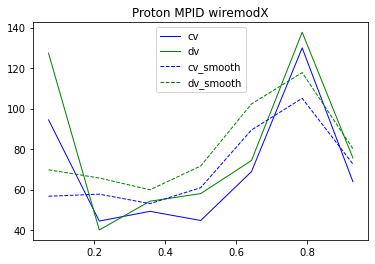

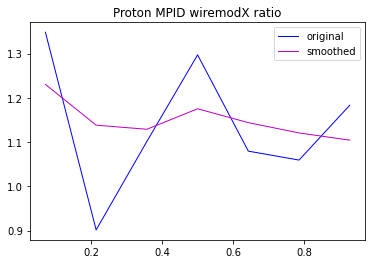

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
567.1623185921896
567.1623302674604
MPID_proton [0.05311192 0.01912852 0.01664062 0.03074166 0.02072357 0.01456672
 0.01090297]
MPID_proton [0.12131523 0.00969793 0.01030154 0.08832017 0.00633286 0.00352845
 0.03363665]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


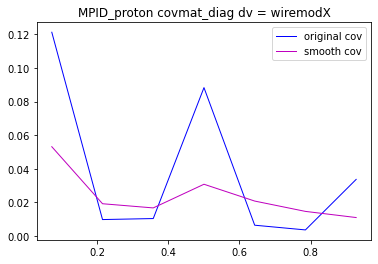

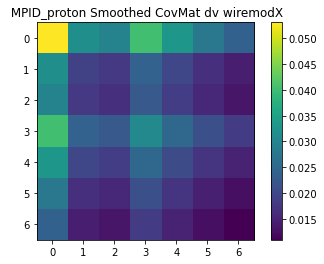

1
cv = 428  and dv = 690
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
---------------------> CV entries = 428.000000  and dv entries = 690.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

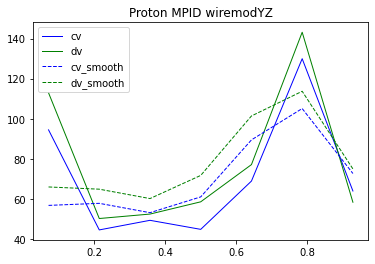

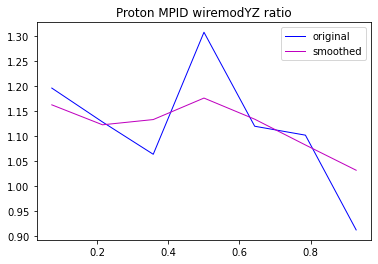

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
552.3550312928053
552.3550430232964
MPID_proton [0.02636735 0.01499157 0.01766409 0.03094779 0.0178575  0.00673451
 0.0009932 ]
MPID_proton [0.03838795 0.01640571 0.00402436 0.09462443 0.01428985 0.01034217
 0.00772453]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


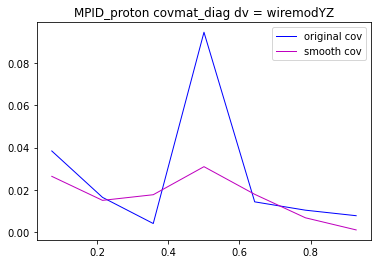

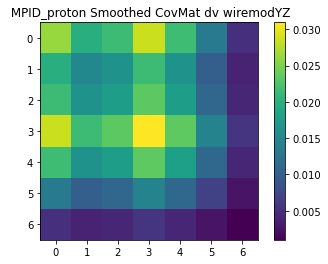

2
cv = 328  and dv = 338
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
---------------------> CV entries = 328.000000  and dv entries = 338.000000
cv[0] =  0.476568    cv[1] = 0.703977  rat = 0.403685
bwid = 0.271659 xmax-xmin=1.000000  sum_cv = 360.755141
[73.81543993 49.97464698 25.77836458 49.94163103 38.21684632 82.13136633
 40.89684542]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

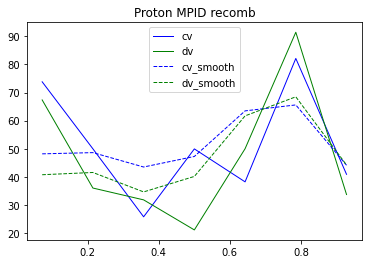

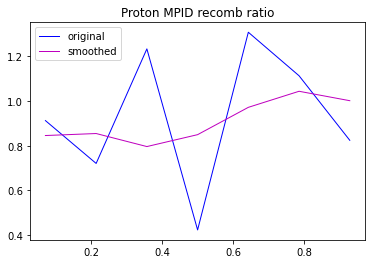

--------------------------  Hi There --------------------
360.7551303042425
360.75514058424244
331.47467331964606
331.47468339442725
MPID_proton [2.38017168e-02 2.11202517e-02 4.14983864e-02 2.26140063e-02
 7.83462510e-04 1.93467368e-03 3.10643034e-06]
MPID_proton [0.00763345 0.07801662 0.05471957 0.3331498  0.09515698 0.01288012
 0.03088215]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


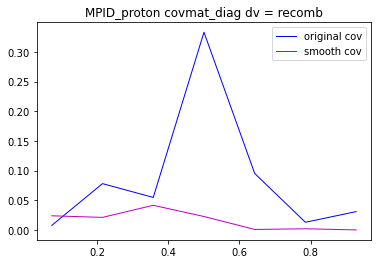

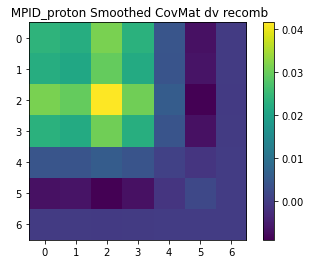

3
cv = 428  and dv = 613
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

---------------------> CV entries = 428.000000  and dv entries = 613.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


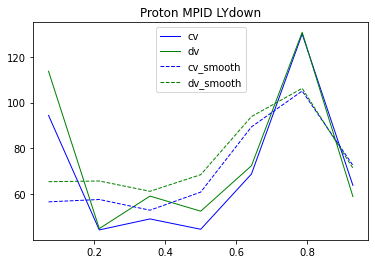

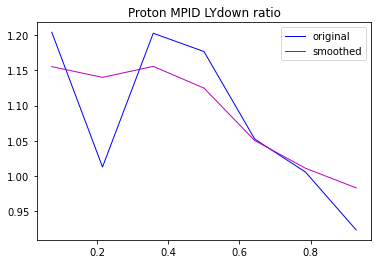

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
532.623285383864
532.6232969069372
MPID_proton [0.02406315 0.01956028 0.02418527 0.01555204 0.00254011 0.00012286
 0.00028118]
MPID_proton [4.15631292e-02 1.65640964e-04 4.09849210e-02 3.11654073e-02
 2.75414324e-03 3.33961529e-05 5.83020224e-03]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


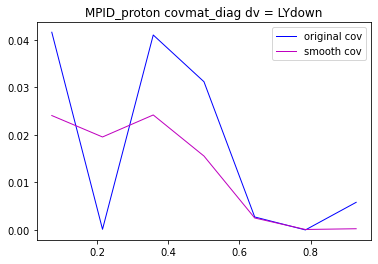

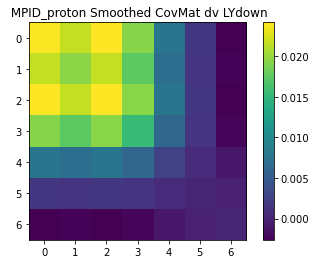

4
cv = 428  and dv = 617
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
---------------------> CV entries = 428.000000  and dv entries = 617.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

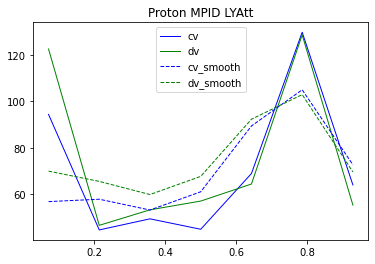

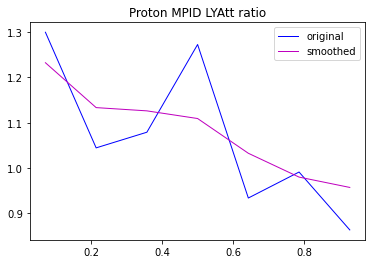

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
527.4636788599302
527.4636904322253
MPID_proton [0.05407385 0.01782504 0.01595942 0.01197225 0.00107287 0.00039244
 0.00181815]
MPID_proton [8.98871085e-02 1.99475313e-03 6.27040888e-03 7.43951061e-02
 4.35616124e-03 7.47581595e-05 1.86001368e-02]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


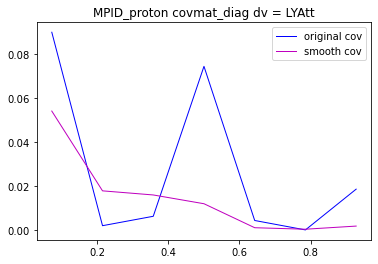

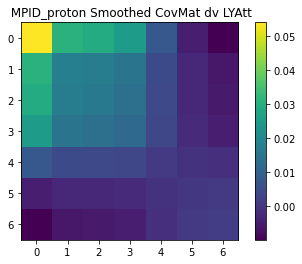

5
cv = 328  and dv = 330
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
---------------------> CV entries = 328.000000  and dv entries = 330.000000
cv[0] =  0.476568    cv[1] = 0.703977  rat = 0.403685
bwid = 0.271659 xmax-xmin=1.000000  sum_cv = 360.755141
[73.81543993 49.97464698 25.77836458 49.94163103 38.21684632 82.13136633
 40.89684542]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

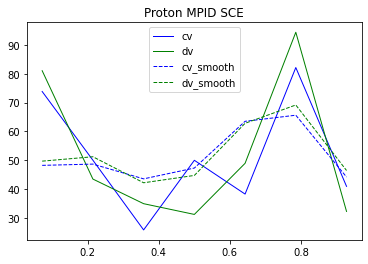

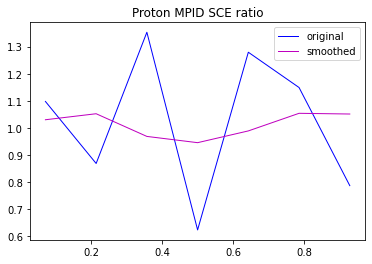

--------------------------  Hi There --------------------
360.7551303042425
360.75514058424244
365.9706368795317
365.9706471217508
MPID_proton [0.00091824 0.00275429 0.00097261 0.0029446  0.00011878 0.00292214
 0.00264665]
MPID_proton [0.00956298 0.01716281 0.1247053  0.14148647 0.07805473 0.02225602
 0.04529232]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


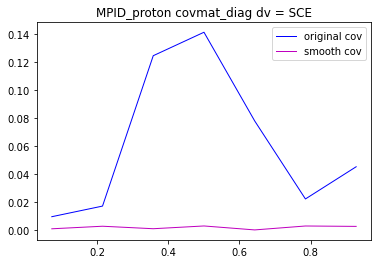

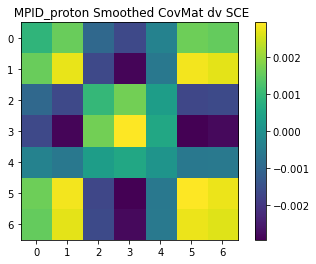

6
cv = 428  and dv = 630
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
---------------------> CV entries = 428.000000  and dv entries = 630.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

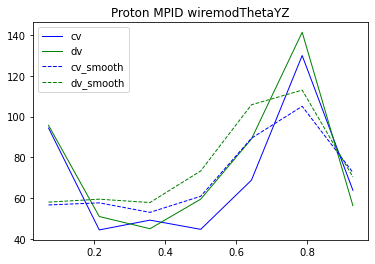

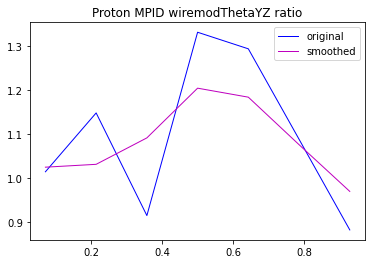

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
538.0305563366343
538.0305678161832
MPID_proton [0.00059915 0.00095888 0.00829091 0.04164017 0.03370812 0.0057173
 0.00093711]
MPID_proton [0.0001967  0.02184112 0.00731305 0.10967621 0.08613325 0.00773208
 0.01395438]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


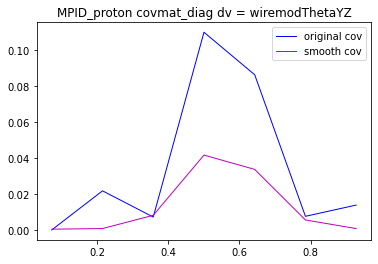

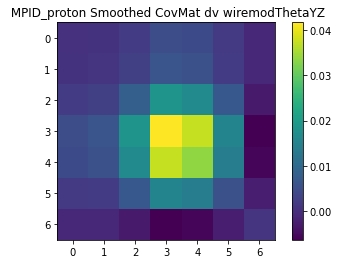

7
cv = 428  and dv = 632
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
---------------------> CV entries = 428.000000  and dv entries = 632.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

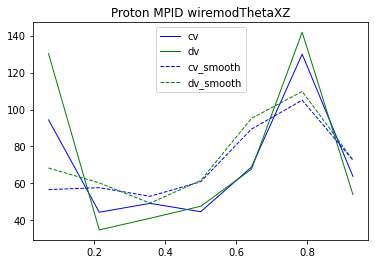

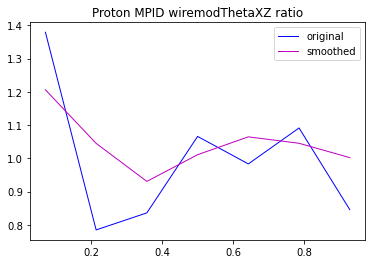

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
517.386169519911
517.3861808995134
MPID_proton [4.24988143e-02 2.02120679e-03 4.83098589e-03 1.18201624e-04
 4.16989744e-03 2.04345785e-03 4.26768887e-06]
MPID_proton [0.14383934 0.04640812 0.02693872 0.00434048 0.00028544 0.00833124
 0.02386952]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


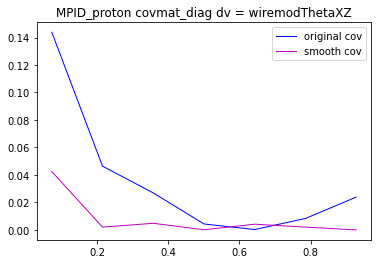

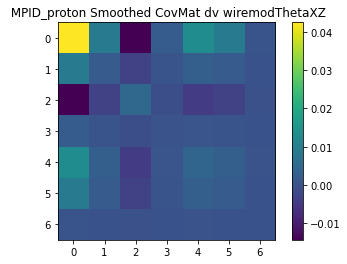

8
cv = 428  and dv = 688
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
---------------------> CV entries = 428.000000  and dv entries = 688.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-13-917bdb995b23>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

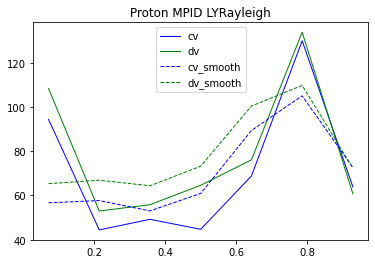

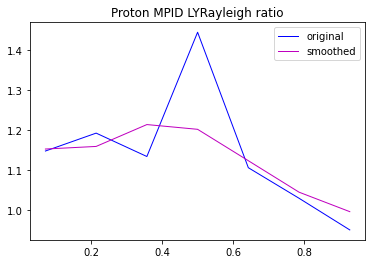

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
552.5038717002168
552.5038834266134
MPID_proton [2.33709652e-02 2.54046504e-02 4.58224559e-02 4.08825557e-02
 1.52959309e-02 2.02094008e-03 1.41669943e-05]
MPID_proton [0.0218772  0.03712609 0.01800226 0.1980045  0.01127311 0.00088482
 0.00244228]


<ipython-input-13-917bdb995b23>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-13-917bdb995b23>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-13-917bdb995b23>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-13-917bdb995b23>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


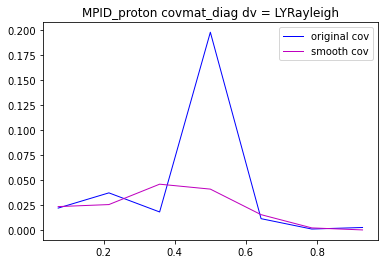

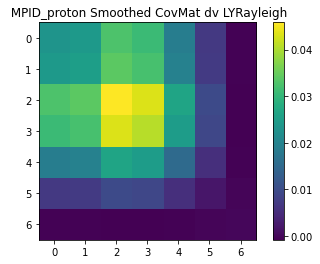

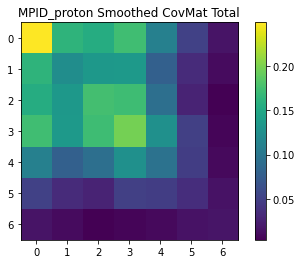

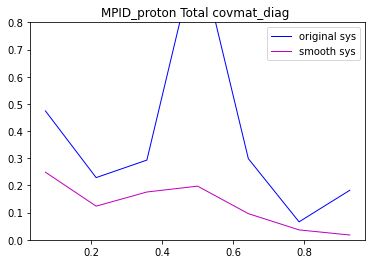

In [13]:
tag = '2021-04-02'
bdtscore=0.5
nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu05d_MPID_7bins'%(tag)
if not os.path.exists(histOut):
    os.makedirs(histOut)

#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname

#for i in range():
for var in (['MPID_proton']):#['Enu_1m1p']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
    
    covfolder_tmp = covfolder+'/'+var
    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))


    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(bump_s_cuts)[dist.myname]
        var_cv = myvardf.query(bump_s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(bump_s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(bump_s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#cv_scale)
        print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_CV_smooth.npy'%(histOut,names[sysi]), CV_smooth)
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_DV_smooth.npy'%(histOut,names[sysi]), DV_smooth)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_CV_reg.npy'%(histOut,names[sysi]), hCV)
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_DV_reg.npy'%(histOut,names[sysi]),h0)
        
        
        print('--------------------------  Hi There --------------------')
        print(sum(hCV))
        print(sum(CV_smooth))
        print(sum(h0))
        print(sum(DV_smooth))
    

        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('%s covmat_diag dv = %s'%(dist.myname,names[sysi]))
#        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

#        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')
        np.savetxt(covfolder_tmp+'/CV_smooth_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),CV_smooth, delimiter=',')
        np.savetxt(covfolder_tmp+'/DV_smooth_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),DV_smooth, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

#    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
#    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_diag.png'%(dist.myname,run),dpi=120,bbox_inches='tight')
    plt.show()


In [10]:
print(covfolder)

../outputs/covMatrixComb2021-06-28


9
0
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
---------------------> CV entries = 4728.000000  and dv entries = 6996.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

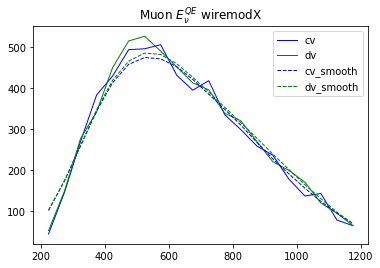

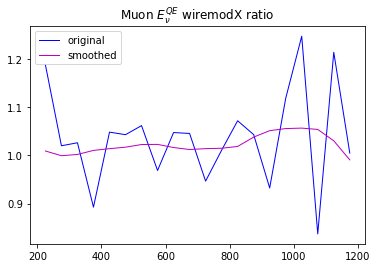

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5856.083540990972
5856.083609020629
EnuQE_muon [8.17998806e-05 5.72155514e-07 3.56674932e-06 1.05329170e-04
 1.92412108e-04 2.86876625e-04 5.04553261e-04 5.16947614e-04
 2.63314958e-04 1.47111528e-04 1.93226735e-04 2.17208737e-04
 3.41739736e-04 1.43569030e-03 2.62444373e-03 3.08816601e-03
 3.19653978e-03 2.89428648e-03 9.14899139e-04 8.80893839e-05]
EnuQE_muon [3.52320101e-02 3.95744769e-04 6.82606363e-04 1.15507473e-02
 2.32241337e-03 1.83930605e-03 3.80440431e-03 9.83823865e-04
 2.23861737e-03 2.06586251e-03 2.86065799e-03 1.15715349e-04
 5.15278220e-03 1.85237177e-03 4.58444736e-03 1.40106469e-02
 6.10781154e-02 2.65685925e-02 4.57160415e-02 2.21399274e-05]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


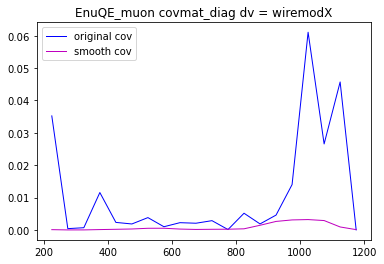

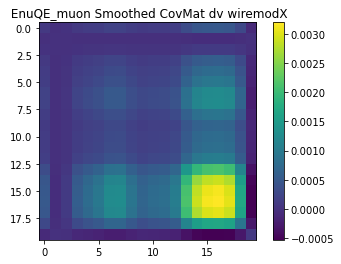

1
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
---------------------> CV entries = 4728.000000  and dv entries = 7015.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

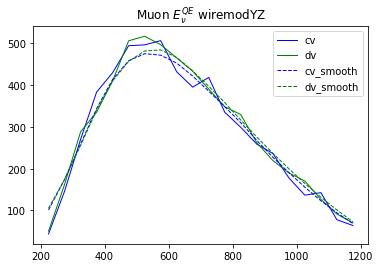

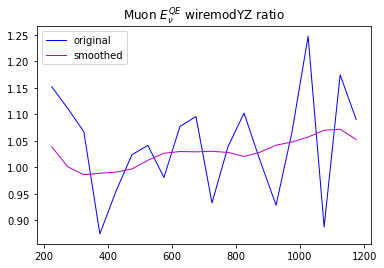

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5856.815716651262
5856.815784744596
EnuQE_muon [1.51238167e-03 1.32653773e-06 1.90898066e-04 1.19476493e-04
 7.91541881e-05 8.57660237e-06 1.82557437e-04 7.18264547e-04
 8.95726534e-04 8.64670828e-04 9.26084553e-04 7.99133092e-04
 4.29648156e-04 8.25857907e-04 1.75409722e-03 2.30498810e-03
 3.27329306e-03 4.91103800e-03 5.18750729e-03 2.76471476e-03]
EnuQE_muon [0.02313466 0.0123437  0.00453171 0.01570997 0.00205579 0.00057064
 0.00172014 0.00035752 0.00596014 0.00918911 0.00446792 0.00152927
 0.0104878  0.00017136 0.00505027 0.00455131 0.06116364 0.01257059
 0.03045802 0.00820192]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


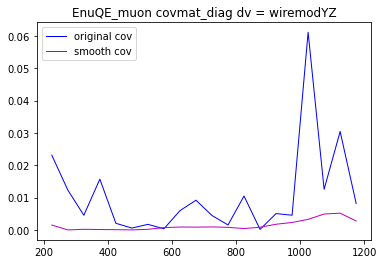

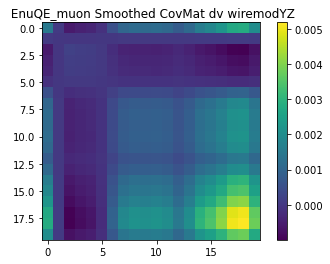

2
cv = 3446  and dv = 3728
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
---------------------> CV entries = 3425.000000  and dv entries = 3692.000000
cv[0] =  845.649188    cv[1] = 923.090289  rat = 0.478108
bwid = 193.394142 xmax-xmin=1000.000000  sum_cv = 3892.966319
[ 28.11439203 124.48496057 164.02314251 239.87077685 298.66170628
 351.27402667 349.4990065  347.11136421 287.3918544  274.32115842
 292.64263107 244.22724277 199.57707483 162.2299071  126.81582071
 132.95801826  93.51393868  78.09610479  60.04143599  38.11175618]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

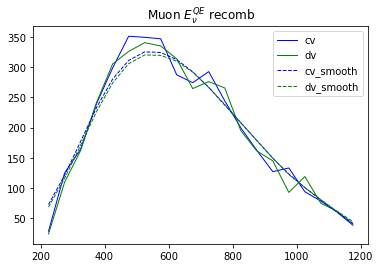

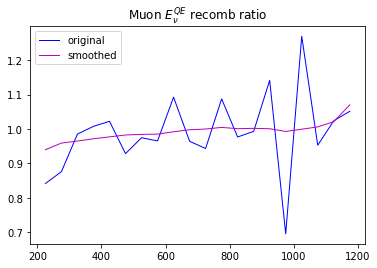

--------------------------  Hi There --------------------
3892.9662645705102
3892.9663188205127
3851.2361978670924
3851.2362514531687
EnuQE_muon [3.62384412e-03 1.67183461e-03 1.22475447e-03 8.09105010e-04
 5.22947779e-04 3.02688807e-04 2.48479329e-04 2.23486241e-04
 6.54686547e-05 5.10677036e-06 1.89884920e-08 2.10777491e-05
 7.84723413e-07 3.52672141e-06 4.84439530e-07 5.04783762e-05
 4.71206272e-07 3.66486405e-05 4.50512897e-04 4.90225235e-03]
EnuQE_muon [2.50619511e-02 1.53297714e-02 2.16231056e-04 5.90267278e-05
 4.98364996e-04 5.12682789e-03 6.44686763e-04 1.19184131e-03
 8.53235958e-03 1.27418396e-03 3.20713019e-03 7.63362664e-03
 5.40949916e-04 4.80651018e-05 1.99342722e-02 9.27893577e-02
 7.24820033e-02 2.22122419e-03 5.70021091e-04 2.63890105e-03]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


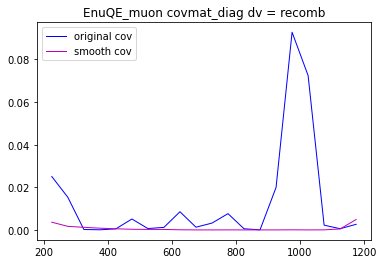

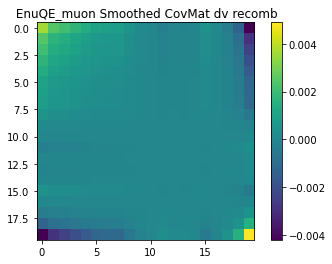

3
cv = 4796  and dv = 6515
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000
---------------------> CV entries = 4728.000000  and dv entries = 6436.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

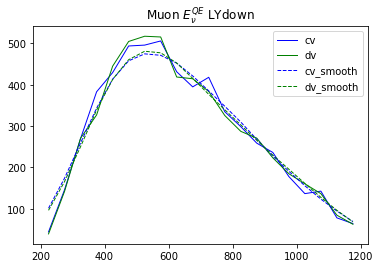

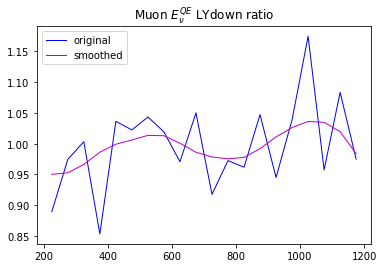

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5712.063095523082
5712.063163011668
EnuQE_muon [2.48316831e-03 2.23357507e-03 1.13863066e-03 1.93452975e-04
 9.76216453e-07 3.54554222e-05 1.77765016e-04 1.64469597e-04
 3.85136913e-07 1.97231312e-04 4.67824087e-04 6.02129761e-04
 4.98193653e-04 6.78022309e-05 1.19188322e-04 6.76824249e-04
 1.28856865e-03 1.20028737e-03 3.73923687e-04 2.65083509e-04]
EnuQE_muon [1.21838594e-02 6.50823298e-04 9.38678232e-06 2.14154793e-02
 1.29936397e-03 4.92128210e-04 1.86798929e-03 3.62721551e-04
 8.67608735e-04 2.48602805e-03 6.76981902e-03 7.57432557e-04
 1.45765175e-03 2.20952855e-03 3.01501947e-03 1.47894233e-03
 3.02853710e-02 1.80755535e-03 6.90751274e-03 6.35721120e-04]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


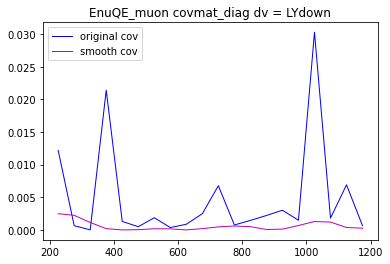

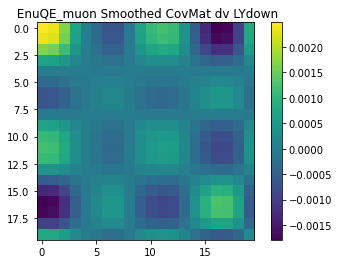

4
cv = 4796  and dv = 6518
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
---------------------> CV entries = 4728.000000  and dv entries = 6428.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

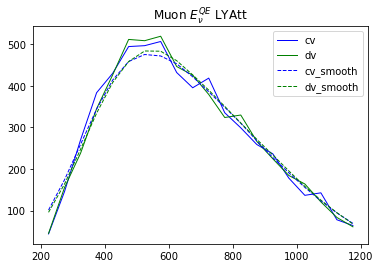

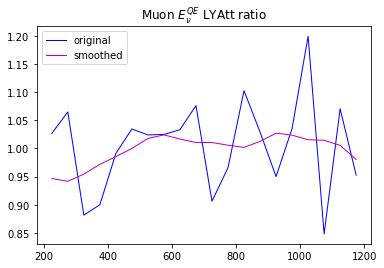

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5750.622983875401
5750.62305151027
EnuQE_muon [2.86250381e-03 3.42592941e-03 2.08968150e-03 7.98934218e-04
 2.11250067e-04 2.22037300e-12 3.16985480e-04 5.82820376e-04
 2.81678364e-04 1.11552591e-04 1.12875101e-04 3.38192764e-05
 3.52269398e-06 1.57638864e-04 7.38507462e-04 5.62603120e-04
 2.41236188e-04 2.12309250e-04 3.06703146e-05 3.83297374e-04]
EnuQE_muon [7.16814930e-04 4.22530219e-03 1.40785324e-02 1.00459888e-02
 7.86558414e-05 1.20525193e-03 5.79944551e-04 6.22138932e-04
 1.11941231e-03 5.82483431e-03 8.81848559e-03 1.16600196e-03
 1.05821875e-02 8.51532412e-04 2.50995634e-03 1.25925005e-03
 3.99119411e-02 2.31479975e-02 4.99282009e-03 2.24516408e-03]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


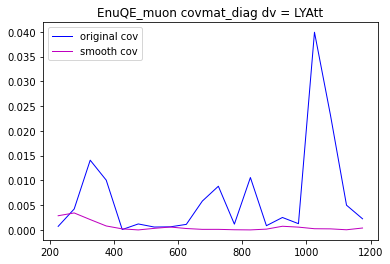

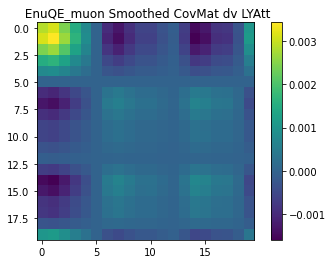

5
cv = 3446  and dv = 3593
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
---------------------> CV entries = 3425.000000  and dv entries = 3565.000000
cv[0] =  845.649188    cv[1] = 923.090289  rat = 0.478108
bwid = 193.394142 xmax-xmin=1000.000000  sum_cv = 3892.966319
[ 28.11439203 124.48496057 164.02314251 239.87077685 298.66170628
 351.27402667 349.4990065  347.11136421 287.3918544  274.32115842
 292.64263107 244.22724277 199.57707483 162.2299071  126.81582071
 132.95801826  93.51393868  78.09610479  60.04143599  38.11175618]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

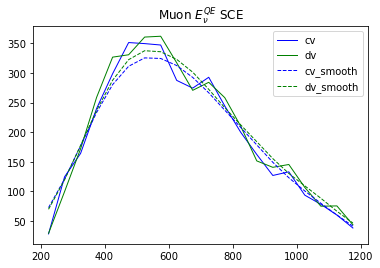

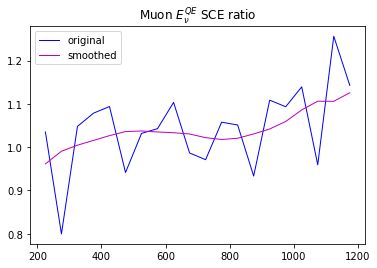

--------------------------  Hi There --------------------
3892.9662645705102
3892.9663188205122
4016.499399215368
4016.4994542411623
EnuQE_muon [1.50470887e-03 9.10356575e-05 1.93072214e-05 2.40112473e-04
 7.01782389e-04 1.28962286e-03 1.38794758e-03 1.22521473e-03
 1.10415435e-03 9.14531487e-04 4.74764351e-04 3.08703253e-04
 4.17320842e-04 9.24664584e-04 1.75328557e-03 3.50704763e-03
 7.37358105e-03 1.12388453e-02 1.11874244e-02 1.57633417e-02]
EnuQE_muon [0.00121546 0.04022625 0.0022874  0.00614036 0.00878024 0.00344968
 0.00100063 0.00182253 0.0106723  0.00018392 0.00084385 0.00330891
 0.00261106 0.00446687 0.01176018 0.0086914  0.01936816 0.00167194
 0.06558813 0.02032321]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


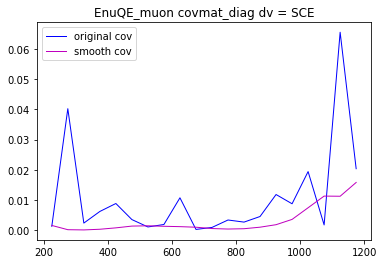

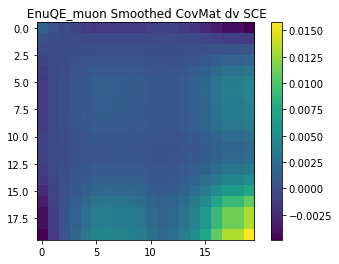

6
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
---------------------> CV entries = 4728.000000  and dv entries = 6803.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

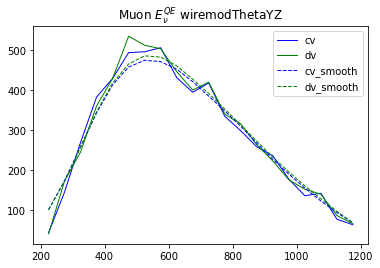

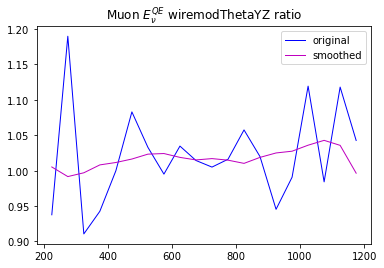

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5832.402716978622
5832.402785350645
EnuQE_muon [2.58003109e-05 7.18902845e-05 9.80694976e-06 6.38118701e-05
 1.29439790e-04 2.64382902e-04 5.36586812e-04 5.76328885e-04
 3.45542864e-04 2.24920759e-04 2.84766090e-04 2.15113578e-04
 1.02898677e-04 3.46205257e-04 6.16568370e-04 7.45802985e-04
 1.28013746e-03 1.81556677e-03 1.26424137e-03 1.35724891e-05]
EnuQE_muon [3.88764133e-03 3.58886852e-02 7.98361212e-03 3.29875915e-03
 6.35945523e-08 6.84988005e-03 1.07375787e-03 2.50609064e-05
 1.19144892e-03 2.01879442e-04 2.41060158e-05 2.53770932e-04
 3.28528503e-03 3.84125470e-04 2.98770031e-03 8.75860111e-05
 1.41763579e-02 2.54148089e-04 1.38553340e-02 1.80288730e-03]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


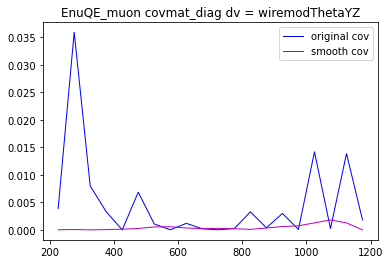

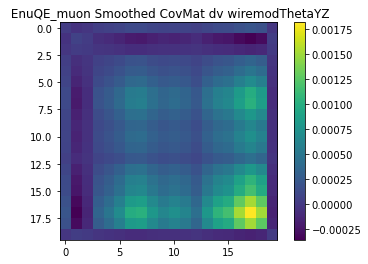

7
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
---------------------> CV entries = 4728.000000  and dv entries = 6849.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

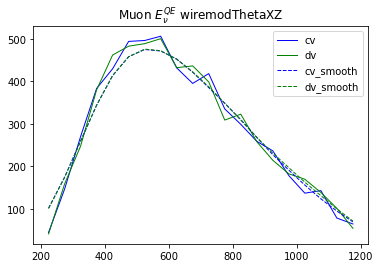

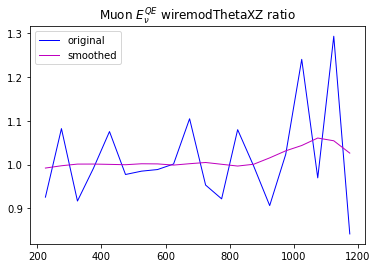

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5770.663041829843
5770.663109291706
EnuQE_muon [6.41359757e-05 7.60944102e-06 1.08657615e-06 1.27182731e-06
 1.63808427e-07 1.54046741e-07 3.22509124e-06 2.16390867e-06
 1.49961711e-06 3.68626796e-06 2.20960768e-05 3.72155763e-07
 1.16890088e-05 4.42144737e-07 2.32749651e-04 9.80452548e-04
 1.89116751e-03 3.66630996e-03 2.94681349e-03 6.82213818e-04]
EnuQE_muon [5.54410739e-03 6.73088039e-03 6.94256790e-03 6.99278101e-05
 5.67371367e-03 5.15997778e-04 2.27743547e-04 1.30034758e-04
 1.41757891e-06 1.09338602e-02 2.19533149e-03 6.13757381e-03
 6.34587833e-03 1.19494581e-05 8.78205927e-03 5.36077399e-04
 5.76822295e-02 9.24343308e-04 8.58293323e-02 2.50890414e-02]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


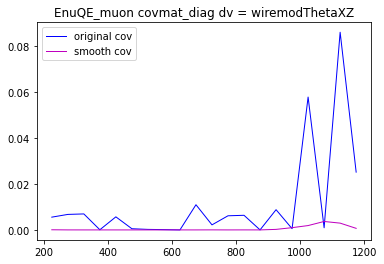

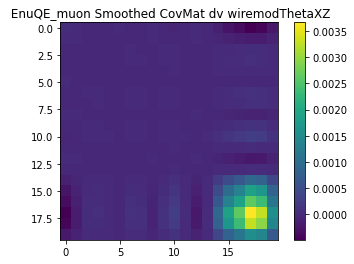

8
cv = 4796  and dv = 7138
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
---------------------> CV entries = 4728.000000  and dv entries = 7041.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

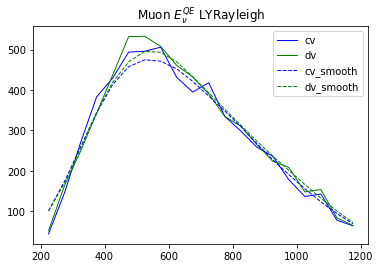

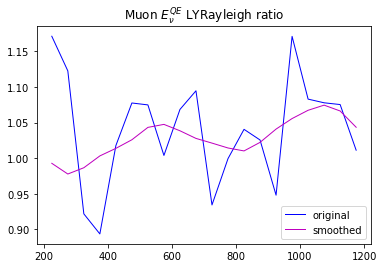

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5890.800793512187
5890.800861882189
EnuQE_muon [5.42243198e-05 5.02992955e-04 1.84878809e-04 9.25073910e-06
 1.86701029e-04 6.64550342e-04 1.86521655e-03 2.24736598e-03
 1.47598829e-03 7.66203137e-04 4.44021509e-04 2.01771158e-04
 1.01143093e-04 4.88791440e-04 1.66346403e-03 3.09225778e-03
 4.52328806e-03 5.54751670e-03 4.39087582e-03 1.87861411e-03]
EnuQE_muon [2.93894532e-02 1.50622381e-02 6.16052598e-03 1.13890241e-02
 3.08854382e-04 6.00814679e-03 5.59855944e-03 1.36024660e-05
 4.68181083e-03 8.96435902e-03 4.34951003e-03 5.95375687e-07
 1.63614857e-03 6.48356169e-04 2.72420242e-03 2.93324574e-02
 6.88069066e-03 6.05155542e-03 5.67192031e-03 1.22733636e-04]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


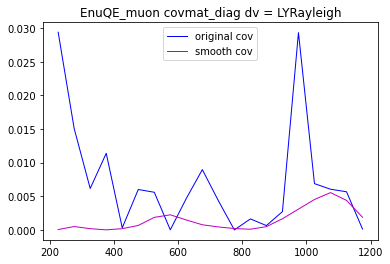

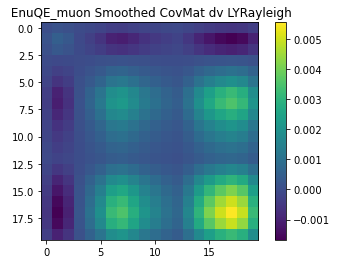

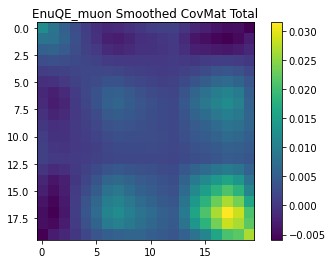

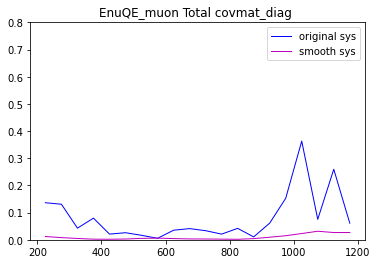

9
0
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
---------------------> CV entries = 4068.000000  and dv entries = 6061.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

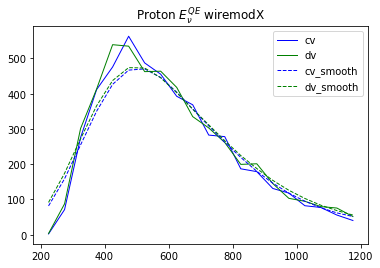

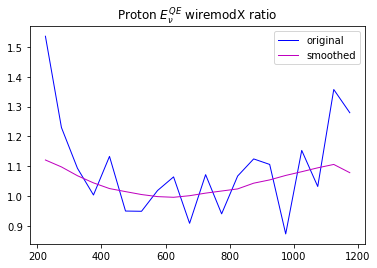

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5068.7160113563905
5068.716072966993
EnuQE_proton [1.46294604e-02 9.55543608e-03 4.66120127e-03 1.96334013e-03
 6.38760194e-04 2.27375643e-04 2.76349483e-05 2.82768075e-06
 1.54667602e-05 1.84994182e-06 9.97113114e-05 2.91240664e-04
 5.82151733e-04 1.87372472e-03 2.94828580e-03 4.79366227e-03
 6.68319832e-03 8.97705588e-03 1.12481380e-02 6.15619337e-03]
EnuQE_proton [2.86591184e-01 5.27506024e-02 8.68332766e-03 1.40980630e-05
 1.76935147e-02 2.50212107e-03 2.58203734e-03 3.50513406e-04
 4.13804581e-03 8.29495671e-03 5.16465370e-03 3.52717651e-03
 4.51885498e-03 1.55107746e-02 1.12495848e-02 1.60280483e-02
 2.34411824e-02 1.03207537e-03 1.27459287e-01 7.79923202e-02]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


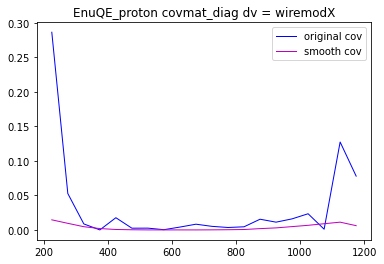

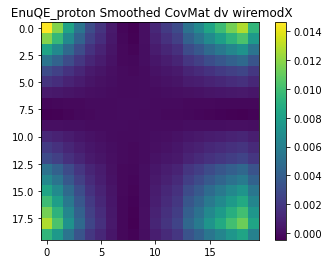

1
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
---------------------> CV entries = 4068.000000  and dv entries = 6048.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

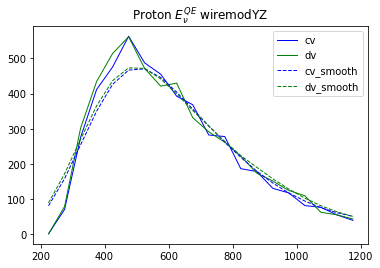

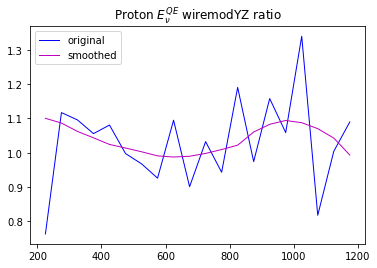

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5043.464724832312
5043.464786296101
EnuQE_proton [1.00545842e-02 7.47486701e-03 3.83841472e-03 1.87953185e-03
 5.73931026e-04 1.83293949e-04 6.61753971e-06 8.95250863e-05
 1.64474436e-04 1.11799886e-04 5.47970089e-06 8.19927307e-05
 4.71493612e-04 3.62477262e-03 6.84791410e-03 8.82290813e-03
 7.65830479e-03 4.90215178e-03 1.81268295e-03 4.75125796e-05]
EnuQE_proton [5.63813737e-02 1.36738608e-02 9.13667559e-03 3.08767446e-03
 6.49376216e-03 7.34747456e-06 1.06894266e-03 5.56394137e-03
 8.96016478e-03 9.91117271e-03 1.03740305e-03 3.28737300e-03
 3.63381861e-02 6.83816029e-04 2.49542440e-02 3.42978955e-03
 1.15606109e-01 3.34940543e-02 1.38989477e-05 8.02500186e-03]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


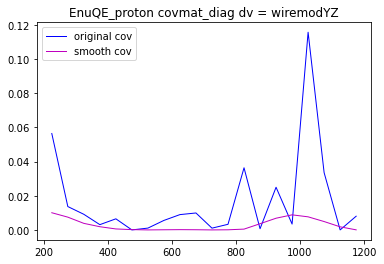

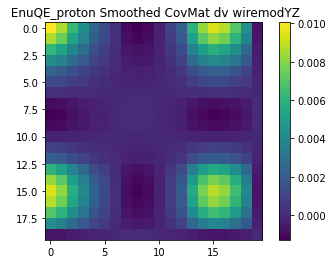

2
cv = 3446  and dv = 3728
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
---------------------> CV entries = 2963.000000  and dv entries = 3139.000000
cv[0] =  637.427014    cv[1] = 759.241496  rat = 0.456391
bwid = 197.515758 xmax-xmin=1000.000000  sum_cv = 3358.702938
[  1.00000101  58.51108025 188.74815473 312.64145154 341.88741975
 342.54578933 297.6413466  325.8956804  305.62732773 247.52323223
 201.4191185  182.55174055 135.03047588 122.52763933  89.57109745
  67.1042956   54.00483499  38.32599155  26.12418241  20.0220783 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

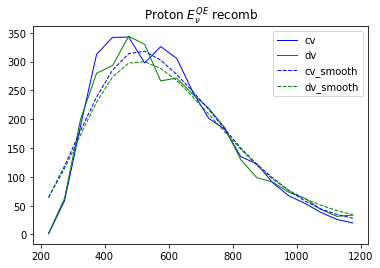

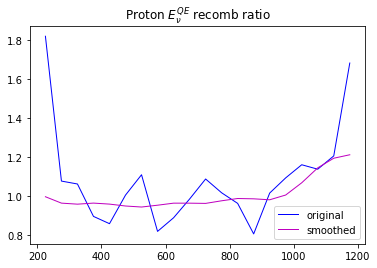

--------------------------  Hi There --------------------
3358.7028884978477
3358.7029381278503
3261.0400382545245
3261.040086809967
EnuQE_proton [1.97312506e-05 1.39039373e-03 1.81312153e-03 1.38006524e-03
 1.78947923e-03 2.71031803e-03 3.28016099e-03 2.29980817e-03
 1.40184176e-03 1.40450591e-03 1.49393806e-03 6.38413660e-04
 1.84197112e-04 2.30314849e-04 4.05284115e-04 1.90005549e-05
 4.51116803e-03 2.06836038e-02 3.73377324e-02 4.45115329e-02]
EnuQE_proton [6.71411894e-01 5.75971775e-03 3.71687907e-03 1.11063676e-02
 2.03881897e-02 1.56396019e-05 1.17458725e-02 3.32693174e-02
 1.26504992e-02 2.63474247e-04 7.49519018e-03 2.50617965e-04
 1.48780230e-03 3.81529232e-02 2.06954640e-04 8.54064902e-03
 2.55067213e-02 1.87459942e-02 4.20596265e-02 4.64936441e-01]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


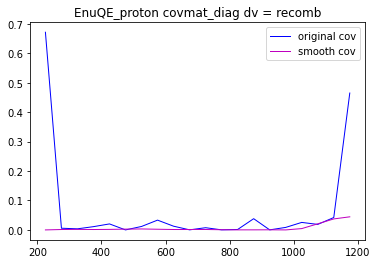

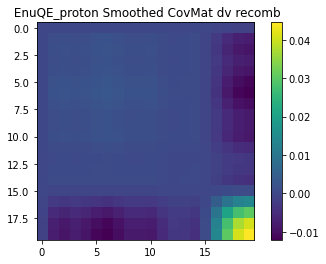

3
cv = 4796  and dv = 6515
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000
---------------------> CV entries = 4068.000000  and dv entries = 5550.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

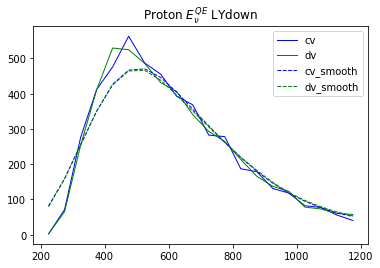

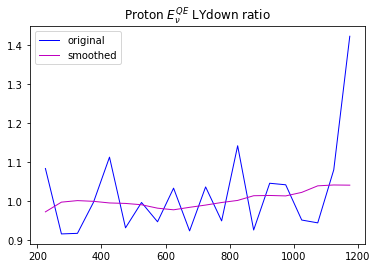

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
4910.519229783539
4910.5192907347
EnuQE_proton [7.24350950e-04 4.26193321e-06 3.52488662e-06 5.03241443e-10
 1.71160371e-05 2.85941059e-05 7.63221092e-05 3.06446687e-04
 4.68703080e-04 2.34065269e-04 9.10441868e-05 8.83112094e-06
 5.46162953e-06 2.06068242e-04 2.25826806e-04 1.92601941e-04
 5.25631183e-04 1.57291370e-03 1.75125493e-03 1.71270265e-03]
EnuQE_proton [7.05705294e-03 6.95097055e-03 6.71104039e-03 6.25321463e-06
 1.27783294e-02 4.59830817e-03 8.55436113e-06 2.73801986e-03
 1.13905522e-03 5.72150899e-03 1.35892619e-03 2.50934276e-03
 2.02338000e-02 5.38096726e-03 2.14014650e-03 1.79502801e-03
 2.29004288e-03 3.03492254e-03 6.50882198e-03 1.78475962e-01]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


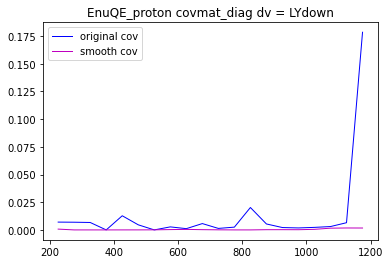

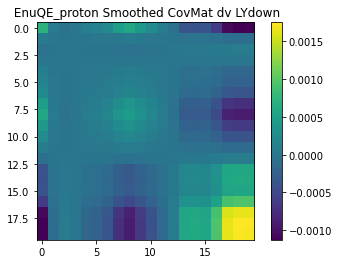

4
cv = 4796  and dv = 6518
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
---------------------> CV entries = 4068.000000  and dv entries = 5506.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

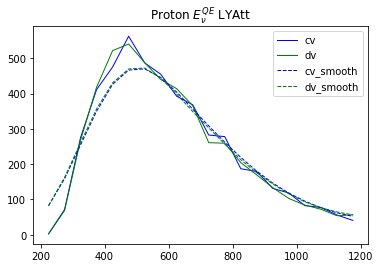

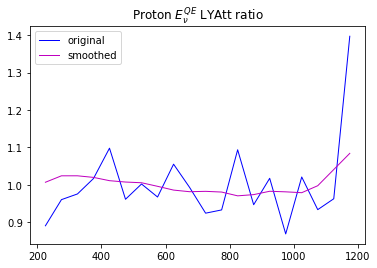

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
4919.679614387059
4919.6796751894235
EnuQE_proton [3.99091953e-05 5.55998124e-04 5.57348640e-04 3.73541370e-04
 1.11175250e-04 4.75840855e-05 2.49562485e-05 2.06651016e-05
 2.14631132e-04 3.60232437e-04 3.24396861e-04 3.95963738e-04
 9.03046852e-04 7.16624535e-04 3.16726613e-04 3.74034567e-04
 4.67299768e-04 8.58413678e-06 1.63176221e-03 7.00353622e-03]
EnuQE_proton [1.21471406e-02 1.61997850e-03 6.24326941e-04 2.65376841e-04
 9.51593385e-03 1.53665682e-03 2.72006134e-06 1.10115641e-03
 2.99118311e-03 5.53746895e-05 5.84456407e-03 4.58958775e-03
 8.69970514e-03 2.89504287e-03 2.85446774e-04 1.74198940e-02
 4.17702763e-04 4.49129292e-03 1.43180123e-03 1.57785517e-01]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


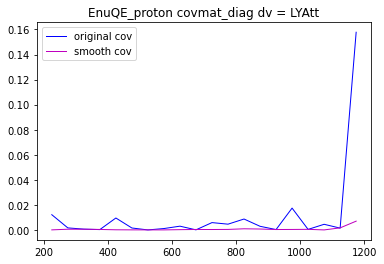

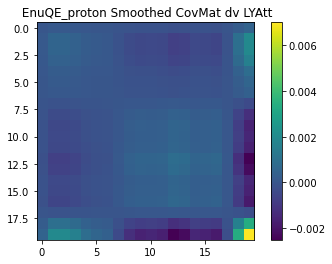

5
cv = 3446  and dv = 3593
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
---------------------> CV entries = 2963.000000  and dv entries = 3063.000000
cv[0] =  637.427014    cv[1] = 759.241496  rat = 0.456391
bwid = 197.515758 xmax-xmin=1000.000000  sum_cv = 3358.702938
[  1.00000101  58.51108025 188.74815473 312.64145154 341.88741975
 342.54578933 297.6413466  325.8956804  305.62732773 247.52323223
 201.4191185  182.55174055 135.03047588 122.52763933  89.57109745
  67.1042956   54.00483499  38.32599155  26.12418241  20.0220783 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

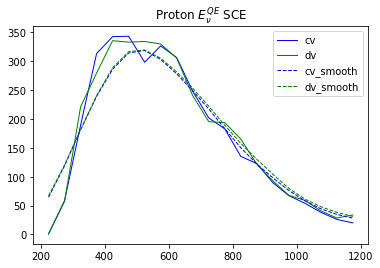

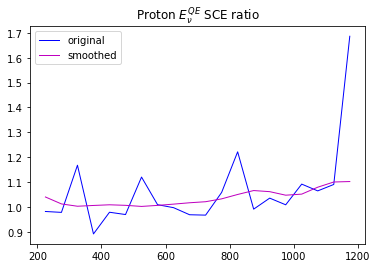

--------------------------  Hi There --------------------
3358.7028884978477
3358.70293812785
3429.8356158626348
3429.835665956327
EnuQE_proton [1.65655652e-03 1.64545445e-04 1.26014627e-05 4.43501013e-05
 8.76096971e-05 5.12731951e-05 7.91927049e-06 4.82908149e-05
 1.44398279e-04 3.04908529e-04 4.70356347e-04 1.09985518e-03
 2.57524114e-03 4.42468663e-03 3.85220110e-03 2.29062043e-03
 2.71945556e-03 6.38830592e-03 1.01592072e-02 1.05316467e-02]
EnuQE_proton [3.06576226e-04 4.45426917e-04 2.82418084e-02 1.15597789e-02
 4.22039803e-04 8.86694051e-04 1.45369749e-02 9.56346992e-05
 4.96766790e-06 9.35982003e-04 1.03272535e-03 3.46289336e-03
 4.92336369e-02 6.55959674e-05 1.30225548e-03 8.72193634e-05
 8.52587429e-03 4.24357599e-03 8.26488208e-03 4.70081792e-01]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


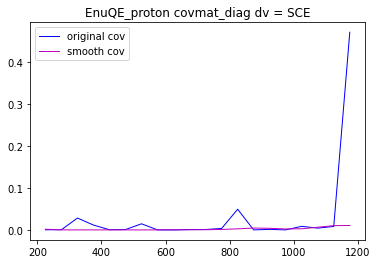

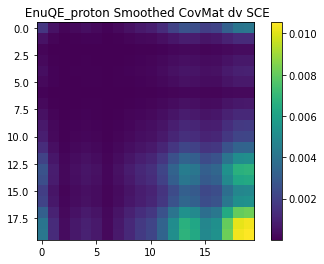

6
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
---------------------> CV entries = 4068.000000  and dv entries = 5874.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

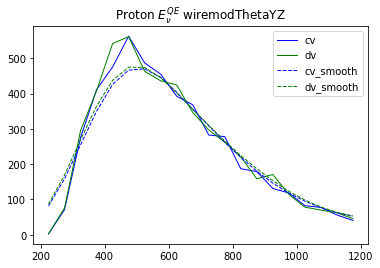

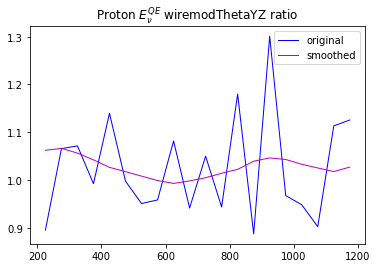

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5031.30309135185
5031.303153118318
EnuQE_proton [3.88591662e-03 4.40877059e-03 3.19414097e-03 1.79332819e-03
 7.13354962e-04 3.14356139e-04 7.04020683e-05 6.79624821e-07
 4.76146723e-05 2.61513221e-06 2.55455621e-05 2.06870401e-04
 5.09061251e-04 1.56399278e-03 2.15436310e-03 1.86695357e-03
 1.09874468e-03 6.47259367e-04 3.20472395e-04 7.43273509e-04]
EnuQE_proton [1.09075447e-02 4.33489241e-03 5.12021945e-03 5.59357234e-05
 1.95201335e-02 4.97988854e-06 2.38994091e-03 1.71638851e-03
 6.70533580e-03 3.39215010e-03 2.50761537e-03 3.16382163e-03
 3.23836226e-02 1.26408425e-02 9.04733379e-02 1.04355061e-03
 2.64898493e-03 9.48329695e-03 1.28489284e-02 1.58007037e-02]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


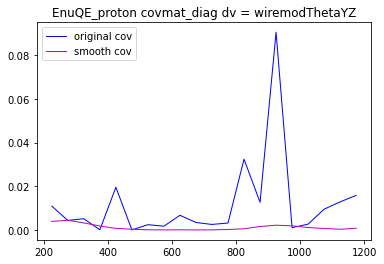

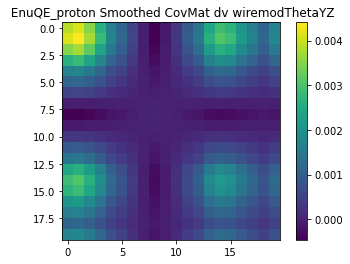

7
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
---------------------> CV entries = 4068.000000  and dv entries = 5902.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

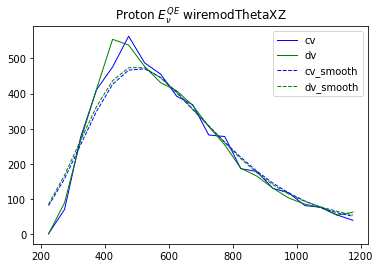

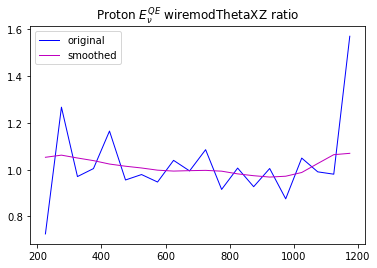

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
4973.796183944728
4973.7962448441185
EnuQE_proton [2.77935876e-03 3.82718974e-03 2.46687043e-03 1.47810478e-03
 5.65771298e-04 2.08991997e-04 4.78975265e-05 5.88155891e-06
 4.00404840e-05 1.99599616e-05 1.06982773e-05 4.51230384e-05
 3.33272188e-04 6.80869692e-04 1.02070901e-03 8.00625090e-04
 1.53329881e-04 6.81417328e-04 4.08157984e-03 4.84767537e-03]
EnuQE_proton [7.57504550e-02 7.13651115e-02 8.89866516e-04 1.90947707e-05
 2.71924200e-02 1.97162424e-03 4.48133977e-04 2.82306269e-03
 1.56481585e-03 3.18835534e-05 7.26814392e-03 7.20087545e-03
 4.19826167e-05 5.34946945e-03 2.23277775e-05 1.56457294e-02
 2.42775152e-03 9.28002864e-05 3.84437169e-04 3.25703614e-01]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


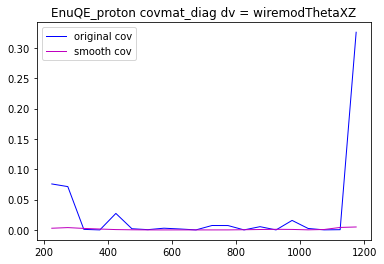

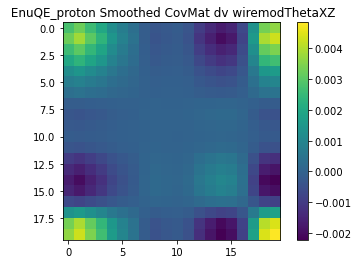

8
cv = 4796  and dv = 7138
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000


<ipython-input-21-ec3eec79f71b>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))


---------------------> CV entries = 4068.000000  and dv entries = 6043.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


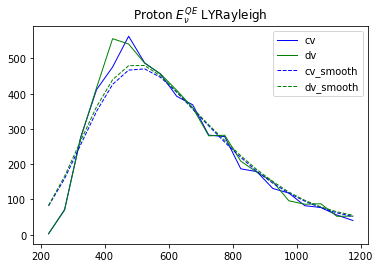

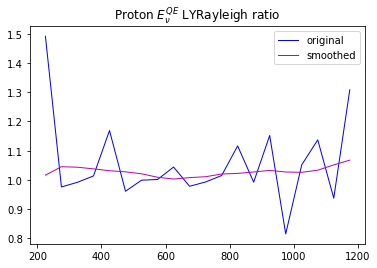

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5042.5515054672005
5042.5515669811775
EnuQE_proton [2.48345357e-04 2.00581973e-03 1.84984864e-03 1.39725327e-03
 9.60912219e-04 7.39796653e-04 4.19172074e-04 7.50111790e-05
 6.20254595e-06 5.45979618e-05 1.09701548e-04 3.87334170e-04
 4.77999478e-04 7.12852821e-04 1.02768522e-03 7.11076752e-04
 6.54165467e-04 1.07964200e-03 2.59087841e-03 4.51574028e-03]
EnuQE_proton [2.41815131e-01 6.05866457e-04 7.55724920e-05 1.72820745e-04
 2.84706173e-02 1.54148728e-03 2.05711659e-06 8.97588892e-07
 1.89544967e-03 4.94535249e-04 5.71952143e-05 2.09692829e-04
 1.34543898e-02 6.86883976e-05 2.30348136e-02 3.44100109e-02
 2.60775669e-03 1.87132753e-02 3.97158958e-03 9.49947043e-02]


<ipython-input-21-ec3eec79f71b>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-21-ec3eec79f71b>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-21-ec3eec79f71b>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-21-ec3eec79f71b>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


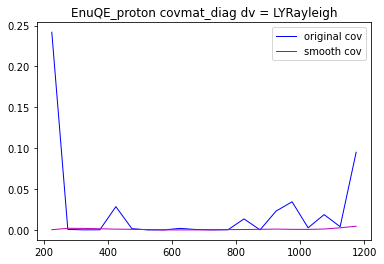

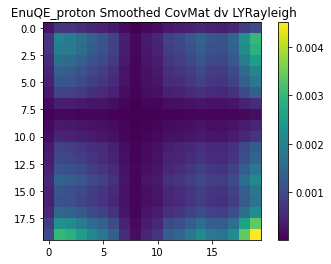

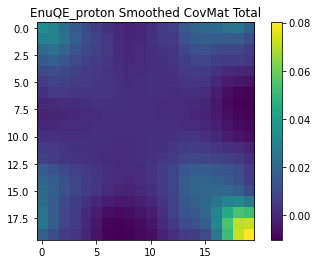

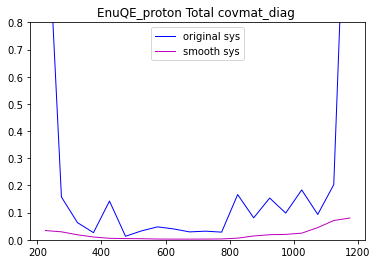

In [21]:
#tag = '2021-06-28'
bdtscore=5
#nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu0%d'%(tag,bdtscore)
if not os.path.exists(histOut):
    os.makedirs(histOut)

#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname

#for i in range():
for var in (['EnuQE_muon','EnuQE_proton']):#['Enu_1m1p']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
    
    covfolder_tmp = covfolder+'/'+var
    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))


    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#cv_scale)
        print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)
        np.save('%s/1Dhist_%s_run3_%s_CV_smooth.npy'%(histOut,var,names[sysi]), CV_smooth)
        np.save('%s/1Dhist_%s_run3_%s_DV_smooth.npy'%(histOut,var,names[sysi]), DV_smooth)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        np.save('%s/1Dhist_%s_run3_%s_CV_reg.npy'%(histOut,var,names[sysi]), hCV)
        np.save('%s/1Dhist_%s_run3_%s_DV_reg.npy'%(histOut,var,names[sysi]),h0)
        
        
        print('--------------------------  Hi There --------------------')
        print(sum(hCV))
        print(sum(CV_smooth))
        print(sum(h0))
        print(sum(DV_smooth))
    

        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('%s covmat_diag dv = %s'%(dist.myname,names[sysi]))
        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')
        np.savetxt(covfolder_tmp+'/CV_smooth_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),CV_smooth, delimiter=',')
        np.savetxt(covfolder_tmp+'/DV_smooth_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),DV_smooth, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_diag.png'%(dist.myname,run),dpi=120,bbox_inches='tight')
    plt.show()


[0.06664059 0.03048728 0.00940441 0.00352994 0.00271378 0.00287624
 0.00302329 0.0031952  0.0027538  0.00243731 0.00273801 0.00415321
 0.00572506 0.00765063 0.01073149 0.01816791 0.02779047 0.0410838
 0.04732678 0.04233229]


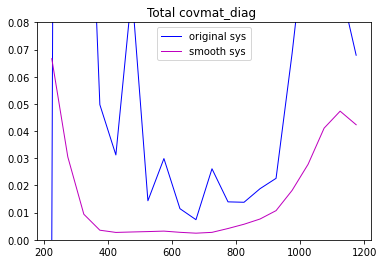

In [32]:
plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
plt.legend()
plt.ylim([0,0.08])
plt.title('Total covmat_diag ')
print(cov_smooth.diagonal())

# Run 1

In [22]:
run = 'run1'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','SCE','wiremodThetaYZ','wiremodThetaXZ']#,'LYRayleigh']

for name in names:
    s_detsyslist.append(name)

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = []

i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])


#####################################################
# For now add the run3 LYR###########################
#####################################################


names.append('LYRayleigh')
df_sys = pd.read_parquet('%s/pickles/LYRayleigh_run3_%s.parquet'%(datafolder,tag))

a_df_sys.append(df_sys)
print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


71256
total 71256, cv = 58791 dv = 12465
71341
total 71341, cv = 58791 dv = 12550
13548
total 13548, cv = 6823 dv = 6725
13344
total 13344, cv = 6823 dv = 6521
13973
total 13973, cv = 6823 dv = 7150
70893
total 70893, cv = 58791 dv = 12102
70891
total 70891, cv = 58791 dv = 12100
total 71362, cv = 58791 dv = 12571


# Bump Study

8
0
cv = 428  and dv = 681
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


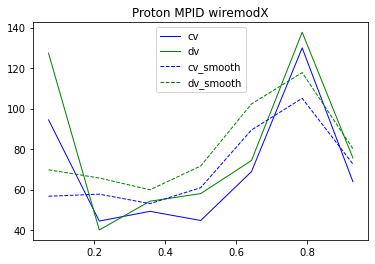

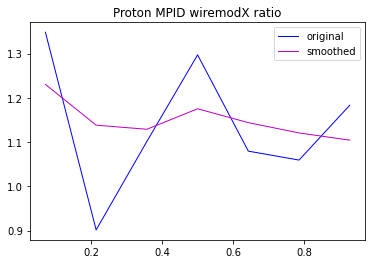

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
567.1623185921896
567.1623302674604
MPID_proton [0.05311192 0.01912852 0.01664062 0.03074166 0.02072357 0.01456672
 0.01090297]
MPID_proton [0.12131523 0.00969793 0.01030154 0.08832017 0.00633286 0.00352845
 0.03363665]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


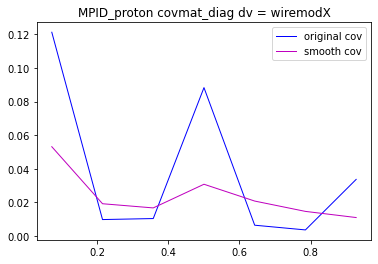

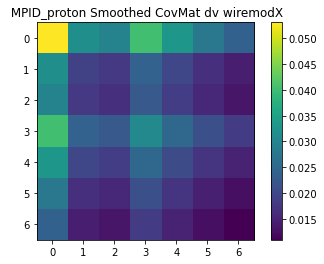

1
cv = 428  and dv = 690
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


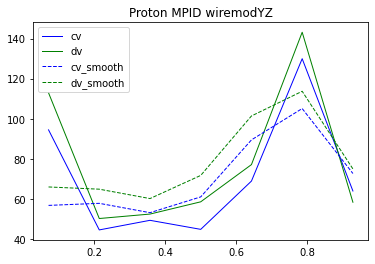

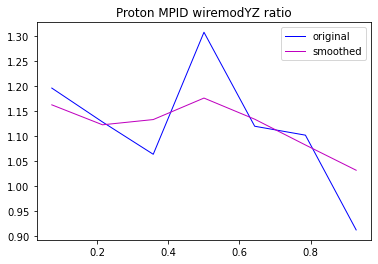

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
552.3550312928053
552.3550430232964
MPID_proton [0.02636735 0.01499157 0.01766409 0.03094779 0.0178575  0.00673451
 0.0009932 ]
MPID_proton [0.03838795 0.01640571 0.00402436 0.09462443 0.01428985 0.01034217
 0.00772453]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


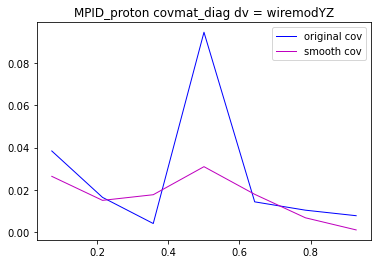

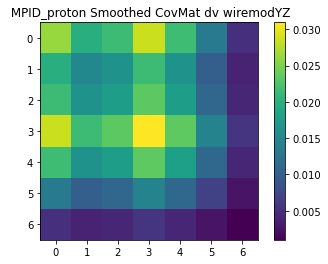

2
cv = 271  and dv = 256
cv POT = 609362734189999947776.000000 dv POT = 627484668519000047616.000000
cv[0] =  0.108660    cv[1] = 0.000000  rat = 1.000000
bwid = 0.278220 xmax-xmin=1.000000  sum_cv = 305.254446
[61.18486557 41.06988493 24.89709764 30.70254321 40.88738565 63.94018763
 42.57248182]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


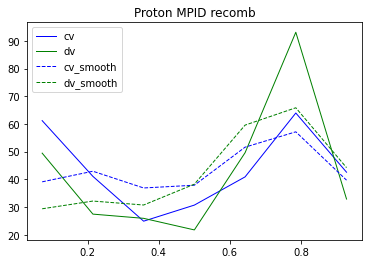

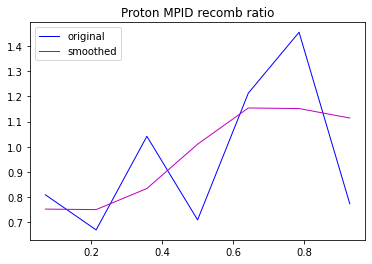

--------------------------  Hi There --------------------
305.25443674509063
305.2544464550907
300.1524249335231
300.1524344195896
MPID_proton [6.18964467e-02 6.28973334e-02 2.78034334e-02 9.82594213e-05
 2.37604836e-02 2.30573812e-02 1.30338902e-02]
MPID_proton [0.03677282 0.11002125 0.00170329 0.08510367 0.04549848 0.20783107
 0.05178594]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


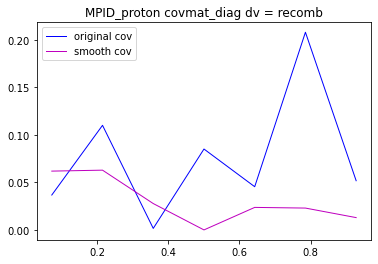

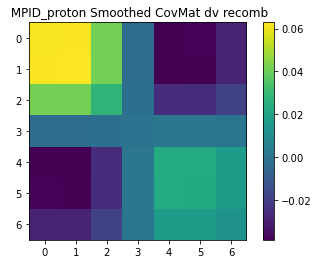

3
cv = 271  and dv = 259
cv POT = 609362734189999947776.000000 dv POT = 594452048285999955968.000000
cv[0] =  0.108660    cv[1] = 0.000000  rat = 1.000000
bwid = 0.278220 xmax-xmin=1.000000  sum_cv = 305.254446
[61.18486557 41.06988493 24.89709764 30.70254321 40.88738565 63.94018763
 42.57248182]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


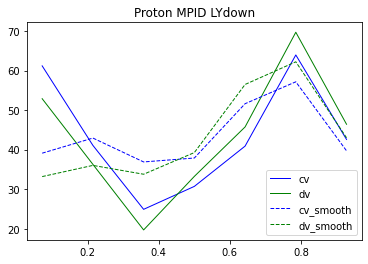

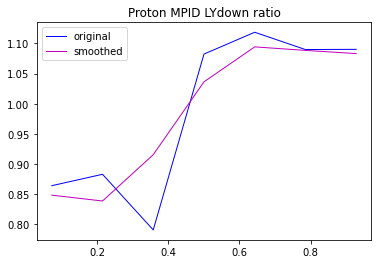

--------------------------  Hi There --------------------
305.25443674509063
305.2544464550907
303.9140593076237
303.91406896258894
MPID_proton [0.02292545 0.02594983 0.00711341 0.00132202 0.00889627 0.00783202
 0.00692091]
MPID_proton [0.0184178  0.01365272 0.04368955 0.00678726 0.01405808 0.00807886
 0.00814245]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


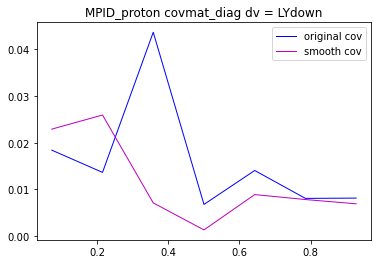

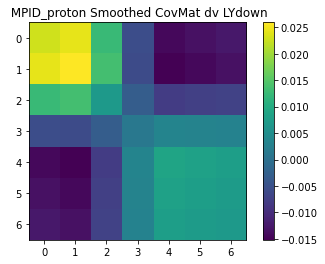

4
cv = 271  and dv = 278
cv POT = 609362734189999947776.000000 dv POT = 621993777142999941120.000000
cv[0] =  0.108660    cv[1] = 0.000000  rat = 1.000000
bwid = 0.278220 xmax-xmin=1.000000  sum_cv = 305.254446
[61.18486557 41.06988493 24.89709764 30.70254321 40.88738565 63.94018763
 42.57248182]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


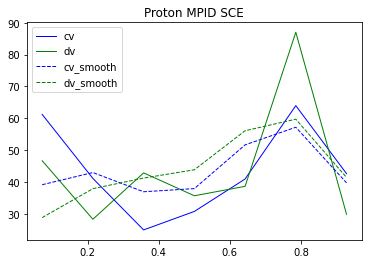

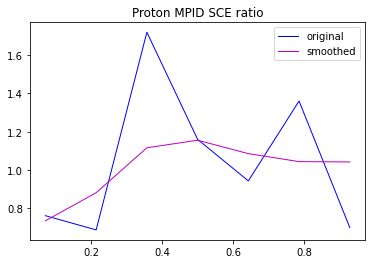

--------------------------  Hi There --------------------
305.25443674509063
305.2544464550907
308.71294751711525
308.7129572406608
MPID_proton [0.06996697 0.0139468  0.01357513 0.02431088 0.00740642 0.00196419
 0.0018171 ]
MPID_proton [0.05657402 0.09746775 0.51787991 0.0257772  0.00317292 0.13003234
 0.08992663]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


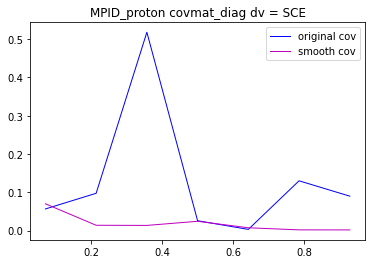

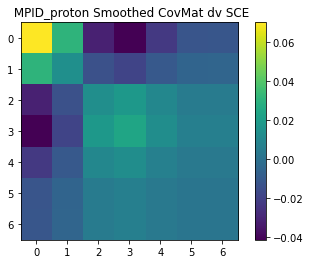

5
cv = 428  and dv = 630
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


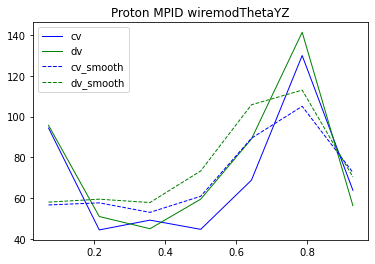

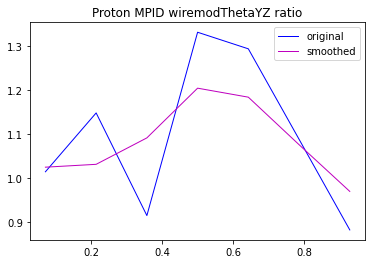

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
538.0305563366343
538.0305678161832
MPID_proton [0.00059915 0.00095888 0.00829091 0.04164017 0.03370812 0.0057173
 0.00093711]
MPID_proton [0.0001967  0.02184112 0.00731305 0.10967621 0.08613325 0.00773208
 0.01395438]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


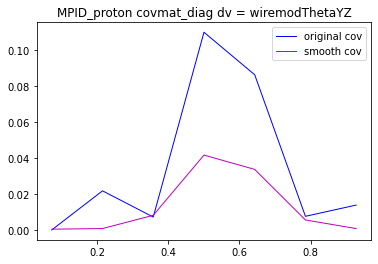

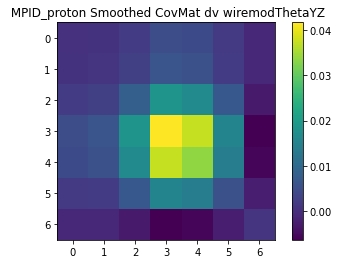

6
cv = 428  and dv = 632
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


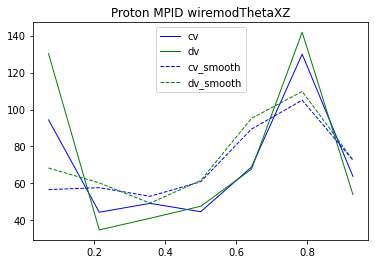

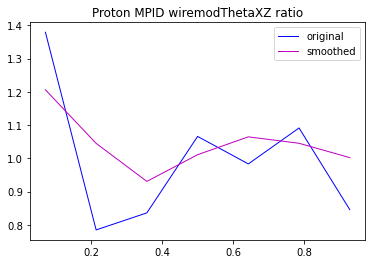

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
517.386169519911
517.3861808995134
MPID_proton [4.24988143e-02 2.02120679e-03 4.83098589e-03 1.18201624e-04
 4.16989744e-03 2.04345785e-03 4.26768887e-06]
MPID_proton [0.14383934 0.04640812 0.02693872 0.00434048 0.00028544 0.00833124
 0.02386952]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


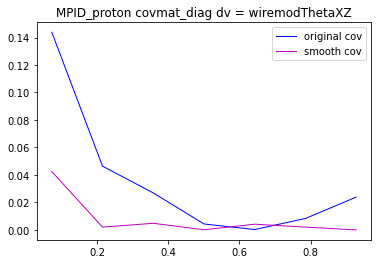

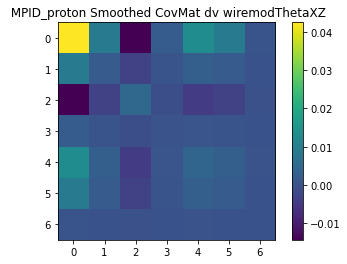

7
cv = 428  and dv = 688
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv[0] =  0.613726    cv[1] = 0.343994  rat = 0.640820
bwid = 0.259621 xmax-xmin=1.000000  sum_cv = 495.457280
[ 94.40903221  44.43639299  49.23108678  44.71648922  68.83306972
 129.95549208  63.87571674]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


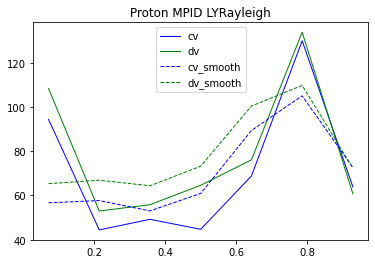

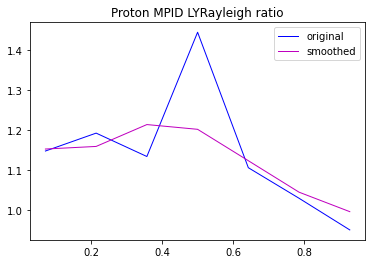

--------------------------  Hi There --------------------
495.457268460603
495.457279740603
552.5038717002168
552.5038834266134
MPID_proton [2.33709652e-02 2.54046504e-02 4.58224559e-02 4.08825557e-02
 1.52959309e-02 2.02094008e-03 1.41669943e-05]
MPID_proton [0.0218772  0.03712609 0.01800226 0.1980045  0.01127311 0.00088482
 0.00244228]


<ipython-input-19-42724aff4ae1>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-19-42724aff4ae1>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-19-42724aff4ae1>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-19-42724aff4ae1>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


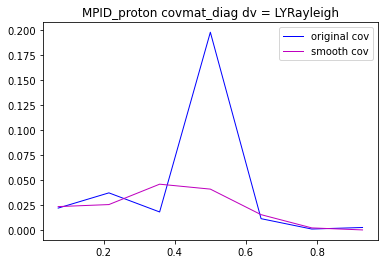

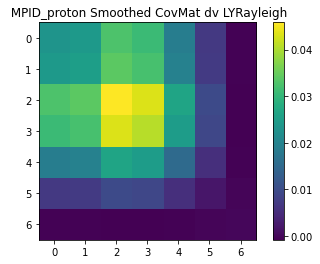

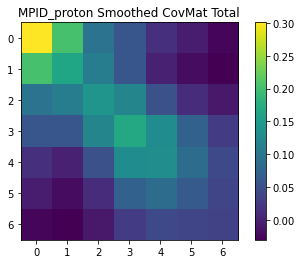

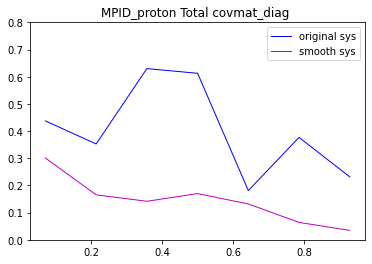

In [19]:
histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu05d_MPID_7bins'%(tag)


nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname
    #for i in range():
for var in (['MPID_proton']):#['Enu_1m1p']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
        print(plotfolder_tmp)
    covfolder_tmp = covfolder+'/'+var

    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(bump_s_cuts)[dist.myname]
        var_cv = myvardf.query(bump_s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(bump_s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(bump_s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_CV_smooth.npy'%(histOut,names[sysi]), CV_smooth)
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_DV_smooth.npy'%(histOut,names[sysi]), DV_smooth)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_CV_reg.npy'%(histOut,names[sysi]), hCV)
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_DV_reg.npy'%(histOut,names[sysi]),h0)
        
        print('--------------------------  Hi There --------------------')
        print(sum(hCV))
        print(sum(CV_smooth))
        print(sum(h0))
        print(sum(DV_smooth))
    

        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('%s covmat_diag dv = %s'%(dist.myname,names[sysi]))
#        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

#        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

#    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
#    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_cov.png'%(dist.myname,run),dpi=120,bbox_inches='tight')



In [18]:
print(histOut)
histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/2021-06-28/mu05'

/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/2021-06-28/mu00


8
0
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


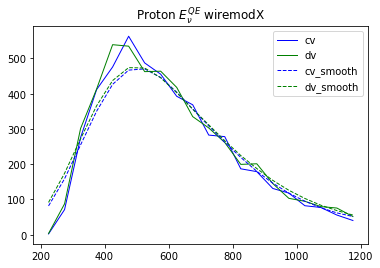

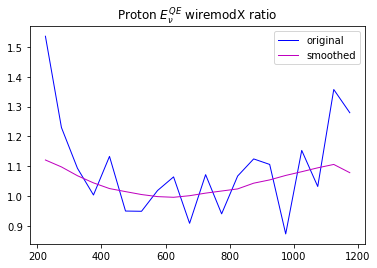

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5068.7160113563905
5068.716072966993
EnuQE_proton [1.46294604e-02 9.55543608e-03 4.66120127e-03 1.96334013e-03
 6.38760194e-04 2.27375643e-04 2.76349483e-05 2.82768075e-06
 1.54667602e-05 1.84994182e-06 9.97113114e-05 2.91240664e-04
 5.82151733e-04 1.87372472e-03 2.94828580e-03 4.79366227e-03
 6.68319832e-03 8.97705588e-03 1.12481380e-02 6.15619337e-03]
EnuQE_proton [2.86591184e-01 5.27506024e-02 8.68332766e-03 1.40980630e-05
 1.76935147e-02 2.50212107e-03 2.58203734e-03 3.50513406e-04
 4.13804581e-03 8.29495671e-03 5.16465370e-03 3.52717651e-03
 4.51885498e-03 1.55107746e-02 1.12495848e-02 1.60280483e-02
 2.34411824e-02 1.03207537e-03 1.27459287e-01 7.79923202e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


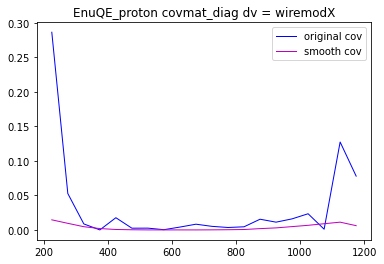

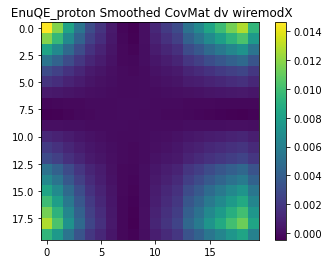

1
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


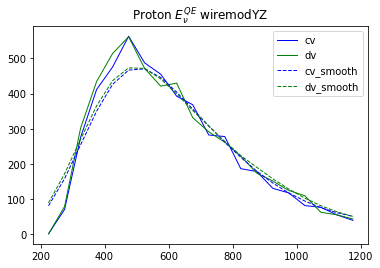

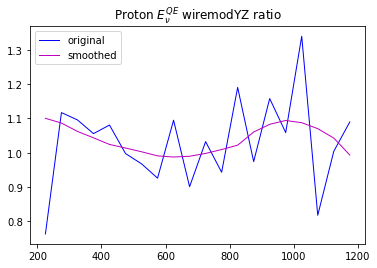

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5043.464724832312
5043.464786296101
EnuQE_proton [1.00545842e-02 7.47486701e-03 3.83841472e-03 1.87953185e-03
 5.73931026e-04 1.83293949e-04 6.61753971e-06 8.95250863e-05
 1.64474436e-04 1.11799886e-04 5.47970089e-06 8.19927307e-05
 4.71493612e-04 3.62477262e-03 6.84791410e-03 8.82290813e-03
 7.65830479e-03 4.90215178e-03 1.81268295e-03 4.75125796e-05]
EnuQE_proton [5.63813737e-02 1.36738608e-02 9.13667559e-03 3.08767446e-03
 6.49376216e-03 7.34747456e-06 1.06894266e-03 5.56394137e-03
 8.96016478e-03 9.91117271e-03 1.03740305e-03 3.28737300e-03
 3.63381861e-02 6.83816029e-04 2.49542440e-02 3.42978955e-03
 1.15606109e-01 3.34940543e-02 1.38989477e-05 8.02500186e-03]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


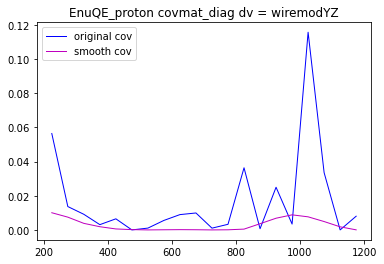

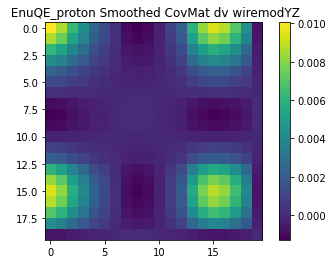

2
cv = 3194  and dv = 3131
cv POT = 609362734189999947776.000000 dv POT = 627484668519000047616.000000
cv[0] =  988.961218    cv[1] = 581.078263  rat = 0.629896
bwid = 199.304238 xmax-xmin=1000.000000  sum_cv = 3153.320434
[1.00000000e-06 4.95307802e+01 1.51030855e+02 2.63447631e+02
 3.09300836e+02 3.12077207e+02 3.28402606e+02 2.82384706e+02
 2.83490738e+02 2.31397934e+02 2.07216373e+02 1.57167612e+02
 1.46869925e+02 1.17568636e+02 8.93879762e+01 7.29751615e+01
 5.49121359e+01 4.34006963e+01 2.48994060e+01 2.78592170e+01]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


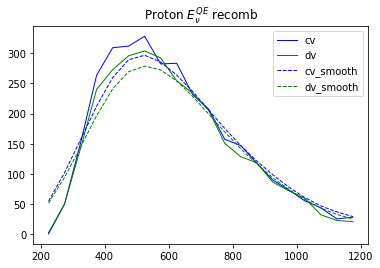

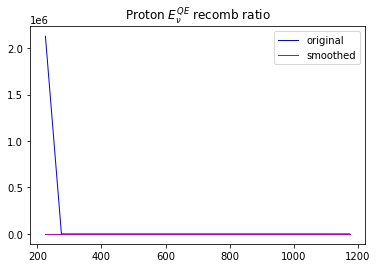

--------------------------  Hi There --------------------
3153.3203863602857
3153.320433860287
2980.7397792475886
2980.739825428977
EnuQE_proton [0.00315116 0.00580301 0.00601072 0.00571602 0.0051498  0.00472771
 0.00367432 0.00209362 0.00131873 0.00120417 0.00109964 0.00115202
 0.00116899 0.00160853 0.00241954 0.00244813 0.00299259 0.00578468
 0.01249392 0.01923288]
EnuQE_proton [0.00000000e+00 1.29393893e-04 3.40815102e-03 7.87140337e-03
 1.40088977e-02 2.68029874e-03 5.52285898e-03 1.21598540e-03
 1.05963562e-02 1.05225936e-04 9.10831429e-05 1.84344688e-03
 1.59824514e-02 2.34287045e-05 1.53565111e-03 2.94095011e-04
 5.79269554e-03 7.12864916e-02 1.05336328e-02 7.25923765e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


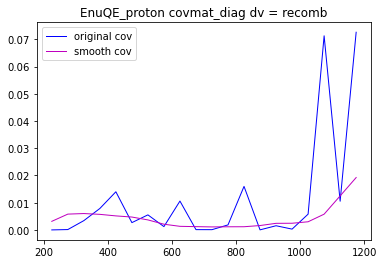

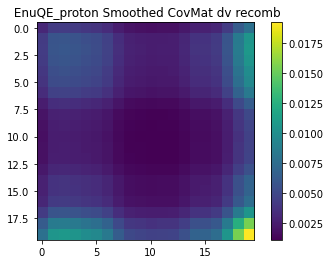

3
cv = 3194  and dv = 3056
cv POT = 609362734189999947776.000000 dv POT = 594452048285999955968.000000
cv[0] =  988.961218    cv[1] = 581.078263  rat = 0.629896
bwid = 199.304238 xmax-xmin=1000.000000  sum_cv = 3153.320434
[1.00000000e-06 4.95307802e+01 1.51030855e+02 2.63447631e+02
 3.09300836e+02 3.12077207e+02 3.28402606e+02 2.82384706e+02
 2.83490738e+02 2.31397934e+02 2.07216373e+02 1.57167612e+02
 1.46869925e+02 1.17568636e+02 8.93879762e+01 7.29751615e+01
 5.49121359e+01 4.34006963e+01 2.48994060e+01 2.78592170e+01]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


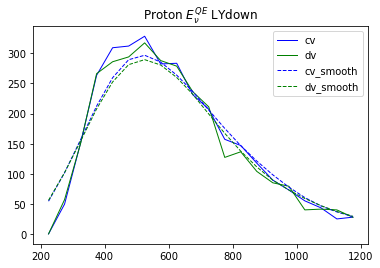

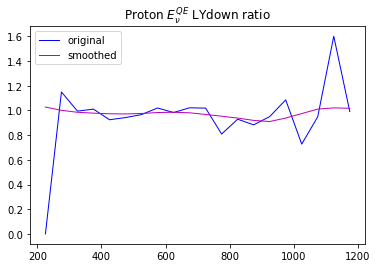

--------------------------  Hi There --------------------
3153.3203863602857
3153.320433860287
3065.1631825774057
3065.1632295063387
EnuQE_proton [7.49645845e-04 1.05690201e-06 2.22071576e-04 4.78226520e-04
 7.34309596e-04 8.02611643e-04 6.02258858e-04 2.88662258e-04
 2.13840428e-04 3.65508742e-04 1.04657055e-03 2.16419576e-03
 3.83089498e-03 6.49832792e-03 8.06805167e-03 3.81100253e-03
 6.50959011e-04 1.20708408e-04 4.30692408e-04 3.06776284e-04]
EnuQE_proton [0.00000000e+00 2.23686932e-02 3.02846275e-05 1.11903538e-04
 5.66707879e-03 3.33821089e-03 1.12188065e-03 3.91947190e-04
 2.81527958e-04 4.57005811e-04 3.54711299e-04 3.65534688e-02
 5.03398188e-03 1.35777649e-02 2.49629365e-03 7.33354808e-03
 7.44327730e-02 2.63446709e-03 3.61074744e-01 8.49099293e-05]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


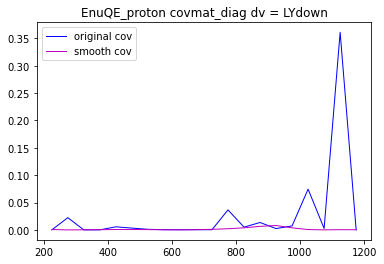

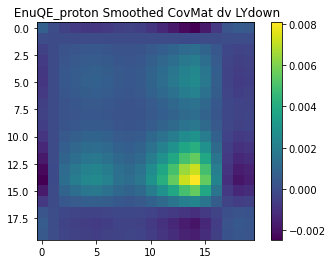

4
cv = 3194  and dv = 3376
cv POT = 609362734189999947776.000000 dv POT = 621993777142999941120.000000
cv[0] =  988.961218    cv[1] = 581.078263  rat = 0.629896
bwid = 199.304238 xmax-xmin=1000.000000  sum_cv = 3153.320434
[1.00000000e-06 4.95307802e+01 1.51030855e+02 2.63447631e+02
 3.09300836e+02 3.12077207e+02 3.28402606e+02 2.82384706e+02
 2.83490738e+02 2.31397934e+02 2.07216373e+02 1.57167612e+02
 1.46869925e+02 1.17568636e+02 8.93879762e+01 7.29751615e+01
 5.49121359e+01 4.34006963e+01 2.48994060e+01 2.78592170e+01]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


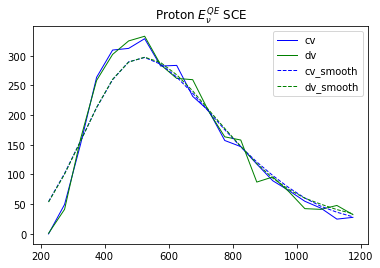

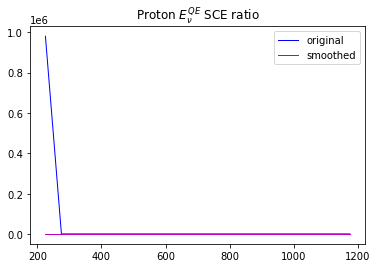

--------------------------  Hi There --------------------
3153.3203863602857
3153.320433860287
3170.9429288572924
3170.942976945082
EnuQE_proton [1.81767272e-04 1.50413089e-04 1.00240195e-05 5.42133667e-06
 4.93731334e-06 1.71424639e-06 2.85839603e-06 9.50013168e-05
 2.09018005e-04 2.81461378e-04 1.76031911e-04 1.46868420e-04
 2.98554278e-05 5.02514497e-04 1.94628521e-03 1.60875539e-03
 1.30228077e-05 5.50061566e-03 1.46272178e-02 3.26759621e-02]
EnuQE_proton [0.00000000e+00 2.75458703e-02 3.47352387e-03 3.95050074e-04
 5.55305663e-04 1.62482713e-03 1.57934314e-04 5.64429789e-05
 5.94355862e-03 1.46910600e-02 3.11287633e-05 1.54003264e-03
 5.68188151e-03 6.66271027e-02 5.20287385e-03 6.30509001e-04
 5.09297248e-02 2.36137115e-03 8.51958435e-01 2.76886033e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


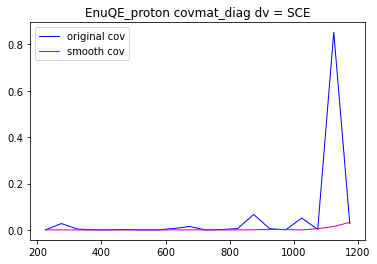

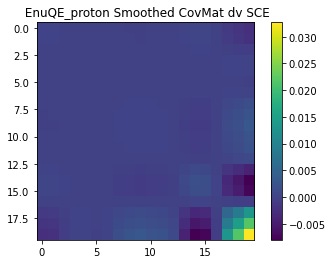

5
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


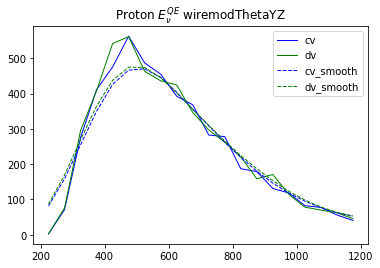

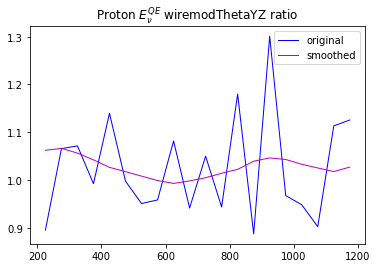

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5031.30309135185
5031.303153118318
EnuQE_proton [3.88591662e-03 4.40877059e-03 3.19414097e-03 1.79332819e-03
 7.13354962e-04 3.14356139e-04 7.04020683e-05 6.79624821e-07
 4.76146723e-05 2.61513221e-06 2.55455621e-05 2.06870401e-04
 5.09061251e-04 1.56399278e-03 2.15436310e-03 1.86695357e-03
 1.09874468e-03 6.47259367e-04 3.20472395e-04 7.43273509e-04]
EnuQE_proton [1.09075447e-02 4.33489241e-03 5.12021945e-03 5.59357234e-05
 1.95201335e-02 4.97988854e-06 2.38994091e-03 1.71638851e-03
 6.70533580e-03 3.39215010e-03 2.50761537e-03 3.16382163e-03
 3.23836226e-02 1.26408425e-02 9.04733379e-02 1.04355061e-03
 2.64898493e-03 9.48329695e-03 1.28489284e-02 1.58007037e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


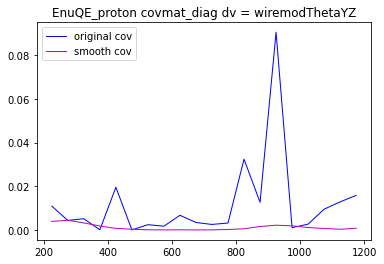

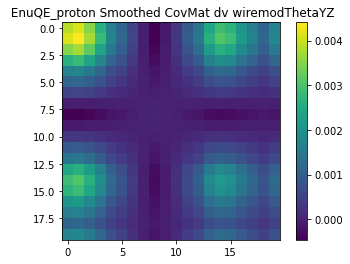

6
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


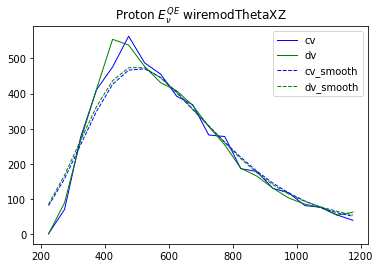

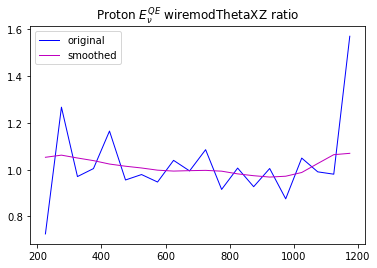

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
4973.796183944728
4973.7962448441185
EnuQE_proton [2.77935876e-03 3.82718974e-03 2.46687043e-03 1.47810478e-03
 5.65771298e-04 2.08991997e-04 4.78975265e-05 5.88155891e-06
 4.00404840e-05 1.99599616e-05 1.06982773e-05 4.51230384e-05
 3.33272188e-04 6.80869692e-04 1.02070901e-03 8.00625090e-04
 1.53329881e-04 6.81417328e-04 4.08157984e-03 4.84767537e-03]
EnuQE_proton [7.57504550e-02 7.13651115e-02 8.89866516e-04 1.90947707e-05
 2.71924200e-02 1.97162424e-03 4.48133977e-04 2.82306269e-03
 1.56481585e-03 3.18835534e-05 7.26814392e-03 7.20087545e-03
 4.19826167e-05 5.34946945e-03 2.23277775e-05 1.56457294e-02
 2.42775152e-03 9.28002864e-05 3.84437169e-04 3.25703614e-01]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


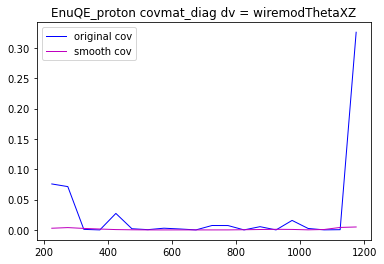

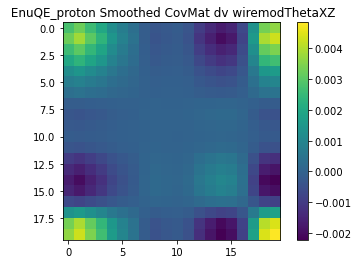

7
cv = 4796  and dv = 7138
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv[0] =  364.637758    cv[1] = 943.549215  rat = 0.278735
bwid = 186.979301 xmax-xmin=1000.000000  sum_cv = 4929.798038
[  2.13163119  71.04384267 275.34595827 411.27090588 475.38312448
 562.54568393 486.94448074 454.94292205 392.34225094 368.20359293
 282.34002109 277.8961861  186.73085492 178.71516388 130.98048477
 117.97120497  82.0633977   77.10473974  55.62924003  40.2123521 ]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


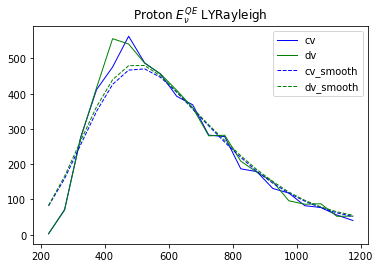

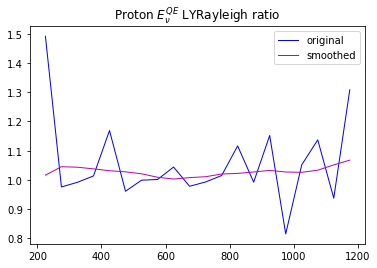

--------------------------  Hi There --------------------
4929.797977695787
4929.7980383757895
5042.5515054672005
5042.5515669811775
EnuQE_proton [2.48345357e-04 2.00581973e-03 1.84984864e-03 1.39725327e-03
 9.60912219e-04 7.39796653e-04 4.19172074e-04 7.50111790e-05
 6.20254595e-06 5.45979618e-05 1.09701548e-04 3.87334170e-04
 4.77999478e-04 7.12852821e-04 1.02768522e-03 7.11076752e-04
 6.54165467e-04 1.07964200e-03 2.59087841e-03 4.51574028e-03]
EnuQE_proton [2.41815131e-01 6.05866457e-04 7.55724920e-05 1.72820745e-04
 2.84706173e-02 1.54148728e-03 2.05711659e-06 8.97588892e-07
 1.89544967e-03 4.94535249e-04 5.71952143e-05 2.09692829e-04
 1.34543898e-02 6.86883976e-05 2.30348136e-02 3.44100109e-02
 2.60775669e-03 1.87132753e-02 3.97158958e-03 9.49947043e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


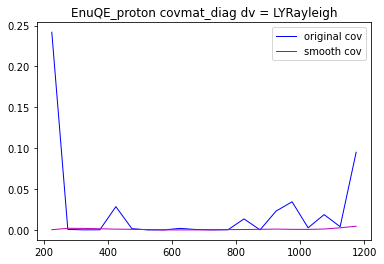

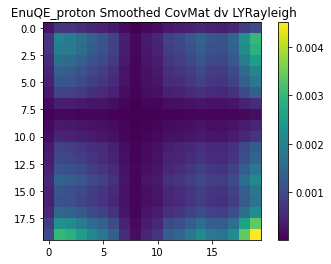

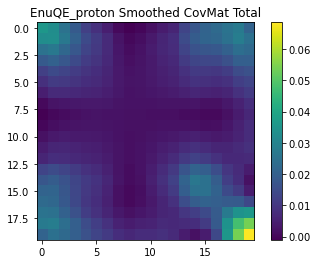

8
0
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


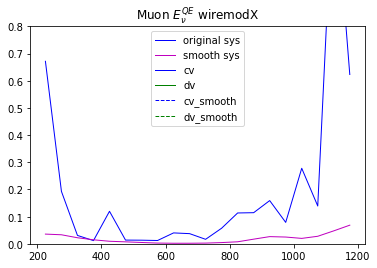

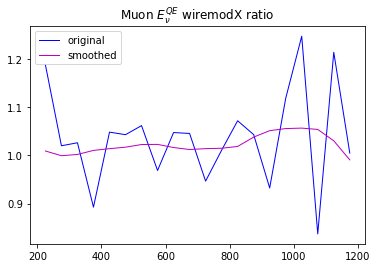

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5856.083540990972
5856.083609020629
EnuQE_muon [8.17998806e-05 5.72155514e-07 3.56674932e-06 1.05329170e-04
 1.92412108e-04 2.86876625e-04 5.04553261e-04 5.16947614e-04
 2.63314958e-04 1.47111528e-04 1.93226735e-04 2.17208737e-04
 3.41739736e-04 1.43569030e-03 2.62444373e-03 3.08816601e-03
 3.19653978e-03 2.89428648e-03 9.14899139e-04 8.80893839e-05]
EnuQE_muon [3.52320101e-02 3.95744769e-04 6.82606363e-04 1.15507473e-02
 2.32241337e-03 1.83930605e-03 3.80440431e-03 9.83823865e-04
 2.23861737e-03 2.06586251e-03 2.86065799e-03 1.15715349e-04
 5.15278220e-03 1.85237177e-03 4.58444736e-03 1.40106469e-02
 6.10781154e-02 2.65685925e-02 4.57160415e-02 2.21399274e-05]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


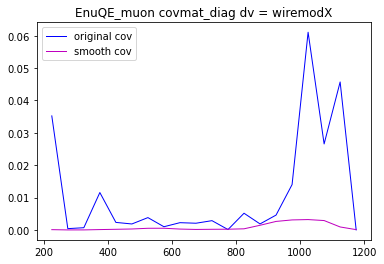

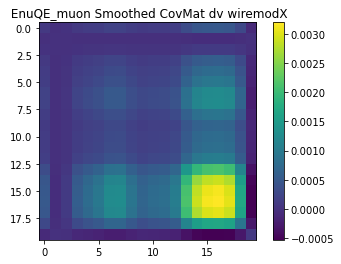

1
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


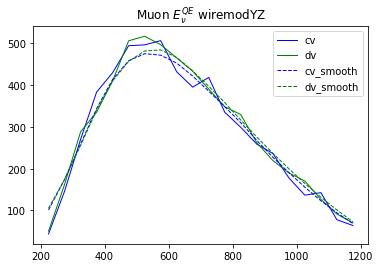

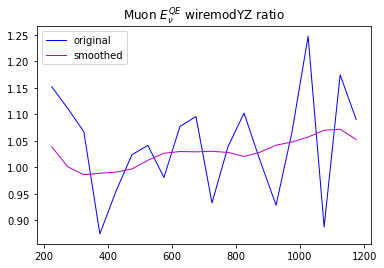

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5856.815716651262
5856.815784744596
EnuQE_muon [1.51238167e-03 1.32653773e-06 1.90898066e-04 1.19476493e-04
 7.91541881e-05 8.57660237e-06 1.82557437e-04 7.18264547e-04
 8.95726534e-04 8.64670828e-04 9.26084553e-04 7.99133092e-04
 4.29648156e-04 8.25857907e-04 1.75409722e-03 2.30498810e-03
 3.27329306e-03 4.91103800e-03 5.18750729e-03 2.76471476e-03]
EnuQE_muon [0.02313466 0.0123437  0.00453171 0.01570997 0.00205579 0.00057064
 0.00172014 0.00035752 0.00596014 0.00918911 0.00446792 0.00152927
 0.0104878  0.00017136 0.00505027 0.00455131 0.06116364 0.01257059
 0.03045802 0.00820192]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


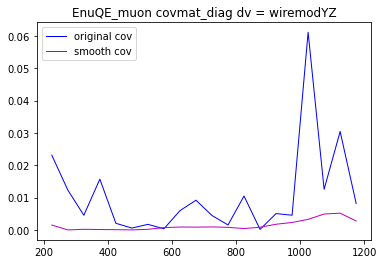

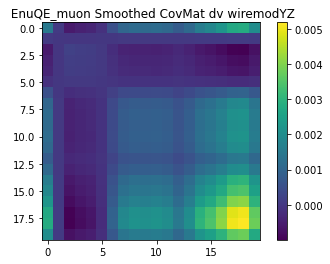

2
cv = 3194  and dv = 3131
cv POT = 609362734189999947776.000000 dv POT = 627484668519000047616.000000
cv[0] =  824.239620    cv[1] = 565.494515  rat = 0.593092
bwid = 195.493419 xmax-xmin=1000.000000  sum_cv = 3609.598103
[ 20.34861406  88.13772312 145.93377709 194.65325379 245.87810181
 272.60922509 284.7653349  301.39488017 305.09010442 308.60787795
 256.48417997 228.91890594 208.42775391 180.6047026  154.49287813
 126.86907925 102.68900083  86.36065846  55.00037116  42.33168002]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


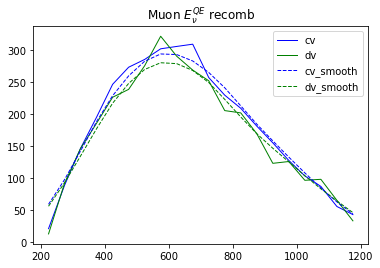

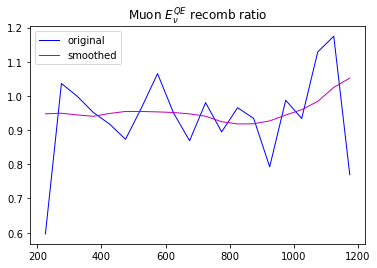

--------------------------  Hi There --------------------
3609.598051020438
3609.5981026704403
3416.4162093069785
3416.4162593728456
EnuQE_muon [0.0027503  0.00256119 0.0030987  0.00355192 0.00264265 0.00206461
 0.00207523 0.00218568 0.00235368 0.00276738 0.00352621 0.0056896
 0.00672541 0.00665037 0.00535068 0.0031294  0.00162804 0.00025634
 0.00062244 0.00270331]
EnuQE_muon [1.62879322e-01 1.32579774e-03 2.63246312e-06 2.39225395e-03
 6.74535624e-03 1.61078803e-02 1.18998678e-03 4.23997853e-03
 2.51041188e-03 1.71792151e-02 3.87564591e-04 1.10696718e-02
 1.19029016e-03 4.32692342e-03 4.30309824e-02 1.59619967e-04
 4.35292320e-03 1.65256576e-02 3.04345027e-02 5.31696956e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


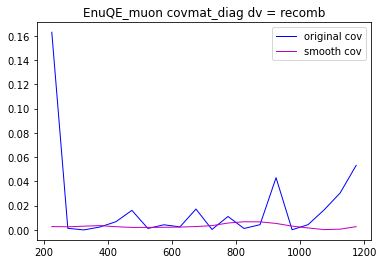

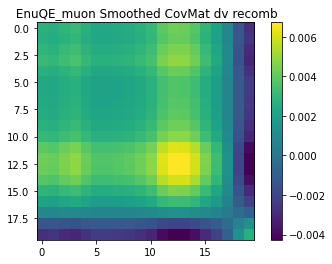

3
cv = 3194  and dv = 3056
cv POT = 609362734189999947776.000000 dv POT = 594452048285999955968.000000
cv[0] =  824.239620    cv[1] = 565.494515  rat = 0.593092
bwid = 195.493419 xmax-xmin=1000.000000  sum_cv = 3609.598103
[ 20.34861406  88.13772312 145.93377709 194.65325379 245.87810181
 272.60922509 284.7653349  301.39488017 305.09010442 308.60787795
 256.48417997 228.91890594 208.42775391 180.6047026  154.49287813
 126.86907925 102.68900083  86.36065846  55.00037116  42.33168002]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


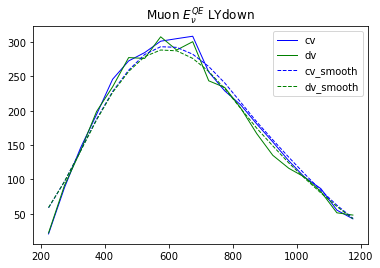

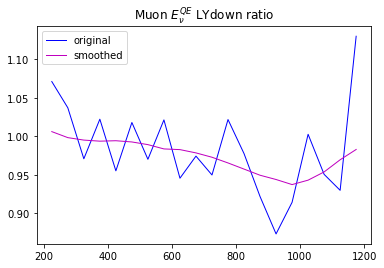

--------------------------  Hi There --------------------
3609.598051020438
3609.5981026704403
3522.2015754225863
3522.201626513355
EnuQE_muon [3.67643965e-05 3.01297537e-06 2.42906988e-05 3.99139917e-05
 3.31251279e-05 5.39407364e-05 1.16858924e-04 2.68076967e-04
 2.98385388e-04 4.63259871e-04 7.37776051e-04 1.19389477e-03
 1.80712459e-03 2.54855706e-03 3.13837760e-03 3.91801278e-03
 3.23344394e-03 2.13525159e-03 9.26319621e-04 2.92208758e-04]
EnuQE_muon [5.03462145e-03 1.36568698e-03 8.50160009e-04 4.91438035e-04
 2.00651341e-03 3.20398923e-04 8.89075305e-04 4.52314912e-04
 2.95176482e-03 6.60261347e-04 2.51395117e-03 4.71261401e-04
 5.03049952e-04 6.09888480e-03 1.60173038e-02 7.32526534e-03
 6.78886252e-06 2.43581842e-03 4.90523267e-03 1.68225750e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


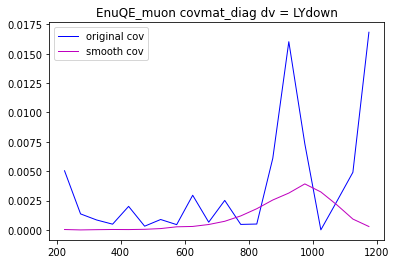

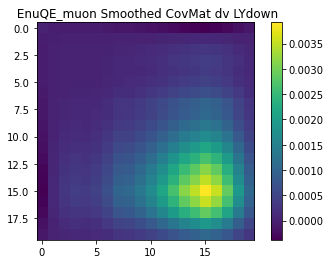

4
cv = 3194  and dv = 3376
cv POT = 609362734189999947776.000000 dv POT = 621993777142999941120.000000
cv[0] =  824.239620    cv[1] = 565.494515  rat = 0.593092
bwid = 195.493419 xmax-xmin=1000.000000  sum_cv = 3609.598103
[ 20.34861406  88.13772312 145.93377709 194.65325379 245.87810181
 272.60922509 284.7653349  301.39488017 305.09010442 308.60787795
 256.48417997 228.91890594 208.42775391 180.6047026  154.49287813
 126.86907925 102.68900083  86.36065846  55.00037116  42.33168002]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


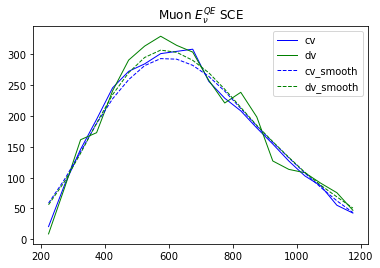

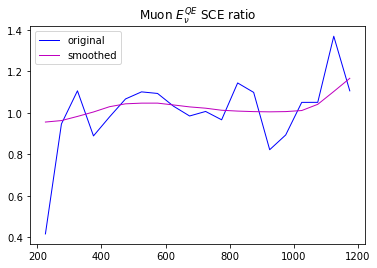

--------------------------  Hi There --------------------
3609.598051020438
3609.5981026704403
3697.882747343074
3697.882800064811
EnuQE_muon [1.97556888e-03 1.39725375e-03 2.98276179e-04 1.77681574e-05
 8.80834003e-04 1.90815640e-03 2.20548372e-03 2.20982533e-03
 1.45587235e-03 8.31195988e-04 5.07478239e-04 1.58567620e-04
 7.22317252e-05 3.59551100e-05 2.39075041e-05 3.66729481e-05
 1.25128914e-04 1.69552427e-03 1.06578013e-02 2.78984383e-02]
EnuQE_muon [3.42755500e-01 2.86912662e-03 1.13540018e-02 1.24425085e-02
 3.93465301e-04 4.50916791e-03 1.03004078e-02 8.79940094e-03
 1.02197858e-03 2.29835205e-04 4.57862544e-05 1.12955261e-03
 2.09006865e-02 9.78624358e-03 3.17890052e-02 1.14332678e-02
 2.56568608e-03 2.58299925e-03 1.37241300e-01 1.13459401e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


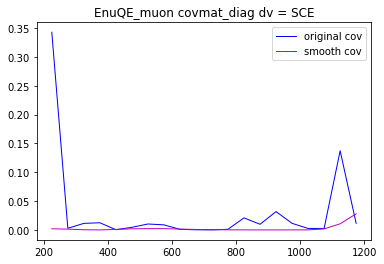

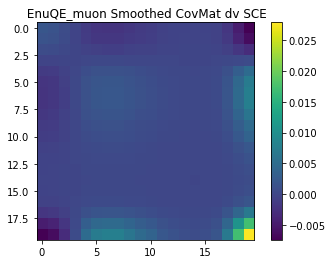

5
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


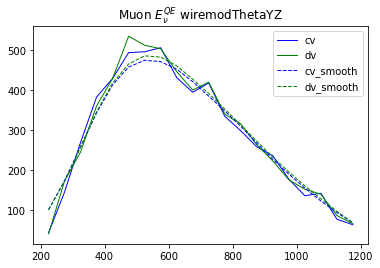

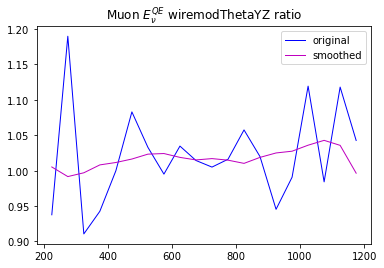

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5832.402716978622
5832.402785350645
EnuQE_muon [2.58003109e-05 7.18902845e-05 9.80694976e-06 6.38118701e-05
 1.29439790e-04 2.64382902e-04 5.36586812e-04 5.76328885e-04
 3.45542864e-04 2.24920759e-04 2.84766090e-04 2.15113578e-04
 1.02898677e-04 3.46205257e-04 6.16568370e-04 7.45802985e-04
 1.28013746e-03 1.81556677e-03 1.26424137e-03 1.35724891e-05]
EnuQE_muon [3.88764133e-03 3.58886852e-02 7.98361212e-03 3.29875915e-03
 6.35945523e-08 6.84988005e-03 1.07375787e-03 2.50609064e-05
 1.19144892e-03 2.01879442e-04 2.41060158e-05 2.53770932e-04
 3.28528503e-03 3.84125470e-04 2.98770031e-03 8.75860111e-05
 1.41763579e-02 2.54148089e-04 1.38553340e-02 1.80288730e-03]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


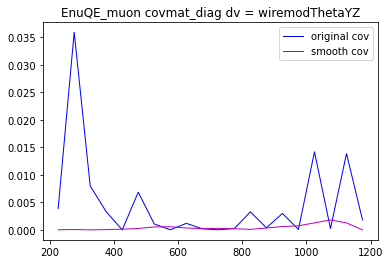

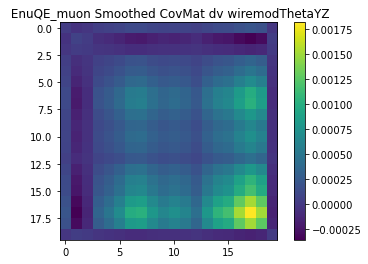

6
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


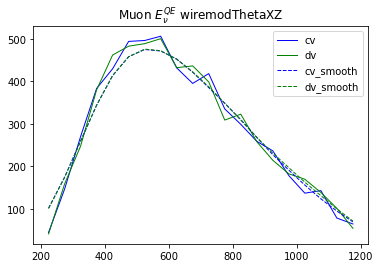

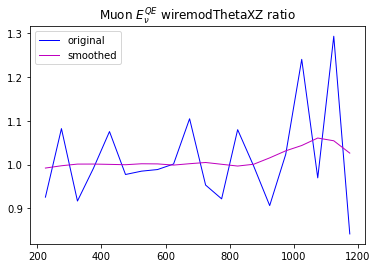

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5770.663041829843
5770.663109291706
EnuQE_muon [6.41359757e-05 7.60944102e-06 1.08657615e-06 1.27182731e-06
 1.63808427e-07 1.54046741e-07 3.22509124e-06 2.16390867e-06
 1.49961711e-06 3.68626796e-06 2.20960768e-05 3.72155763e-07
 1.16890088e-05 4.42144737e-07 2.32749651e-04 9.80452548e-04
 1.89116751e-03 3.66630996e-03 2.94681349e-03 6.82213818e-04]
EnuQE_muon [5.54410739e-03 6.73088039e-03 6.94256790e-03 6.99278101e-05
 5.67371367e-03 5.15997778e-04 2.27743547e-04 1.30034758e-04
 1.41757891e-06 1.09338602e-02 2.19533149e-03 6.13757381e-03
 6.34587833e-03 1.19494581e-05 8.78205927e-03 5.36077399e-04
 5.76822295e-02 9.24343308e-04 8.58293323e-02 2.50890414e-02]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


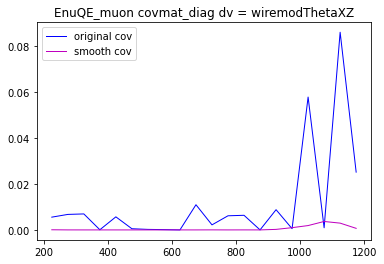

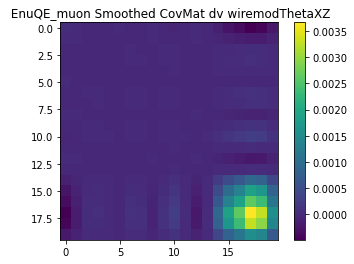

7
cv = 4796  and dv = 7138
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv[0] =  453.776059    cv[1] = 1029.628947  rat = 0.305902
bwid = 182.968850 xmax-xmin=1000.000000  sum_cv = 5737.778003
[ 43.89999795 145.8547916  269.77346783 382.84708601 429.25358029
 493.66055367 495.79899677 505.81912314 431.31232184 394.75255955
 417.92082682 334.7732174  298.59299809 258.56402183 236.12151154
 177.88131229 136.51434913 142.53116899  77.88882671  64.01729136]


<ipython-input-4-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-4-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-4-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-4-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


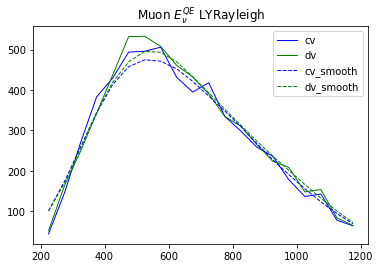

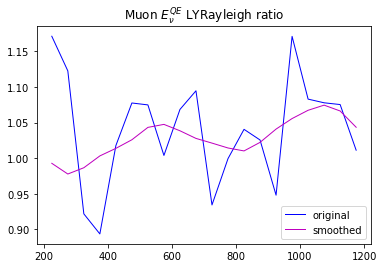

--------------------------  Hi There --------------------
5737.7779355119665
5737.77800279197
5890.800793512187
5890.800861882189
EnuQE_muon [5.42243198e-05 5.02992955e-04 1.84878809e-04 9.25073910e-06
 1.86701029e-04 6.64550342e-04 1.86521655e-03 2.24736598e-03
 1.47598829e-03 7.66203137e-04 4.44021509e-04 2.01771158e-04
 1.01143093e-04 4.88791440e-04 1.66346403e-03 3.09225778e-03
 4.52328806e-03 5.54751670e-03 4.39087582e-03 1.87861411e-03]
EnuQE_muon [2.93894532e-02 1.50622381e-02 6.16052598e-03 1.13890241e-02
 3.08854382e-04 6.00814679e-03 5.59855944e-03 1.36024660e-05
 4.68181083e-03 8.96435902e-03 4.34951003e-03 5.95375687e-07
 1.63614857e-03 6.48356169e-04 2.72420242e-03 2.93324574e-02
 6.88069066e-03 6.05155542e-03 5.67192031e-03 1.22733636e-04]


<ipython-input-24-9c2fa9811dc6>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-24-9c2fa9811dc6>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-24-9c2fa9811dc6>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-24-9c2fa9811dc6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


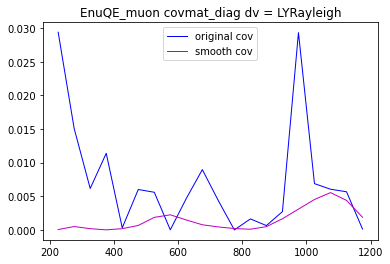

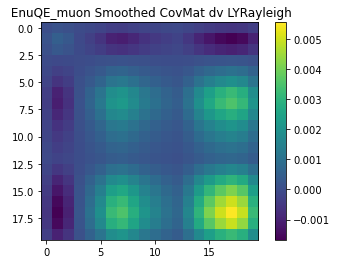

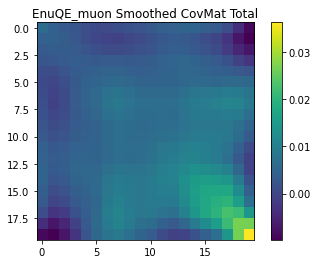

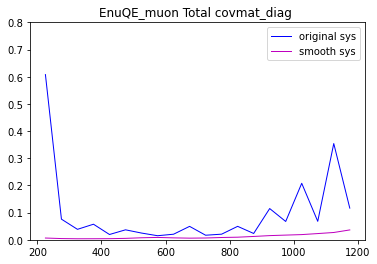

In [24]:
#histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu0%d'%(tag,bdtscore)


nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname
    #for i in range():
for var in (['EnuQE_proton','EnuQE_muon']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
        print(plotfolder_tmp)
    covfolder_tmp = covfolder+'/'+var

    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)
        np.save('%s/1Dhist_%s_run1_%s_CV_smooth.npy'%(histOut,var,names[sysi]), CV_smooth)
        np.save('%s/1Dhist_%s_run1_%s_DV_smooth.npy'%(histOut,var,names[sysi]), DV_smooth)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        
        np.save('%s/1Dhist_%s_run1_%s_CV_reg.npy'%(histOut,var,names[sysi]), hCV)
        np.save('%s/1Dhist_%s_run1_%s_DV_reg.npy'%(histOut,var,names[sysi]),h0)
        
        print('--------------------------  Hi There --------------------')
        print(sum(hCV))
        print(sum(CV_smooth))
        print(sum(h0))
        print(sum(DV_smooth))
    

        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('%s covmat_diag dv = %s'%(dist.myname,names[sysi]))
        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_cov.png'%(dist.myname,run),dpi=120,bbox_inches='tight')



[0.04570905 0.02201351 0.00877197 0.00517569 0.00497656 0.00496769
 0.00571425 0.00657584 0.00677864 0.00624649 0.00593719 0.00647112
 0.00668586 0.0065698  0.00887976 0.01381442 0.0216801  0.03464969
 0.04436907 0.04605291]


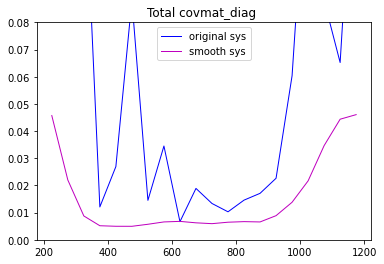

In [35]:
plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
plt.legend()
plt.ylim([0,0.08])
plt.title('Total covmat_diag ')
print(cov_smooth.diagonal())

Text(0.5, 1.0, 'Q2_1m1p Smoothed CovMat Total')

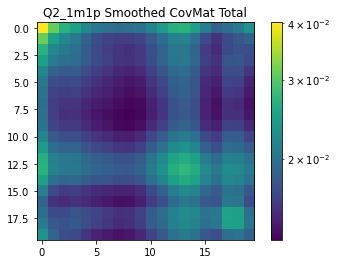

In [27]:
from matplotlib.colors import LogNorm

#f,ax = plt.subplots(1,1)
plt.imshow(cov_smooth, interpolation='none',norm=LogNorm())
plt.colorbar(orientation='vertical')
plt.title('%s Smoothed CovMat Total'%dist.myname)
plt.show()

wiremodX
6.767481725635091e-06
[1.05624516e-02 3.71392241e-03 1.01742918e-03 3.63174841e-04
 5.72340874e-04 5.92233991e-04 6.24672740e-04 6.79882706e-04
 5.39380110e-04 3.80114395e-04 1.61721776e-05 8.47465080e-05
 3.98223930e-04 1.08966308e-03 2.06828998e-03 3.54632915e-03
 4.43753687e-03 4.69534758e-03 4.06027909e-03 2.18184532e-03]


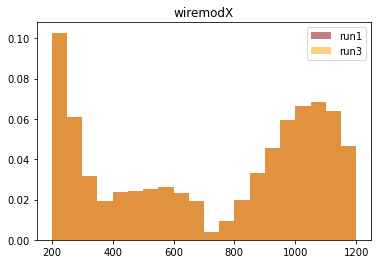

wiremodYZ
5.802018635080213e-05
[1.63198760e-02 1.01248650e-02 4.17105417e-03 1.67588550e-03
 1.04320327e-03 5.20638159e-04 1.70836706e-04 5.46554141e-05
 3.65840865e-05 2.19520849e-05 2.06127098e-05 1.23983989e-04
 2.44559498e-04 6.33413471e-04 1.57578822e-03 3.28536578e-03
 5.61877332e-03 9.43082998e-03 1.42239125e-02 1.63118601e-02]


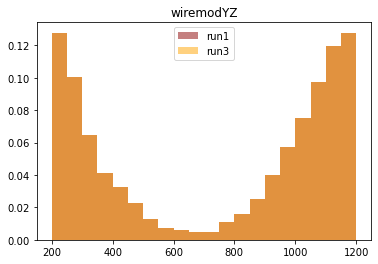

recomb
0.00033158060466039965
[9.75327382e-03 3.24361951e-03 5.43683867e-04 1.84094553e-05
 8.51966066e-05 4.58648643e-04 7.75047469e-04 7.21786900e-04
 3.12008132e-04 1.84111980e-05 7.87377379e-05 5.14613080e-04
 1.07861907e-03 1.31414768e-03 1.24477200e-03 1.28289579e-03
 1.09885849e-03 9.92153734e-04 7.81356133e-04 5.67558440e-04]


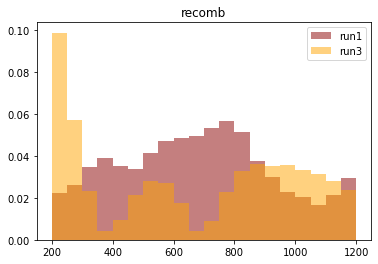

LYdown
0.0002444347496699101
[9.63467506e-03 5.56373004e-03 1.30576204e-03 3.67439560e-04
 2.17740603e-04 1.58742582e-04 1.65136430e-04 1.88463753e-04
 2.83486054e-04 4.40605613e-04 4.04510668e-04 4.17755835e-04
 2.93629985e-04 1.47620310e-04 5.92269507e-05 1.25540430e-05
 3.63202942e-04 7.80155015e-04 5.06459461e-04 1.35034130e-04]


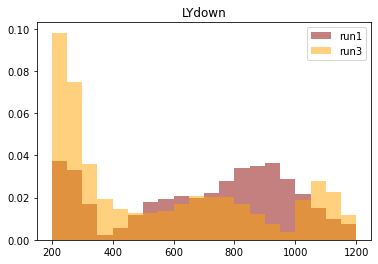

SCE
0.00017943981675736783
[1.36437621e-02 3.63859455e-03 1.56990326e-03 1.06017727e-03
 5.34286841e-04 1.95963374e-04 2.24870904e-05 2.93569880e-05
 1.58800351e-04 5.83590108e-04 1.24818816e-03 1.77406742e-03
 2.30899340e-03 2.89200305e-03 2.92412396e-03 3.51132224e-03
 3.62764778e-03 3.71408138e-03 3.21308862e-03 2.15577118e-03]


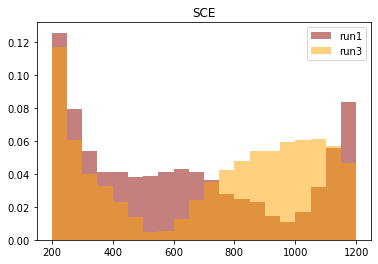

wiremodThetaYZ
1.5386665228824437e-06
[2.66235851e-03 4.03866293e-04 3.96867686e-05 5.60176096e-05
 2.15843216e-04 3.16412031e-04 2.90109862e-04 3.89115290e-04
 4.19833926e-04 2.92750855e-04 7.58121866e-05 3.41450738e-06
 1.40456495e-05 1.15974463e-04 5.33046230e-04 9.89728760e-04
 1.42518645e-03 1.71496041e-03 1.68948537e-03 1.47060402e-03]


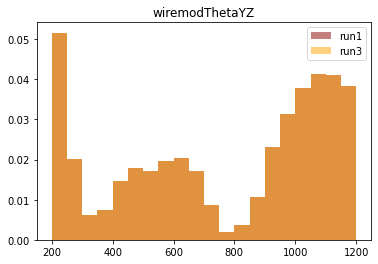

wiremodThetaXZ
0.00026859719922571376
[1.15310020e-02 7.69168559e-03 3.27675248e-03 1.96226403e-03
 2.04149367e-03 1.98838697e-03 1.58553828e-03 1.53802680e-03
 1.70808999e-03 1.69122497e-03 1.17038228e-03 1.17373554e-03
 9.01577552e-04 3.01193000e-04 3.22495888e-05 8.74695959e-04
 3.03356381e-03 7.11633942e-03 8.39372048e-03 4.85181856e-03]


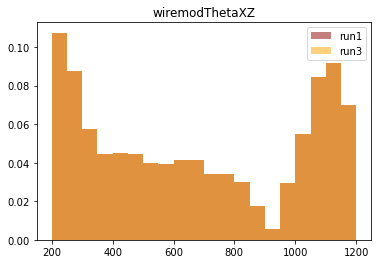

LYRayleigh
0.0001250841503952704
[4.13261505e-03 1.66565559e-03 2.75245110e-04 1.49208089e-06
 6.87234890e-05 2.50346656e-04 4.60675379e-04 5.13372508e-04
 3.96048900e-04 2.12013197e-04 8.09183222e-05 1.49658365e-06
 2.82408460e-05 2.21403063e-05 1.27290382e-05 2.92838885e-04
 1.35490692e-03 3.24659488e-03 4.16999555e-03 3.87019095e-03]


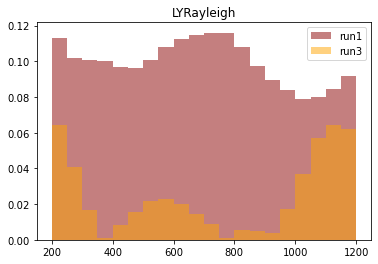

0.0014242704757110292
[0.09203467 0.04573467 0.01659256 0.00684007 0.00516796 0.00460771
 0.00411195 0.00411534 0.00386224 0.00381658 0.00343963 0.00443017
 0.00550049 0.00661945 0.00845493 0.0142927  0.02219156 0.03287441
 0.03797567 0.03186277]


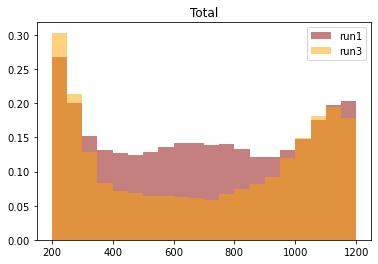

In [28]:
from numpy import genfromtxt

for sysi in range(len(a_df_sys)):
#for sysi in range(1):
    print(names[sysi])
    run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_%s_cov.csv'%names[sysi], delimiter=',')
    run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_%s_cov.csv'%names[sysi], delimiter=',')
    #print(np.average(run1))
    print(np.average(run3))


    #print(run1.diagonal())
    print(run3.diagonal())
    plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
            color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
    plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
            color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
    plt.legend()
    plt.title(names[sysi])
    plt.show()
#print(np.sqrt(run3.diagonal()))
#bla = run3-run1
#print(100*bla.diagonal()/run3.diagonal())

run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_cov.csv', delimiter=',')
run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_cov.csv', delimiter=',')
#print(np.average(run1))
print(np.average(run3))


#print(run1.diagonal())
print(run3.diagonal())
plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
        color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
        color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
plt.legend()
plt.title('Total')
plt.show()

wiremodX
-3.350800393342968e-05
[ 0.01842157  0.00859834  0.00189521  0.00111419  0.00060856  0.00053494
  0.0005942   0.00056564  0.00049152  0.00037589  0.00012198 -0.00015306
 -0.00012234  0.00030968  0.00093974  0.00190481  0.00287053  0.0035426
  0.00308907  0.00101035]


<ipython-input-14-8da765d944c4>:17: RuntimeWarning: invalid value encountered in sqrt
  plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
<ipython-input-14-8da765d944c4>:19: RuntimeWarning: invalid value encountered in sqrt
  plt.bar(x, np.sqrt(run3.diagonal()), width = 50,


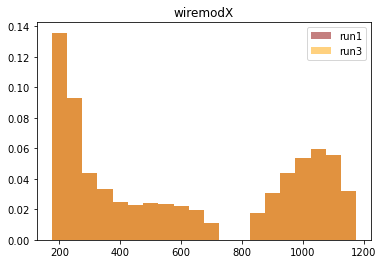

wiremodYZ
-2.416012790858716e-05
[ 8.60260270e-03  1.27385986e-02  6.05443281e-03  3.25262814e-03
  1.57769800e-03  7.93836477e-04  3.53760591e-04  1.30356362e-04
  4.22694373e-05  8.53679238e-06 -1.78176062e-05 -1.77012901e-05
  9.35458816e-05  3.48502481e-04  7.56472371e-04  1.60457616e-03
  3.01497693e-03  4.68779529e-03  5.33550479e-03  3.59382197e-03]


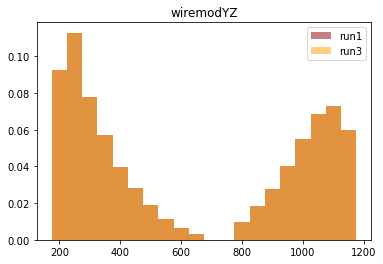

recomb
0.00022711912239799974
[ 9.45245394e-04  5.77061267e-03  1.34659361e-03  9.07018574e-05
 -1.71984928e-04 -3.85024627e-05  2.27827463e-04  4.32412725e-04
  3.21198407e-04  7.39519597e-05 -1.32266896e-04 -6.71749058e-05
  2.82596446e-04  7.66022200e-04  1.15070328e-03  1.46050653e-03
  1.08695565e-03  5.93823117e-04  4.12816444e-07 -2.41659111e-04]


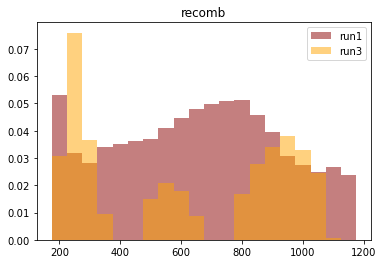

LYdown
0.00044871784670744933
[ 1.54159322e-02  6.90286454e-03  2.46465114e-03  1.08478412e-03
  4.06866037e-04  2.49382579e-04  1.94351394e-04  1.72985356e-04
  1.83645532e-04  2.43852925e-04  2.92499300e-04  3.64654546e-04
  3.15224753e-04  1.89666611e-04  8.61062267e-05 -3.04350787e-05
 -7.83700111e-05  5.10900822e-05  9.80184613e-05 -1.83100415e-04]


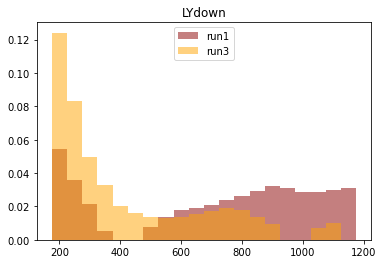

SCE
-1.1990811370199003e-05
[ 1.09382725e-02  6.21867177e-03  3.40042817e-03  1.28227480e-03
  6.92563221e-04  3.08336778e-04  3.50672193e-05 -9.36028608e-05
 -3.03454053e-05  2.10896208e-04  5.96082312e-04  1.06153599e-03
  1.78128532e-03  2.39442560e-03  2.84017671e-03  3.36366612e-03
  3.07271271e-03  2.26148166e-03  1.11285236e-03  9.49416312e-05]


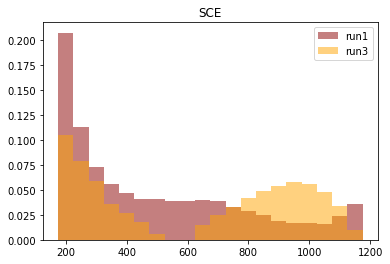

wiremodThetaYZ
1.6326363126470007e-06
[ 1.72782861e-03  1.35581167e-03  1.52126490e-04  1.44751130e-04
  7.26107844e-05  1.68949656e-04  2.38210629e-04  2.94787573e-04
  2.84412491e-04  2.80493723e-04  1.66581009e-04  1.02653459e-05
 -4.86777615e-05 -7.07906247e-06  1.18177996e-04  3.45416077e-04
  8.29412313e-04  1.20286351e-03  8.25807853e-04 -5.33369032e-05]


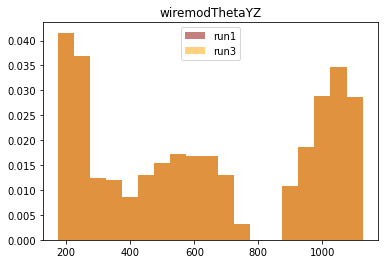

wiremodThetaXZ
0.0005127420152909616
[ 0.01141608  0.01021022  0.00486202  0.00358878  0.00231057  0.00203631
  0.00183771  0.00173782  0.00156734  0.00155697  0.0014787   0.00130783
  0.00097136  0.00051248 -0.00011844 -0.00043215  0.00021669  0.00186796
  0.00339638  0.00312401]


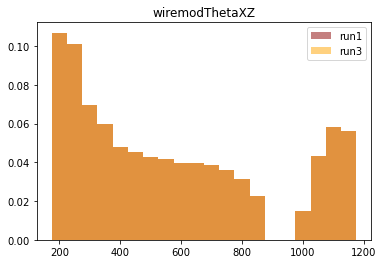

LYRayleigh
-4.640943932851062e-06
[ 5.90122742e-03  2.61606832e-03  4.23509016e-04 -1.30803688e-04
 -8.45517054e-05  6.95078957e-05  2.26286495e-04  3.85192264e-04
  4.56905241e-04  3.65528218e-04  1.92475672e-04  6.51650503e-05
 -1.19070013e-05 -4.00168649e-06 -8.90485083e-06 -1.81146540e-05
  2.20482867e-04  7.80652217e-04  1.14928876e-03  7.04290294e-04]


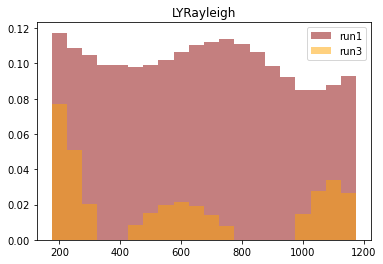

0.0014764724312441337
[0.0800232  0.06482902 0.02646357 0.01301767 0.00634902 0.0044598
 0.0037823  0.00362051 0.00332616 0.00311143 0.00273207 0.00273597
 0.00344672 0.00461532 0.0057361  0.00806748 0.01130582 0.0154577
 0.01505132 0.0075397 ]


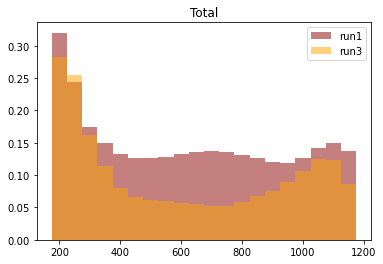

In [14]:
from numpy import genfromtxt
x= np.arange(200,1200,50)
for sysi in range(len(a_df_sys)):
#for sysi in range(1):
    print(names[sysi])
    run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_%s_cov.csv'%names[sysi], delimiter=',')
    run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_%s_cov.csv'%names[sysi], delimiter=',')
    run3 = run3[2:]
    run1 = run1[2:]

    #print(np.average(run1))
    print(np.average(run3))


    #print(run1.diagonal())
    print(run3.diagonal())
    plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
            color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
    plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
            color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
    plt.legend()
    plt.title(names[sysi])
    plt.show()
#print(np.sqrt(run3.diagonal()))
#bla = run3-run1
#print(100*bla.diagonal()/run3.diagonal())

run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_cov.csv', delimiter=',')
run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_cov.csv', delimiter=',')
run3 = run3[2:]
run1 = run1[2:]
#print(np.average(run1))
print(np.average(run3))


#print(run1.diagonal())
print(run3.diagonal())
plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
        color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
        color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
plt.legend()
plt.title('Total')
plt.show()

# Combined

In [8]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','SCE','wiremodThetaYZ','wiremodThetaXZ','LYRayleigh','LYAtt']
#names = ['wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys3 = []
a_df_sys1 = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys3 = pd.read_parquet('%s/pickles/%s_run3_%s.parquet'%(datafolder,sys,tag))
#    print(df_sys.shape[0])
    a_df_sys3.append(df_sys3)
    print("total %d, cv = %d dv = %d"%(df_sys3.shape[0],df_sys3.query("isCV==True").shape[0],df_sys3.query("isCV==False").shape[0]))

#    if(sys=='LYAtt'):continue
    df_sys1 = pd.read_parquet('%s/pickles/%s_run1_%s.parquet'%(datafolder,sys,tag))
    a_df_sys1.append(df_sys1)

    
    print("total %d, cv = %d dv = %d"%(df_sys1.shape[0],df_sys1.query("isCV==True").shape[0],df_sys1.query("isCV==False").shape[0]))
    i+=1

    #    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))

total 71256, cv = 58791 dv = 12465
total 71256, cv = 58791 dv = 12465
total 71341, cv = 58791 dv = 12550
total 71341, cv = 58791 dv = 12550
total 12286, cv = 5919 dv = 6367
total 13548, cv = 6823 dv = 6725
total 70231, cv = 58791 dv = 11440
total 13344, cv = 6823 dv = 6521
total 12061, cv = 5919 dv = 6142
total 13973, cv = 6823 dv = 7150
total 70893, cv = 58791 dv = 12102
total 70893, cv = 58791 dv = 12102
total 70891, cv = 58791 dv = 12100
total 70891, cv = 58791 dv = 12100
total 71362, cv = 58791 dv = 12571
total 13664, cv = 6823 dv = 6841
total 70238, cv = 58791 dv = 11447
total 70238, cv = 58791 dv = 11447


../outputs/PlotDumpsComb2021-04-02/sigprobavg
0
cv = 4796  and dv = 7090
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


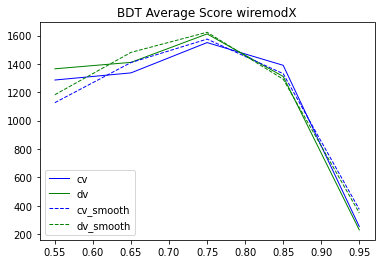

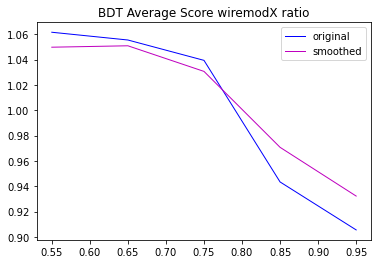

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


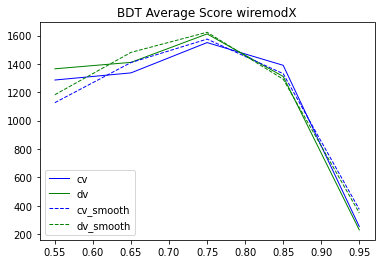

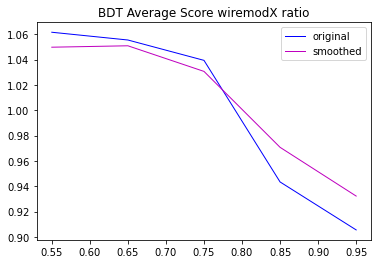

sigprobavg [0.00247495 0.00258786 0.00093996 0.00085591 0.00458653]


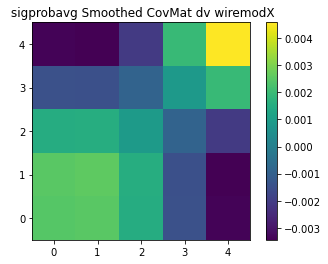

1
cv = 4796  and dv = 7113
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


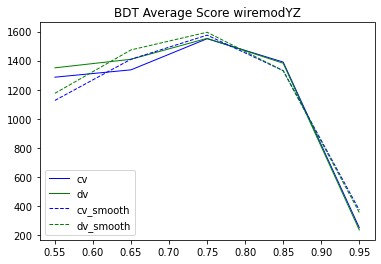

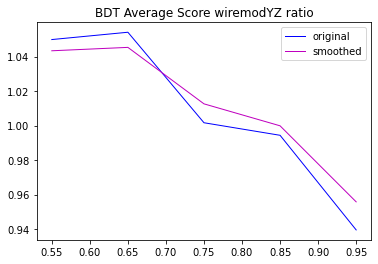

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


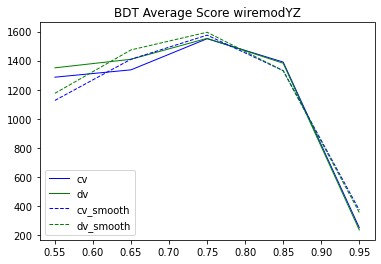

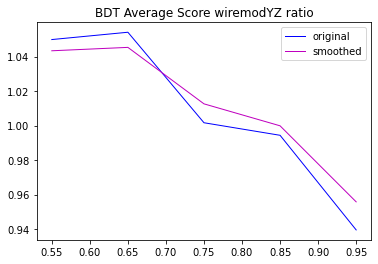

sigprobavg [1.88379321e-03 2.05927454e-03 1.58975169e-04 1.78306324e-08
 1.95868005e-03]


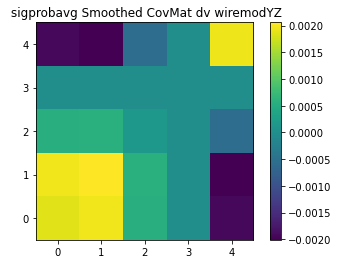

2
cv = 3446  and dv = 3728
cv = 3194  and dv = 3131
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
cv POT = 609362734189999947776.000000 dv POT = 627484668519000047616.000000
cv[0] =  0.647346    cv[1] = 0.921657  rat = 0.412584
bwid = 0.096606 xmax-xmin=0.500000  sum_cv = 3918.778615
[ 895.44239024  939.55917178 1025.26016964  914.65475719  143.86212592]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


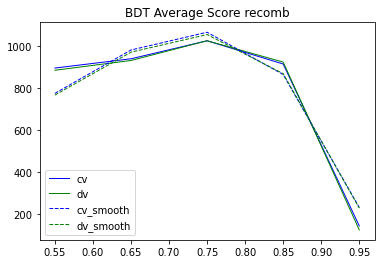

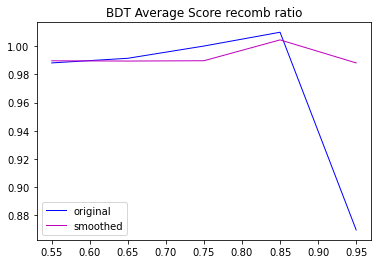

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


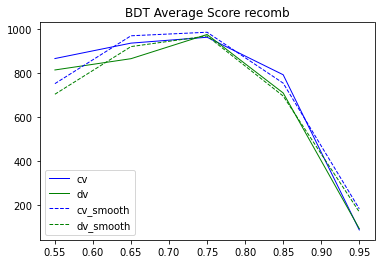

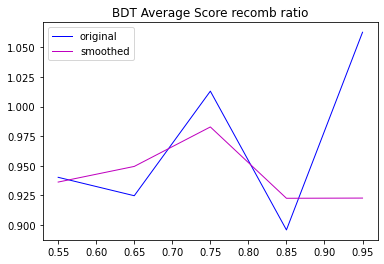

sigprobavg [0.00053928 0.00041249 0.00014187 0.00018789 0.00064535]


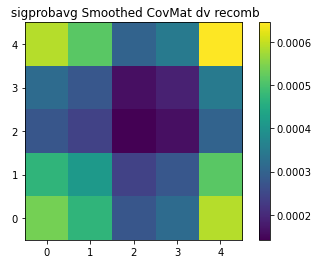

3
cv = 4796  and dv = 6515
cv = 3194  and dv = 3056
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000
cv POT = 609362734189999947776.000000 dv POT = 594452048285999955968.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


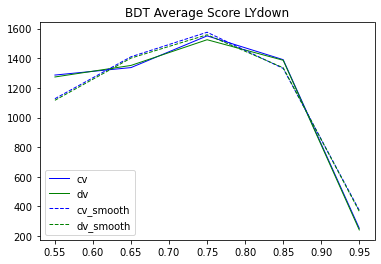

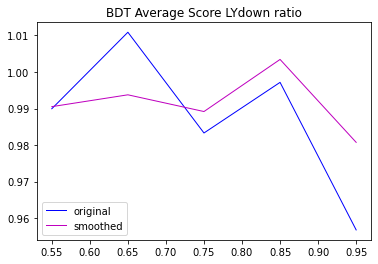

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


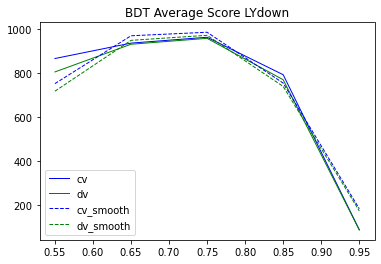

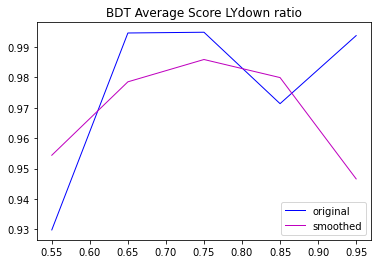

sigprobavg [3.46874427e-04 1.03534046e-04 1.34759513e-04 3.29686325e-06
 6.81077580e-04]


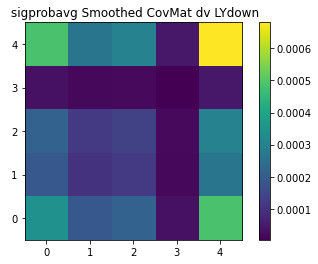

4
cv = 3446  and dv = 3593
cv = 3194  and dv = 3376
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
cv POT = 609362734189999947776.000000 dv POT = 621993777142999941120.000000
cv[0] =  0.647346    cv[1] = 0.921657  rat = 0.412584
bwid = 0.096606 xmax-xmin=0.500000  sum_cv = 3918.778615
[ 895.44239024  939.55917178 1025.26016964  914.65475719  143.86212592]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


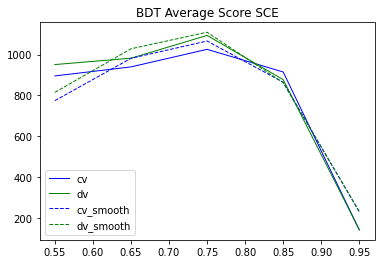

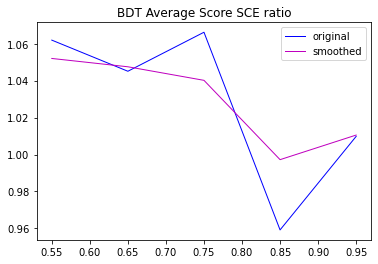

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


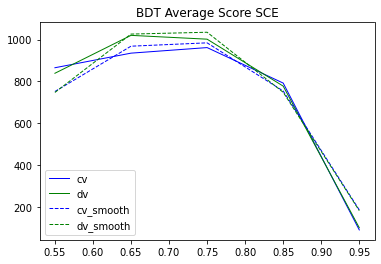

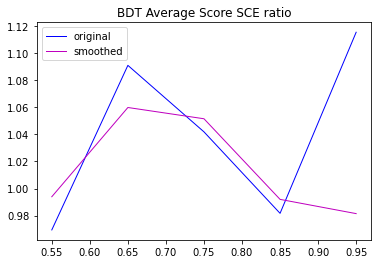

sigprobavg [1.44591294e-03 2.55309729e-03 1.83294257e-03 1.55446401e-05
 2.04653467e-05]


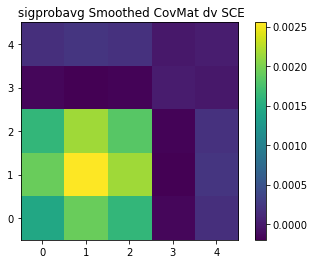

5
cv = 4796  and dv = 6885
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


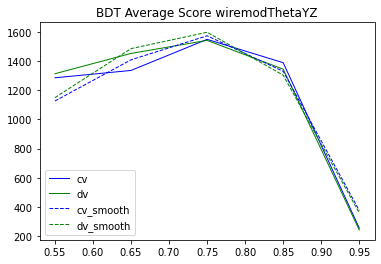

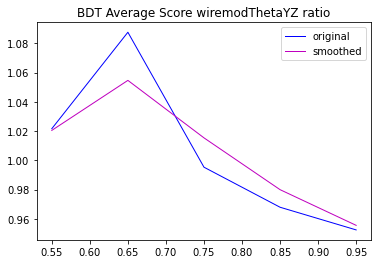

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


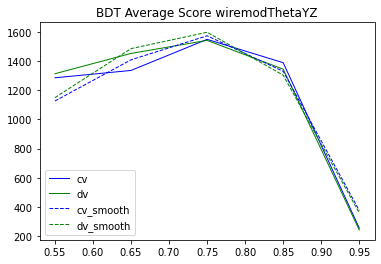

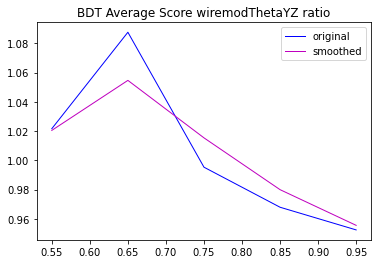

sigprobavg [0.0004194  0.00298859 0.0002368  0.00040078 0.00197233]


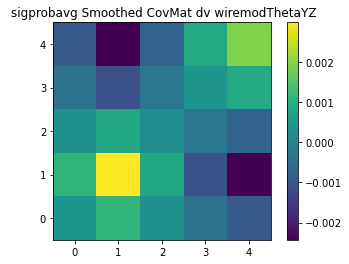

6
cv = 4796  and dv = 6945
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


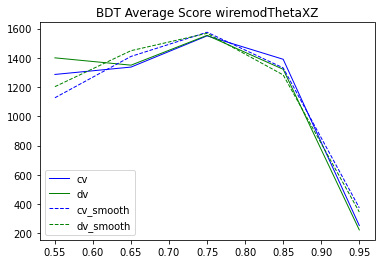

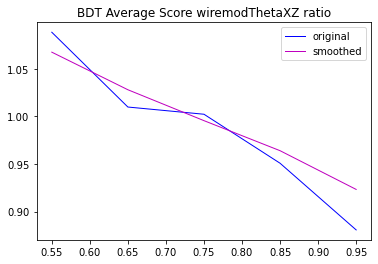

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


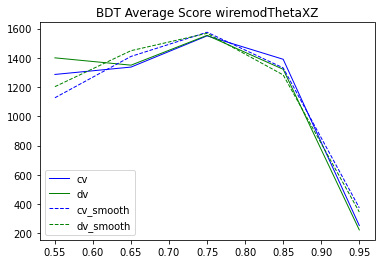

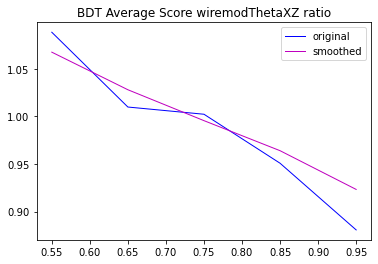

sigprobavg [4.54096480e-03 7.79105820e-04 2.05675392e-05 1.30228895e-03
 5.89056258e-03]


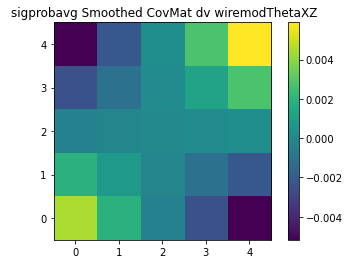

7
cv = 4796  and dv = 7138
cv = 3194  and dv = 3203
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv POT = 609362734189999947776.000000 dv POT = 674276740521999990784.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


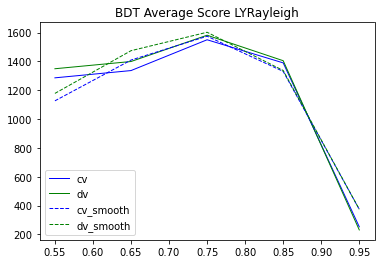

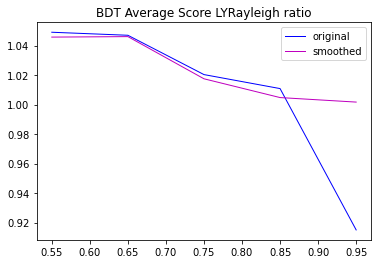

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


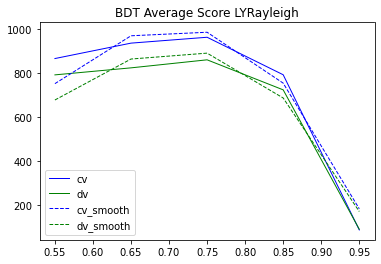

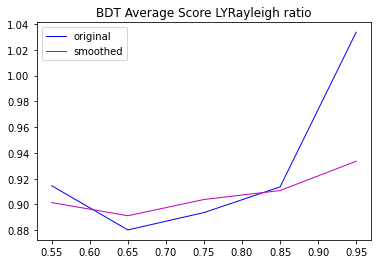

sigprobavg [8.58246322e-05 3.68530162e-05 9.72434118e-05 2.62799523e-04
 1.43016891e-04]


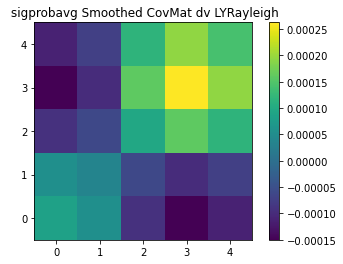

8
cv = 4796  and dv = 6518
cv = 4796  and dv = 6518
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


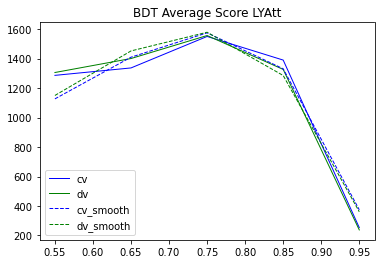

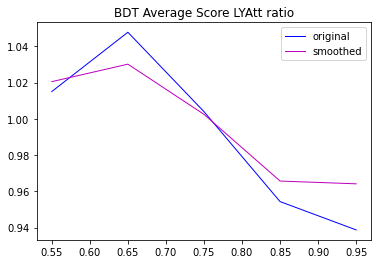

sigprobavg [4.20837068e-04 9.09130901e-04 6.17637015e-06 1.17632387e-03
 1.28393047e-03]


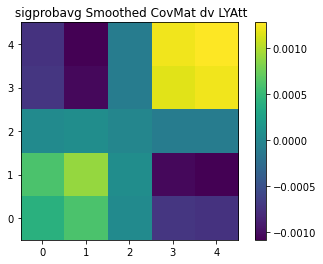

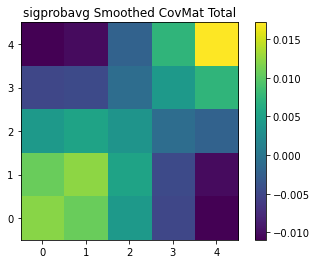

--------------------------
[[ 0.01215784  0.01075812  0.00416242 -0.00495458 -0.01096934]
 [ 0.01075812  0.01242994  0.00538482 -0.00463094 -0.0101666 ]
 [ 0.00416242  0.00538482  0.0035693  -0.00095286 -0.00214158]
 [-0.00495458 -0.00463094 -0.00095286  0.00420485  0.0074466 ]
 [-0.01096934 -0.0101666  -0.00214158  0.0074466   0.01718195]]
../outputs/covMatrixComb2021-04-02/sigprobavg/detsys_sigprobavg_run13_cov.csv


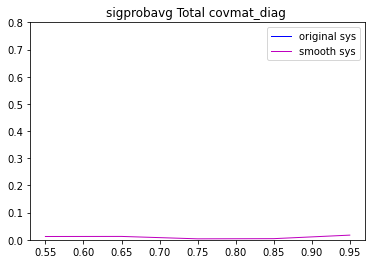

In [18]:
#histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu0%d'%(tag,bdtscore)

normFactor=6e21
nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname
    #for i in range():
for var in (['sigprobavg']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
        print(plotfolder_tmp)
    covfolder_tmp = covfolder+'/'+var

    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    for sysi in range(len(a_df_sys3)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf3 = a_df_sys3[sysi].query('Enu_1m1p > 0')
        myvardf1 = a_df_sys1[sysi].query('Enu_1m1p > 0')

        var_sys3 = myvardf3.query(s_cuts)[dist.myname]
        var_cv3 = myvardf3.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv3.shape[0],var_sys3.shape[0]))

        var_sys1 = myvardf1.query(s_cuts)[dist.myname]
        var_cv1 = myvardf1.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv1.shape[0],var_sys1.shape[0]))
        
        
        pot_cv3=myvardf3.query("isCV==True").iloc[0]["POT"]
        pot_dv3=myvardf3.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv3,pot_dv3))

                
        pot_cv1=myvardf1.query("isCV==True").iloc[0]["POT"]
        pot_dv1=myvardf1.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv1,pot_dv1))
        
        
        # get cv and detvar lists and apply weights
        var_cv_list3 = np.array(var_cv3.astype(float).values.tolist())
        var_sys_list3 = np.array(var_sys3.astype(float).values.tolist())
        cv_weights3 = np.array(myvardf3.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights3 = np.array(myvardf3.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio3 = pot_cv3 / pot_dv3
        norm3 = normFactor/ pot_cv3

        
        # get cv and detvar lists and apply weights
        var_cv_list1 = np.array(var_cv1.astype(float).values.tolist())
        var_sys_list1 = np.array(var_sys1.astype(float).values.tolist())
        cv_weights1 = np.array(myvardf1.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights1 = np.array(myvardf1.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio1 = pot_cv1 / pot_dv1
        norm1 = normFactor/ pot_cv1
#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth3,DV_smooth3 = smooth(var_cv_list3,var_sys_list3,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights3,dv_weights=dv_weights3,nbin=nbins,ratio=ratio3)
        CV_smooth3 = CV_smooth3*norm3
        DV_smooth3 = DV_smooth3*norm3        

        if sysi!=8:
            CV_smooth1,DV_smooth1 = smooth(var_cv_list1,var_sys_list1,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights1,dv_weights=dv_weights1,nbin=nbins,ratio=ratio1)
            CV_smooth1 = CV_smooth1*norm1
            DV_smooth1 = DV_smooth1*norm1
        else:
            CV_smooth1=DV_smooth1 = np.zeros(nbins)


        CV_smooth_tot = 0.256*CV_smooth1 +0.744*CV_smooth3
        DV_smooth_tot = 0.256*DV_smooth1 +0.744*DV_smooth3
        
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth_tot[i]*CV_smooth_tot[j])<1e-5:
                    cov_smooth_tmp[i][j]+=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth_tot[i]-CV_smooth_tot[i])*(DV_smooth_tot[j]-CV_smooth_tot[j])/(CV_smooth_tot[i]*CV_smooth_tot[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
  
        plt.imshow(cov_smooth_tmp, interpolation='none',origin='lower')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

#        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none',origin='lower')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_run13_cov.csv'%(dist.myname),cov_smooth, delimiter=',')
    print('--------------------------')
    print(cov_smooth)
    print(covfolder_tmp+'/detsys_%s_run13_cov.csv'%(dist.myname))

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_cov.png'%(dist.myname,run),dpi=120,bbox_inches='tight')
    


In [31]:
dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]
        
    # polyfit
    polyterms = 4
    polyCV = np.polyfit(bincenters, hCV, polyterms)
    fCV = np.poly1d(polyCV)    
    poly0 = np.polyfit(bincenters, h0, polyterms)
    f0 = np.poly1d(poly0)    
    
    hCV_fit = fCV(bincenters)
    h0_fit = f0(bincenters)
    
    #Savitsky Golay
    window_length = 7
    little_poly_t = 3
    hCV_sgfit = signal.savgol_filter(hCV, window_length, little_poly_t)
    h0_sgfit = signal.savgol_filter(h0, window_length, little_poly_t)
        
    
    fig,ax = plt.subplots(figsize=(16,11))
        
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    #plt.plot(dvarLinspace,fCV(dvarLinspace),label='CV Fit (%f)'%chi2_cv)
    #plt.plot(dvarLinspace,f0(dvarLinspace),label='Variation Fit (%f)'%chi2_h0)
    #plt.scatter(bincenters,hCV_sgfit,label='CV SG Fit (%f)'%chi2_cv_sgfit,marker='o',s=120)
    #plt.scatter(bincenters,h0_sgfit,label='Variation SG Fit (%f)'%chi2_h0_sgfit,marker='o')
    ax.set_title(s_detsyslist[sysi],fontsize=30)
    ax.set_xlabel(dvar.mylabel,fontsize=20)
    ax.legend(fontsize=15)
    
    
    for i in range(nbins):
        for j in range(nbins):
            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            #cov[i][j] += (h0_fit[i]-hCV_fit[i])*(h0_fit[j]-hCV_fit[j])/(hCV_fit[i]*hCV_fit[j])
            #cov[i][j] += (h0_sgfit[i]-hCV_sgfit[i])*(h0_sgfit[j]-hCV_sgfit[j])/(hCV_sgfit[i]*hCV_sgfit[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
            
            
print('flat sys:',np.sqrt(flatsys),flatsys)
print(dvar.myname,cov[0][0],cov[7][7])
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov.T,cmap='cool')#,vmin=-2,vmax=3)
cbar = fig.colorbar(crat)
ax.set_title('Fractional Covariance Matrix',fontsize=30)
ax.set_ylabel(dvar.mylabel,fontsize=20)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#np.savetxt('/home/dcianci/Downloads/detsys_enu_sgfit_cov.csv',cov,delimiter=',')

#cov = np.zeros((nbins,nbins))
#for i in range(nbins):
#    cov[i][i] = flatsys
#np.savetxt('/home/dcianci/Downloads/detsys_enu_flat_cov.csv',cov,delimiter=',')



NameError: name 'a_overlap_sys' is not defined

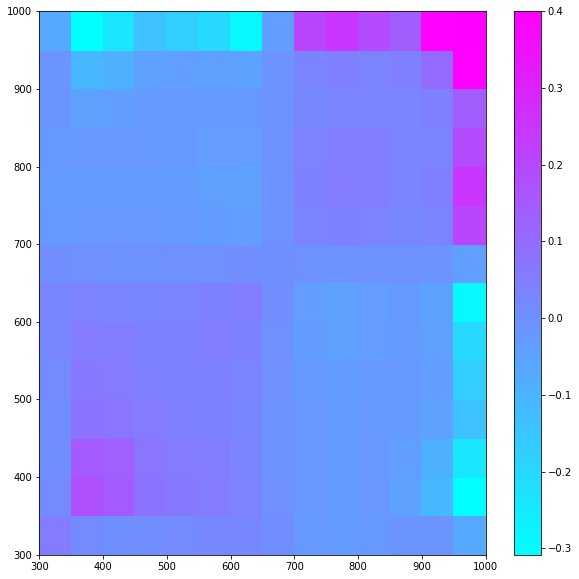

In [138]:
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov,cmap='cool',vmax=.4)
cbar = fig.colorbar(crat)


In [59]:
list(df_sys)

['Proton_CosTheta_cv',
 'Lepton_CosTheta_cv',
 'Proton_CosTheta',
 'Lepton_CosTheta',
 'bkgBDT_run3_cv',
 'bkgBDT_run3',
 'run',
 'subrun',
 'event',
 'vtxid',
 'Xreco',
 'Yreco',
 'Zreco',
 'InFiducial',
 'AnyReco',
 'NTracks',
 'N5cmTracks',
 'PassSimpleCuts',
 'PassShowerReco',
 'PassSecondShower',
 'FailedBoost',
 'FailedBoost_1m1p',
 'FailedBoost_1e1p',
 'Good3DReco',
 'Eta',
 'OpenAng',
 'Thetas',
 'Phis',
 'QCorrectionFactorVertex',
 'ChargeNearTrunk',
 'LongTrackLen',
 'ShortTrackLen',
 'MaxShrFrac',
 'MinShrFrac',
 'CCQEEnergyShift_1m1p',
 'Enu_1m1p',
 'PhiT_1m1p',
 'AlphaT_1m1p',
 'PT_1m1p',
 'PTRat_1m1p',
 'BjX_1m1p',
 'BjY_1m1p',
 'Q2_1m1p',
 'Sph_1m1p',
 'PzEnu_1m1p',
 'Q0_1m1p',
 'Q3_1m1p',
 'OpenAngB_1m1p',
 'ThetasB_1m1p',
 'PhisB_1m1p',
 'PhiTB_1m1p',
 'AlphaTB_1m1p',
 'PTB_1m1p',
 'BjXB_1m1p',
 'BjYB_1m1p',
 'Q2B_1m1p',
 'SphB_1m1p',
 'CCQEEnergyShift_1e1p',
 'Enu_1e1p',
 'PhiT_1e1p',
 'AlphaT_1e1p',
 'PT_1e1p',
 'PTRat_1e1p',
 'BjX_1e1p',
 'BjY_1e1p',
 'Q2_1e1p',
 'S

wiremodX
polyfit degrees: 0 7.19169553120931
sg window_length 7 degrees: 10 7.116065343221028
wiremodYZ
polyfit degrees: 0 14.652654012044271
sg window_length 7 degrees: 10 14.726931889851889
wiremoddEdx
polyfit degrees: 0 8.301823933919271
sg window_length 1 degrees: 10 8.199064095815023
LYdown
polyfit degrees: 0 5.715118010838826
sg window_length 9 degrees: 10 5.694827159245809
SCE
polyfit degrees: 0 14.362505276997885
sg window_length 9 degrees: 10 14.273023923238119
wiremodThetaYZ
polyfit degrees: 0 6.244710286458333
sg window_length 11 degrees: 10 6.2069681485493975
wiremodThetaXZ
polyfit degrees: 0 10.961923917134603
sg window_length 3 degrees: 10 10.499676068623861
flat sys: 0.08959695735944827 0.008027614768070792


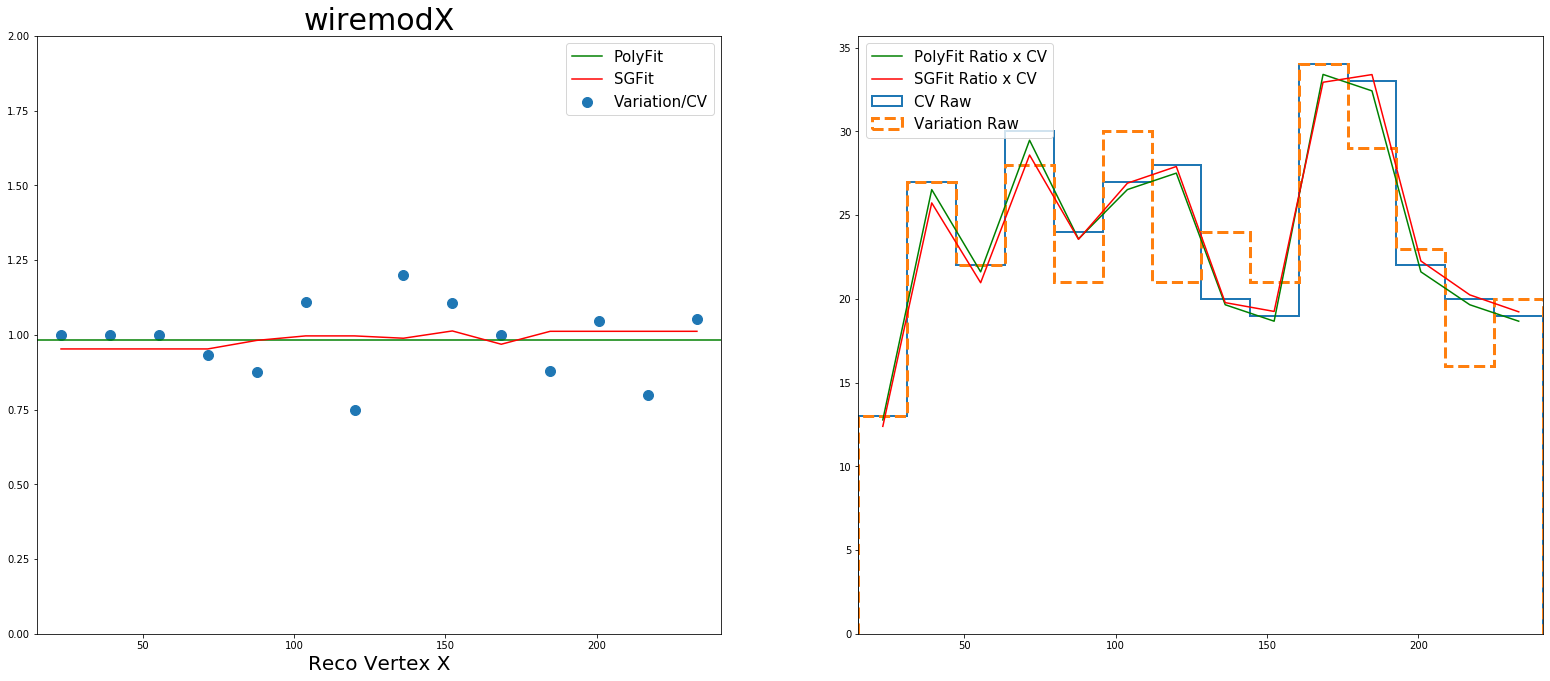

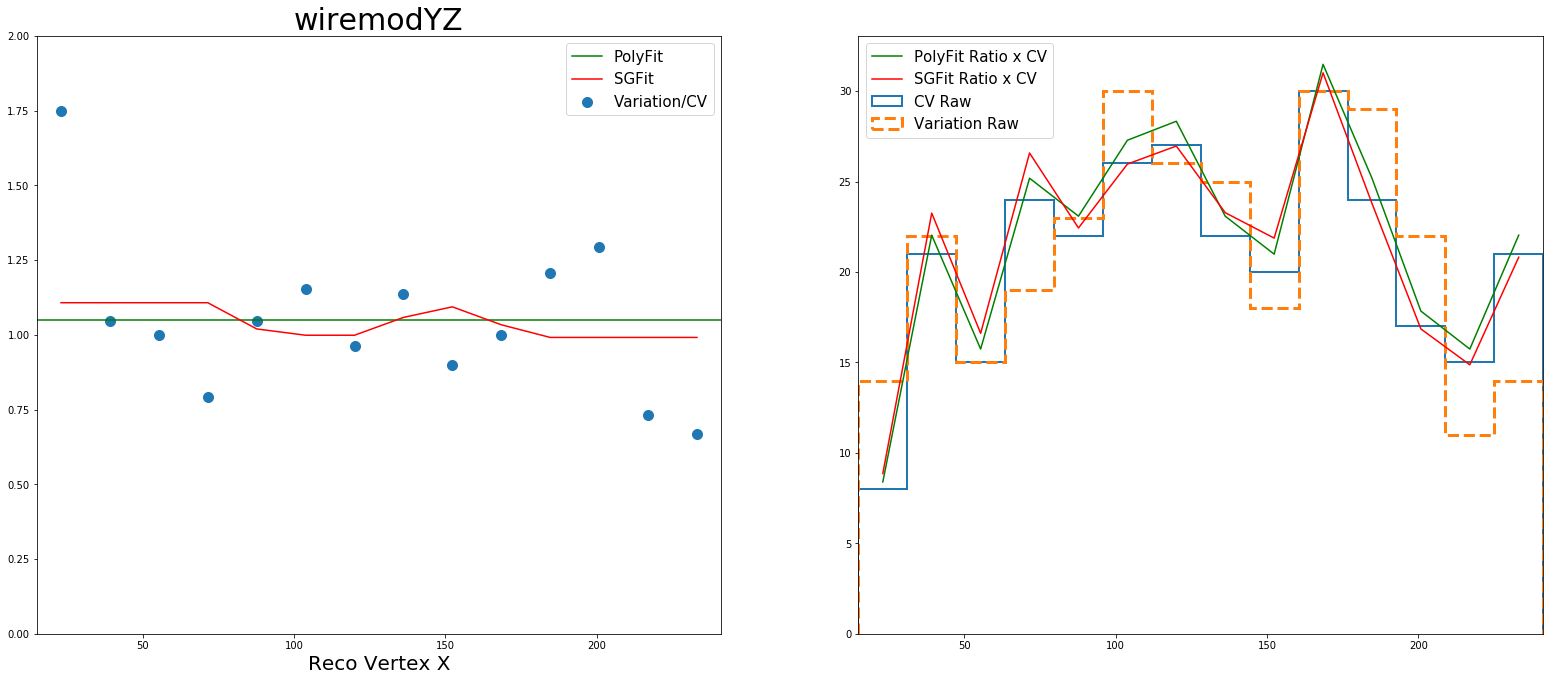

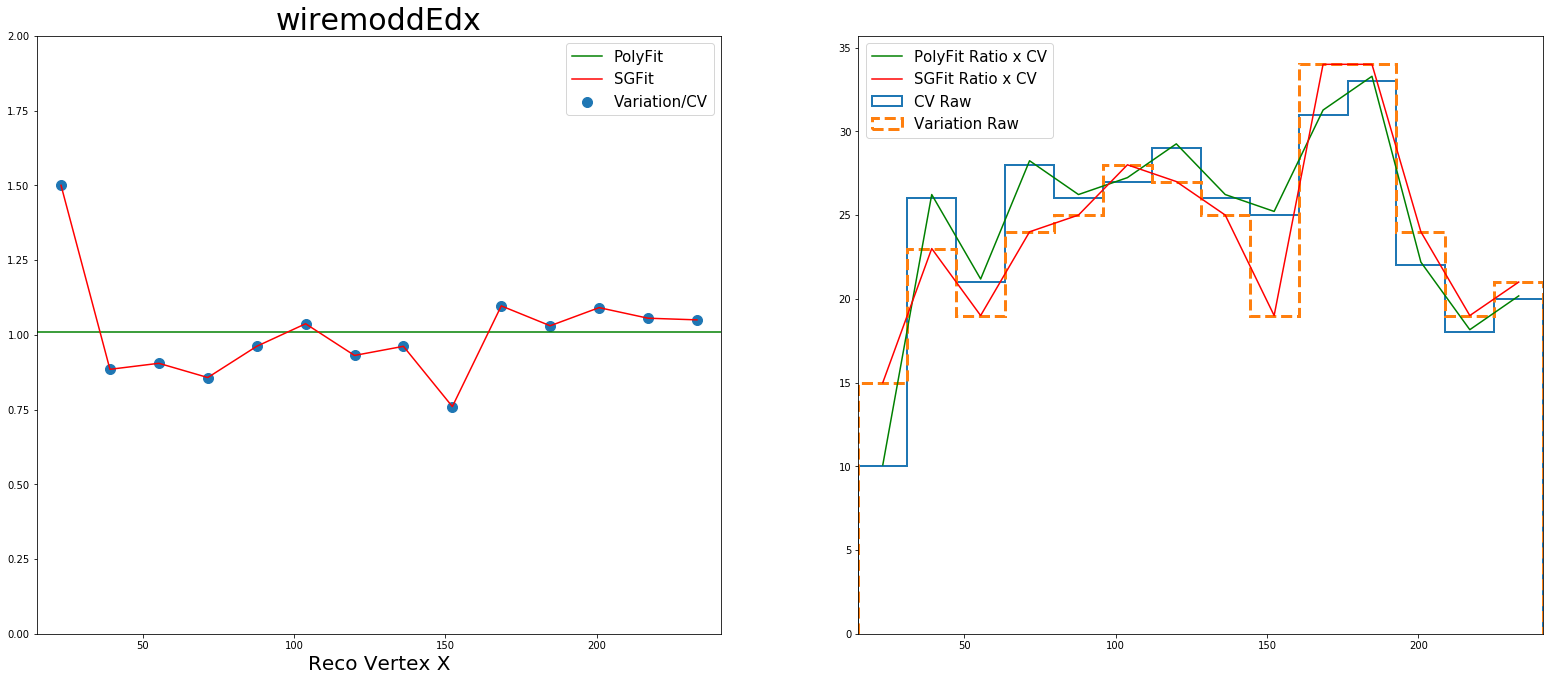

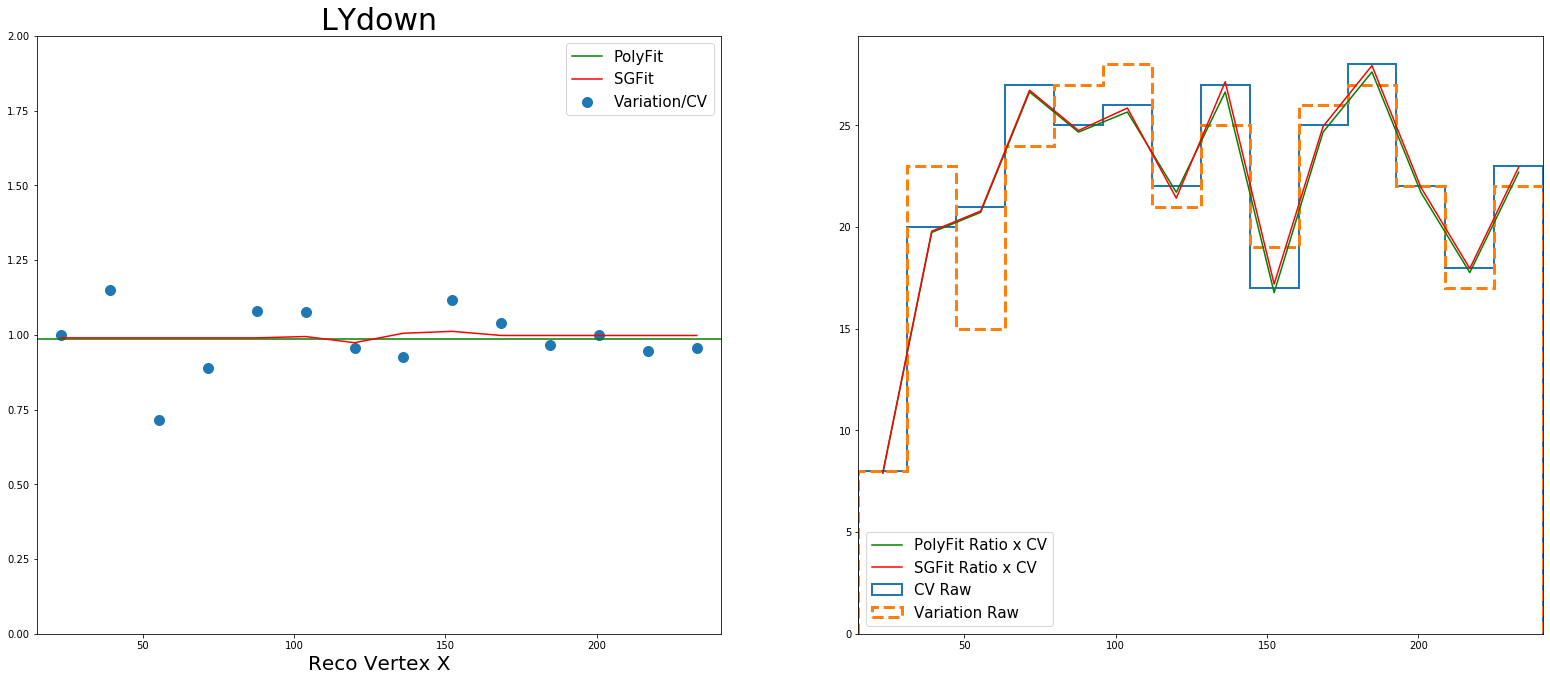

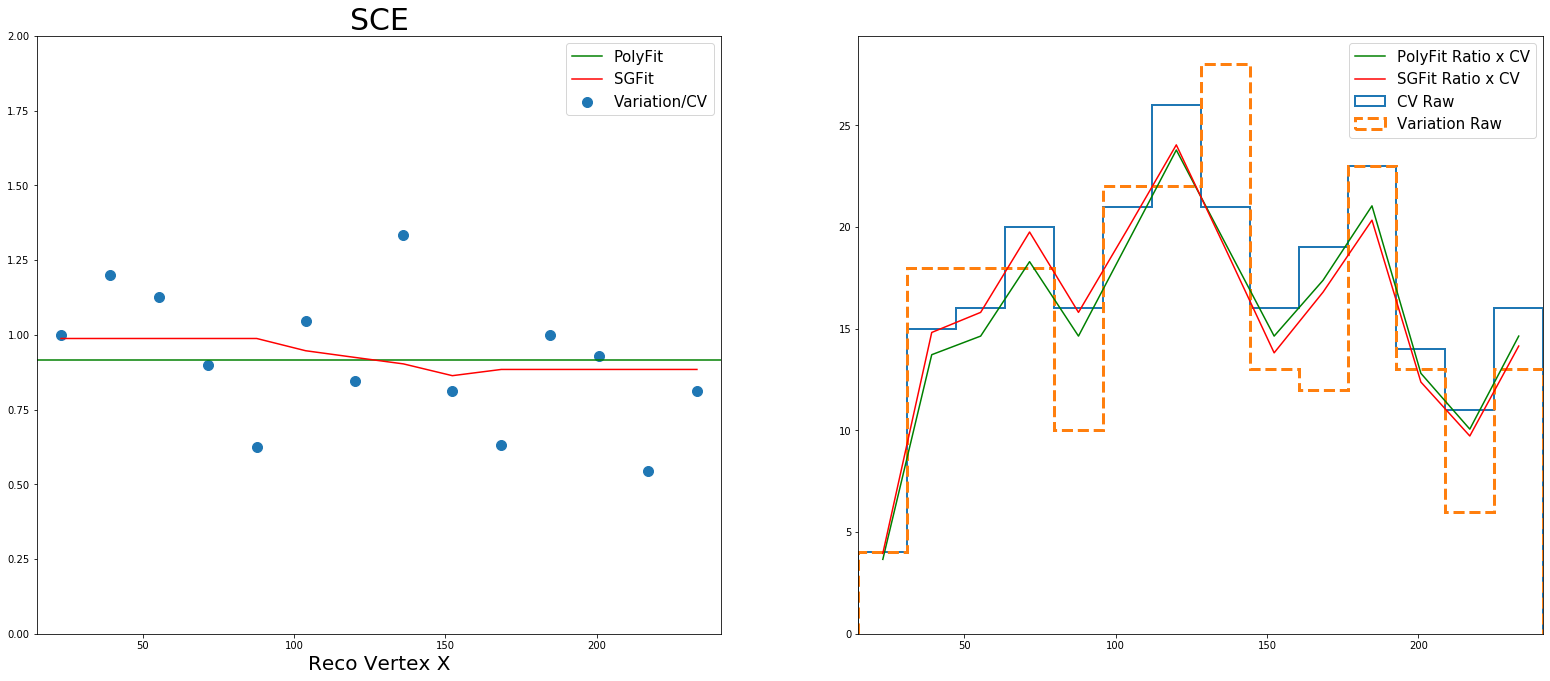

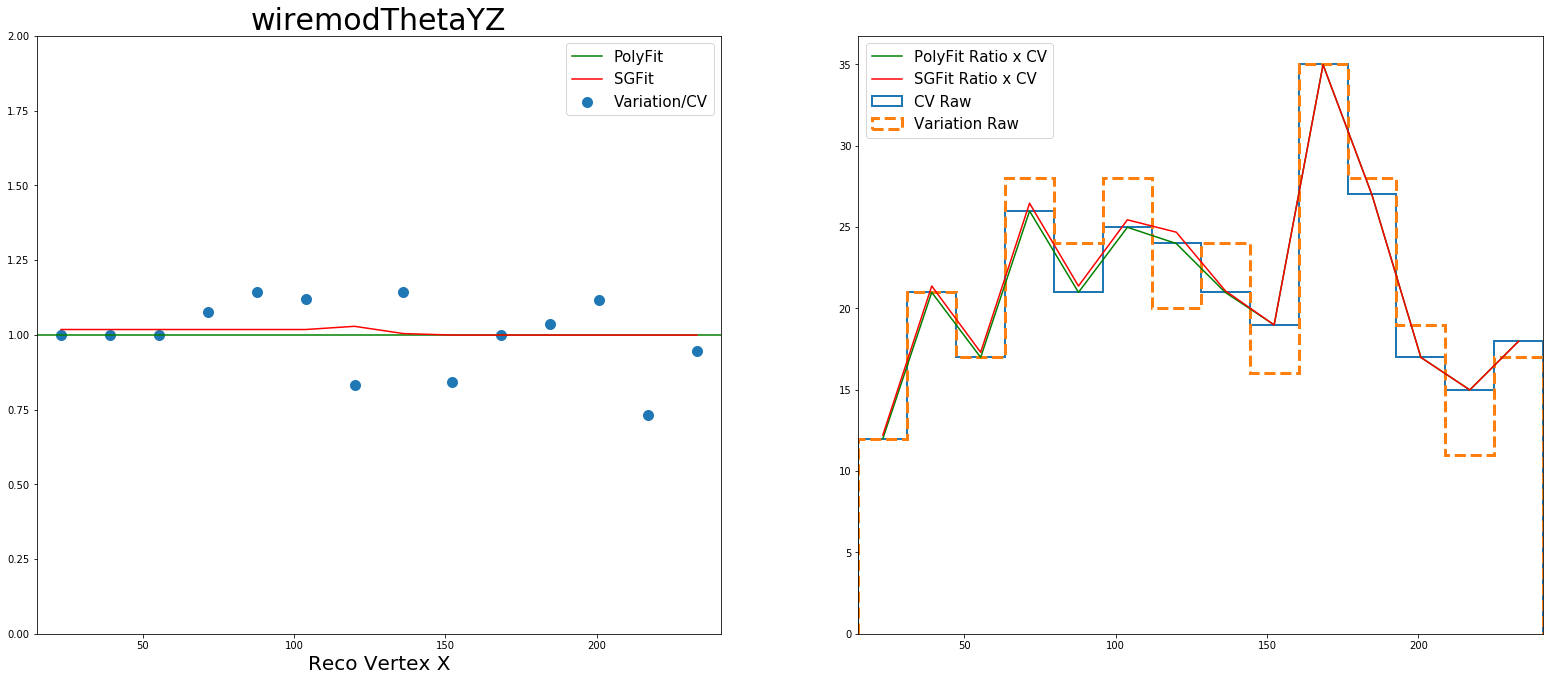

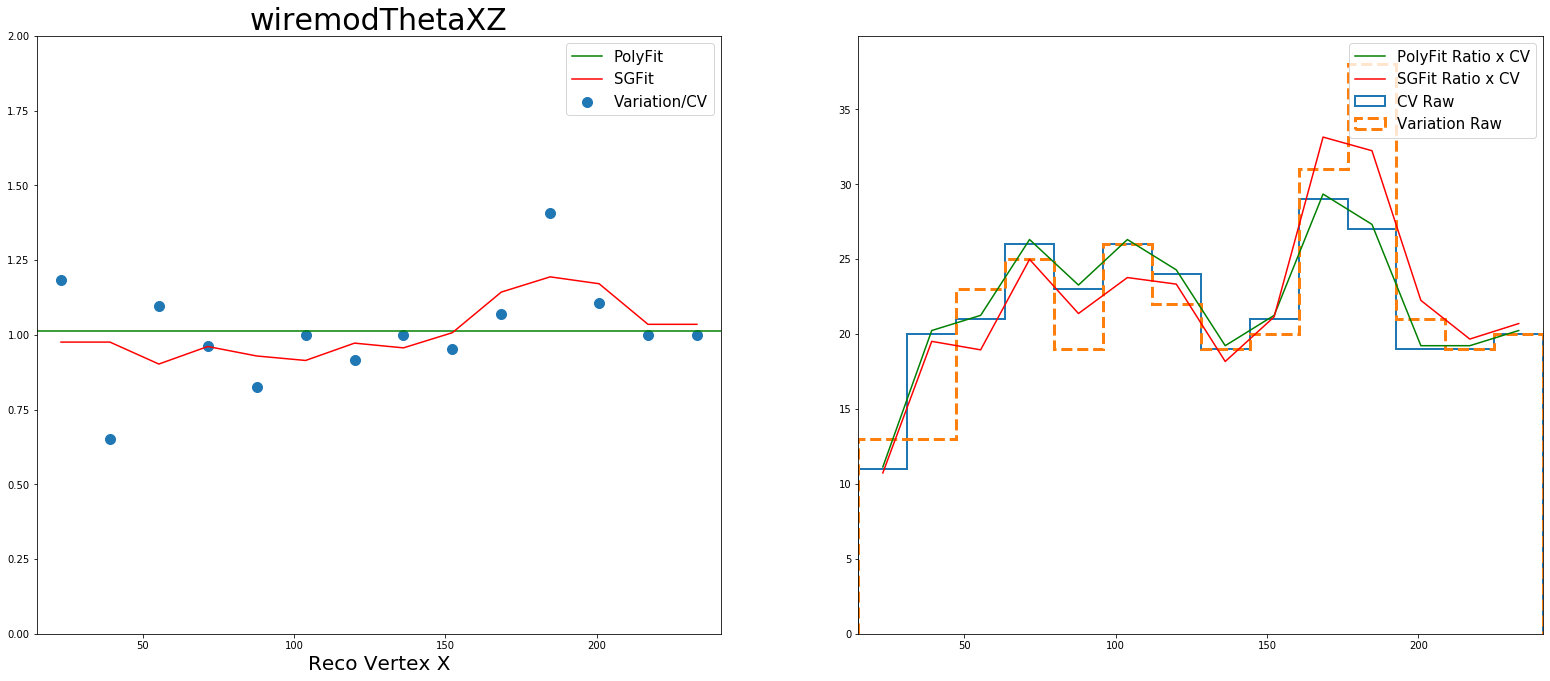

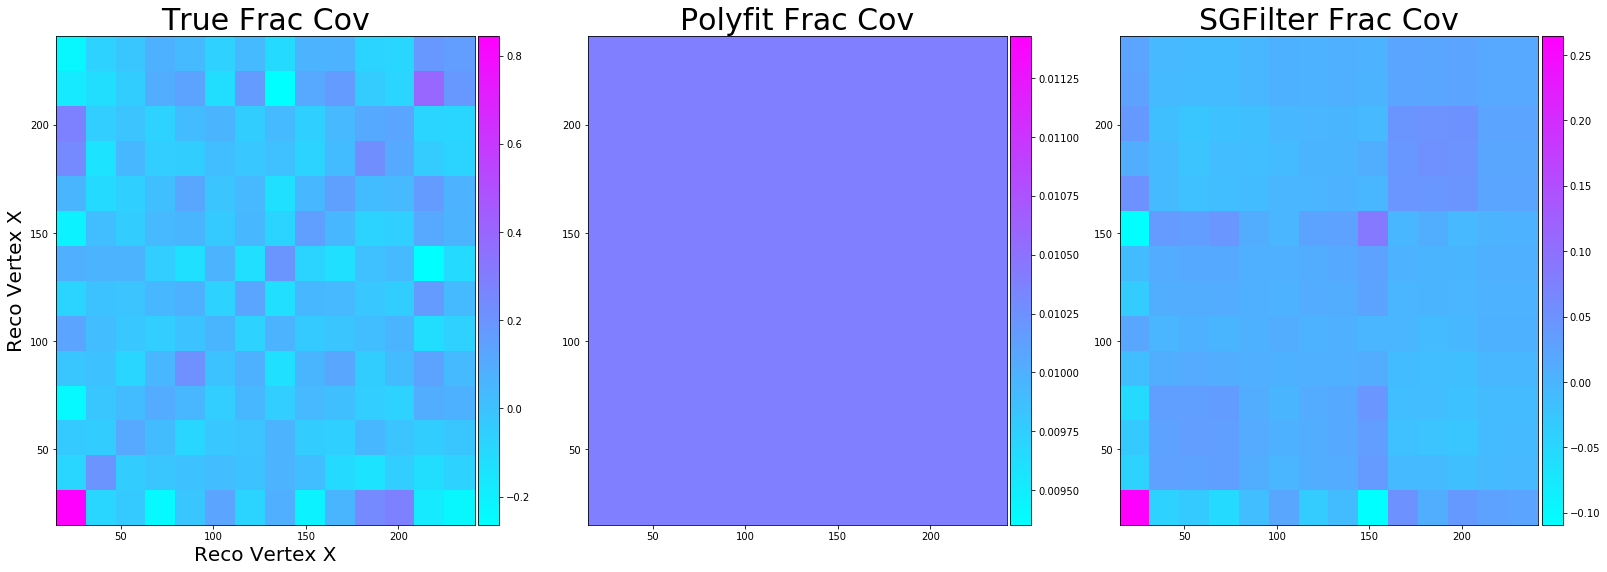

In [153]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov_tru = np.zeros((nbins,nbins))
cov_poly = np.zeros((nbins,nbins))
cov_sg = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    print(s_detsyslist[sysi])
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]

    truRat = np.true_divide(h0,hCV,out=np.ones_like(bincenters),where=hCV!=0)
      
    # get polyfit degs
    aics = []
    degs = []
    for deg in range(min(nbins-2,int(nbins/2))):
        params = deg + 1
        polyRat = np.polyfit(bincenters, truRat, deg)
        fRat = np.poly1d(polyRat)
    
        # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        aics.append(aic)
        degs.append(deg)
      
    polyterms = degs[np.argmin(aics)]
    print('polyfit degrees:',polyterms,aics[np.argmin(aics)])  
    polyRat = np.polyfit(bincenters, np.true_divide(h0,hCV,where=hCV!=0), polyterms)
    fRat = np.poly1d(polyRat) 
    h0_fit = fRat(bincenters)*hCV
    
    # get sg degs
    aics = []
    degs = []
    wls = []
    for window_length in range(1,nbins-1,2):
        for deg in range(window_length):   
            params = deg + 1
            sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, deg)
            
            # now calculate chi2 for fit
            yerr_rat = np.true_divide(np.sqrt(sgRat*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
             
            chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat,out=np.zeros_like(bincenters),where=yerr_rat!=0),2).sum()
            aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
            aics.append(aic)
            degs.append(deg)
            wls.append(window_length)
           
    #Savitsky Golay
    window_length = wls[np.argmin(aics)]
    little_poly_t = degs[np.argmin(aics)]
    print('sg window_length',window_length,'degrees:',deg,aics[np.argmin(aics)])
    sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, little_poly_t)
    h0_sgfit = sgRat*hCV
        
    fig,ax = plt.subplots(figsize=(27,11))    
    gs = gridspec.GridSpec(1, 2)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    ax0.scatter(bincenters,np.true_divide(h0,hCV,where=hCV!=0),label='Variation/CV',s=100)
    ax0.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit',color='green')
    ax0.plot(bincenters,sgRat,label='SGFit',color='red')
    
    ax0.set_title(s_detsyslist[sysi],fontsize=30)
    ax0.set_xlabel(dvar.mylabel,fontsize=20)
    ax0.legend(fontsize=15)
    
    ax1.hist(var_cv,nbins,range=dvar.myrange,histtype='step',linewidth=2,label='CV Raw')
    ax1.hist(var_sys,nbins,range=dvar.myrange,histtype='step',linewidth=3,linestyle='--',label='Variation Raw')
    ax1.plot(bincenters,h0_fit,label='PolyFit Ratio x CV',c='green')
    ax1.plot(bincenters,h0_sgfit,label='SGFit Ratio x CV',c='red')
    ax1.legend(fontsize=15)
    ax1.set_xlim(dvar.myrange)
    
    for i in range(nbins):
        for j in range(nbins):
            cov_tru[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_poly[i][j] += (h0_fit[i]-hCV[i])*(h0_fit[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_sg[i][j] += (h0_sgfit[i]-hCV[i])*(h0_sgfit[j]-hCV[j])/(hCV[i]*hCV[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
    
    ax0.set_xlim(dvar.myrange)
    ax0.set_ylim(0,2)
    
fig,ax = plt.subplots(figsize=(27,9))
gs = gridspec.GridSpec(1, 3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

X, Y = np.meshgrid(binedges,binedges)

crat_tru = ax0.pcolormesh(X, Y,cov_tru,cmap='cool')#,vmin=-2,vmax=3)
crat_poly = ax1.pcolormesh(X, Y,cov_poly,cmap='cool')#,vmin=-2,vmax=3)
crat_sg = ax2.pcolormesh(X, Y,cov_sg,cmap='cool')#,vmin=-2,vmax=3)

divider0 = make_axes_locatable(ax0)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(crat_tru,cax0)
cbar = fig.colorbar(crat_poly,cax1)
cbar = fig.colorbar(crat_sg,cax2)

ax0.set_title('True Frac Cov',fontsize=30)
ax1.set_title('Polyfit Frac Cov',fontsize=30)
ax2.set_title('SGFilter Frac Cov',fontsize=30)

ax0.set_ylabel(dvar.mylabel,fontsize=20)
ax0.set_xlabel(dvar.mylabel,fontsize=20)

print('flat sys:',np.sqrt(flatsys),flatsys)
np.savetxt('/home/dcianci/Downloads/detsys_%s_nom_cov.csv'%dvar.myname,cov_tru,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_polyfit_cov.csv'%dvar.myname,cov_poly,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_sg_cov.csv'%dvar.myname,cov_sg,delimiter=',')

cov_flat = np.zeros((nbins,nbins))
for i in range(nbins):
    cov_flat[i][i] = flatsys
np.savetxt('/home/dcianci/Downloads/detsys_%s_flat_cov.csv'%dvar.myname,cov_flat,delimiter=',')


## Let's find a good fit

testneg,testzero: [3.57341932 5.14984534 4.6486157  5.42841363 4.85532075 5.14984534
 5.2443458  4.43228117 4.3200533  5.77898761 5.69336824 4.6486157
 4.43228117 4.3200533 ] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 0 chi2: 4.858361287099476 AIC: 7.191694620432809
testneg,testzero: [3.58460323 5.16348664 4.65869297 5.43756843 4.86117103 5.1535693
 5.24561031 4.43121234 4.31692725 5.77201615 5.68375055 4.63851669
 4.42050956 4.30649029] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 1 chi2: 4.85521127016807 AIC: 9.94612036107716
testneg,testzero: [3.5606019  5.14488139 4.6538984  5.44316405 4.87367964 5.17214315
 5.2672318  4.44949474 4.33253077 5.7869404  5.6896391  4.63370125
 4.40441123 4.27729037] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 2 chi2: 4.8453018282503555 AIC: 13.245301828250357
testneg,testzero: [3.59961408 5.14921655 4.6303984  5.4024315  4.83840441 5.14579844
 5.25763767 4.45759211 4.35454975 5.82872384 5.7321843  4.6571843
 4.40065667 4.229296

/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 2)

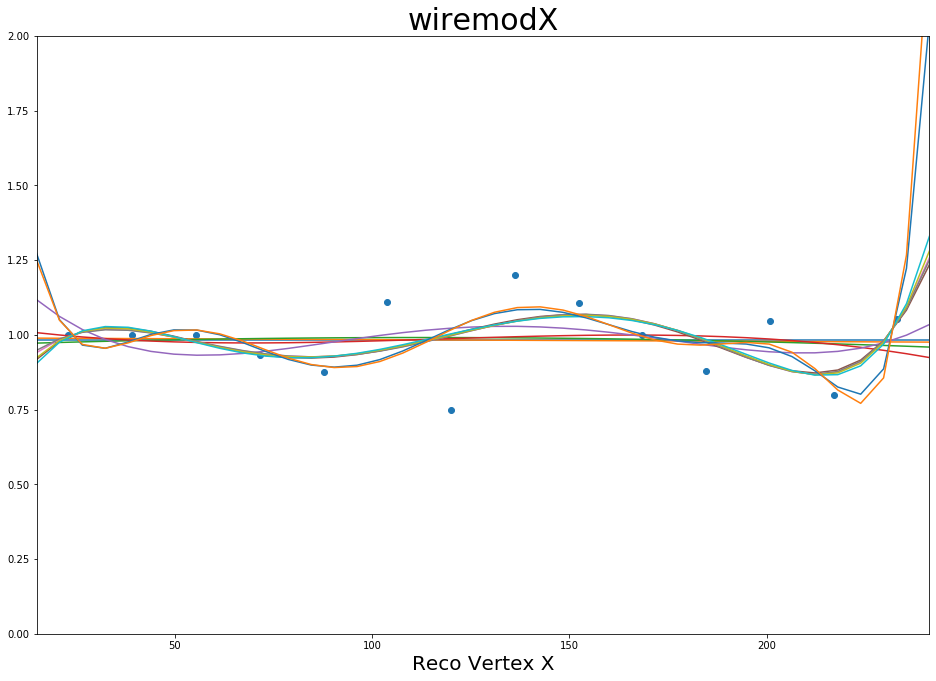

In [117]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
aics = []
degs = []
for deg in range(nbins-2):
        
    params = deg + 1
    polyRat = np.polyfit(bincenters, truRat, deg)
    fRat = np.poly1d(polyRat)
    h0_fit = fRat(bincenters)*hCV
    
    # now calculate chi2 for fit
    print('testneg,testzero:',np.sqrt(h0_fit),hCV)
    yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
    chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
    aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
    print('degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
    plt.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit (%i)'%polyterms)
    aics.append(aic)
    degs.append(deg)
    

print(degs[np.argmin(aics)])

ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)


window_length 1 degree: 0 chi2: 9.263592560412054 AIC: 11.596925893745388
window_length 3 degree: 0 chi2: 8.873041047947478 AIC: 11.206374381280812
window_length 3 degree: 1 chi2: 8.625229458693235 AIC: 13.716138549602327
window_length 3 degree: 2 chi2: 9.26359256041205 AIC: 17.66359256041205
window_length 5 degree: 0 chi2: 8.878586485910798 AIC: 11.211919819244132
window_length 5 degree: 1 chi2: 8.618203262808063 AIC: 13.709112353717153
window_length 5 degree: 2 chi2: 8.762149528124052 AIC: 17.16214952812405
window_length 5 degree: 3 chi2: 8.827626905939193 AIC: 21.272071350383634
window_length 5 degree: 4 chi2: 9.26359256041205 AIC: 26.76359256041205
window_length 7 degree: 0 chi2: 8.958226898628284 AIC: 11.291560231961618
window_length 7 degree: 1 chi2: 8.568924482314452 AIC: 13.659833573223544
window_length 7 degree: 2 chi2: 8.704847251526996 AIC: 17.104847251526994
window_length 7 degree: 3 chi2: 8.82672819886712 AIC: 21.271172643311566
window_length 7 degree: 4 chi2: 8.8252614464

(0, 2)

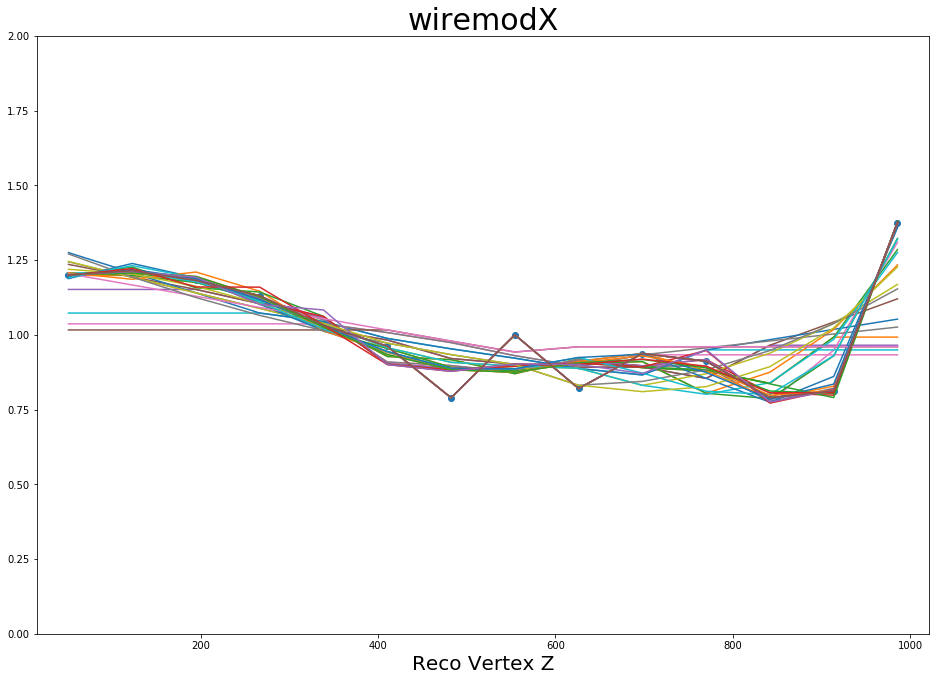

In [77]:
# The same thing with ratios

dvar = varListSel['Zreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
for window_length in range(1,nbins-1,2):
    for deg in range(window_length):
        
        params = deg + 1
        sgRat = signal.savgol_filter(np.true_divide(h0,hCV), window_length, deg)
        h0_fit = sgRat*hCV
     
         # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        print('window_length',window_length,'degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
        plt.plot(bincenters,sgRat,label='Sigfit (%i)'%polyterms)
    
ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)

In [ ]:


if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i].query(s_cuts)[dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%i)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv.query(s_cuts)[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%i)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)       
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax1.set_ylim(0,2.5)
    ax0.legend(fontsize=15)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

## Smearing

In [51]:
dumphole = 'DetSysSmear'
dumpfolder = '../PlotDumps'

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:

    fig,ax = plt.subplots(figsize=(16,11))
    binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
    myrange = (-3*binwidth,3*binwidth)
    nbins = 15

    for sysi in range(len(a_df_sys)):
        myvardf = a_overlap_sys[sysi].query(s_cuts)
        myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
        var_sys = myvardf[dvar.myname]
        var_cv = myvarcv[dvar.myname+'_cv']
        
        h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3) 
    
    ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
    ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
    ax.set_title('(CV - Detsys)',fontsize=30)
    ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
    ax.legend(fontsize=25)
    plt.savefig(dumphole+'/'+dvar.myname+'.png')
    plt.close(fig)
    

NameError: name 'varlistSel' is not defined

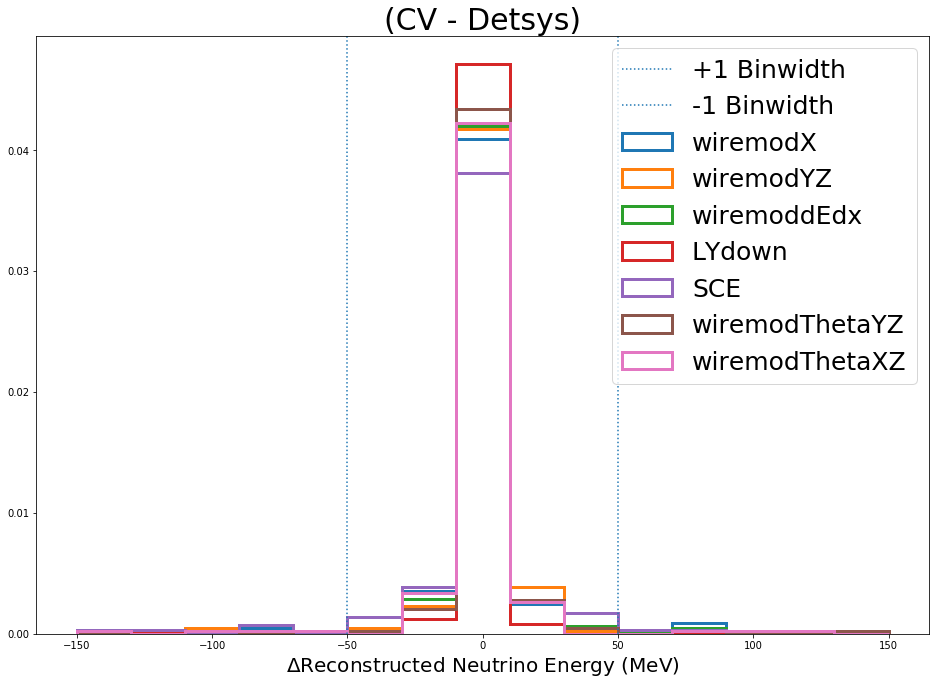

In [150]:
dvar = varListSel['Enu_1m1p']

fig,ax = plt.subplots(figsize=(16,11))
binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
myrange = (-3*binwidth,3*binwidth)
nbins = 15

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
        
    h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3,density=1) 
    
ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
ax.set_title('(CV - Detsys)',fontsize=30)
ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
ax.legend(fontsize=25)

## Extras

In [83]:
dumpbins = 18
dumphole = '/home/dcianci/Downloads/detsys_may18_presel' # where are we dumping these?

if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i][dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%.4f)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%.4f)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax0.legend(fontsize=15)
    ax1.set_ylim(0,2.5)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
